In [1]:
import numpy as np
import pandas as pd
import skexplain
import seaborn as sns
import plotting_config
import itertools
import scipy
import xarray as xr
import scipy.stats as sps
import matplotlib.colors as mcolors
from sklearn.ensemble import RandomForestRegressor

In [2]:
from time_series_deconfounder import *
from loguru import logger

2024-07-11 11:02:09.803058: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-11 11:02:09.853702: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI AMX_TILE AMX_INT8 AMX_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 11:02:10.613483: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO:Using GPU with memory growth
2024-07-11 11:02:11.475376: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46816 MB memory:  

Number of devices: 2


In [3]:
# useful function
def _get_centres(x):
    return (x[1:] + x[:-1]) / 2

def _check_two_ints(values):
    if isinstance(values, (int, np.integer)):
        values = (values, values)
    elif len(values) == 1:
        values = (values[0], values[0])
    elif len(values) != 2:
        raise ValueError(
            "'{}' values were given. Expected at most 2.".format(len(values))
        )

    if not all(isinstance(n_bin, (int, np.integer)) for n_bin in values):
        raise ValueError(
            "All values must be an integer. Got types '{}' instead.".format(
                {type(n_bin) for n_bin in values}
            )
        )
    return values

In [13]:
## load ale
# 从 NetCDF 文件中读取数据集
# ale = xr.open_dataset("result_data/ale_bootstrap_v2.nc")
ale = xr.open_dataset("../data/result_data/ale_bootstrap_sci750_v1.nc")
ale

<xarray.Dataset>
Dimensions:                          (n_bootstrap: 2, n_bins__conformity: 20,
                                      n_X: 158045811)
Dimensions without coordinates: n_bootstrap, n_bins__conformity, n_X
Data variables:
    conformity__RNN_Model_2019__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__RNN_Model_2020__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__RNN_Model_2023__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__bin_values           (n_bins__conformity) float32 ...
    conformity                       (n_X) float32 ...
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model_2019', 'RNN_Model_2020', 'RNN_Model_2023']
    method:            ale
    dimension:         1D
    features used:     conformity

In [14]:
estimator = [('RNN_Model_2019',RandomForestRegressor()),
            ('RNN_Model_2020',RandomForestRegressor()),
            ('RNN_Model_2023',RandomForestRegressor())]

explainer = skexplain.ExplainToolkit(estimator)

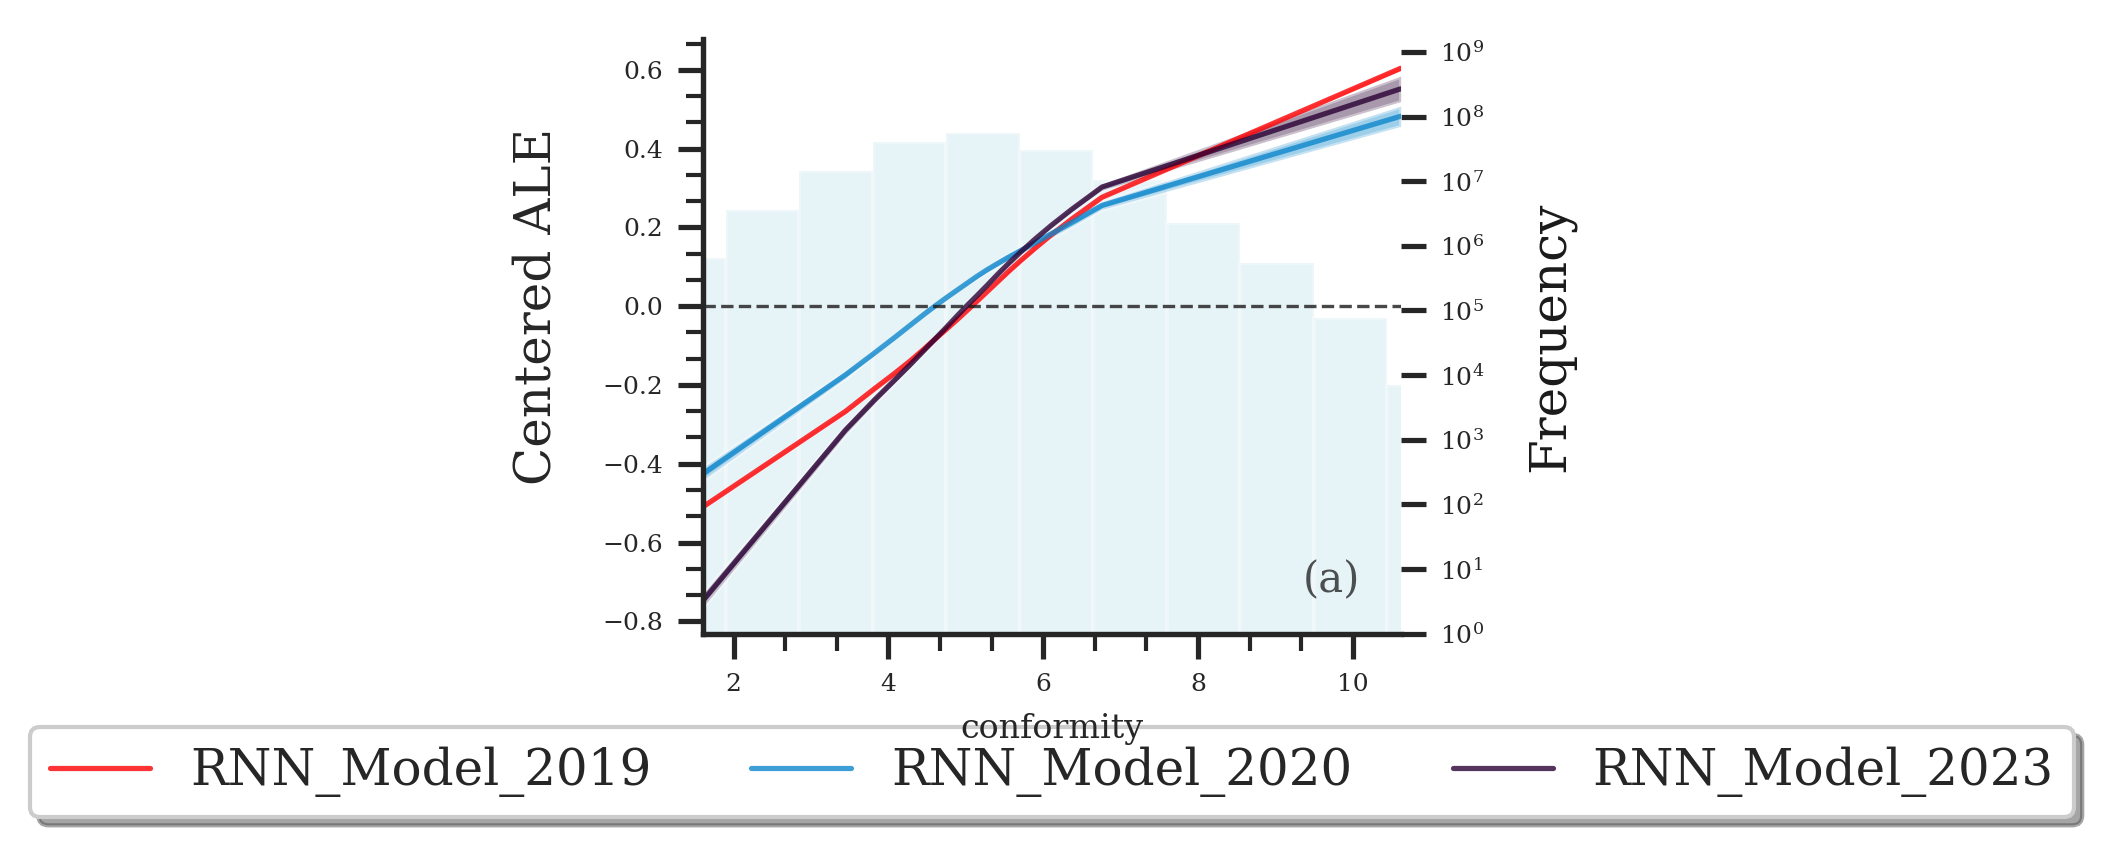

In [4]:
fig, ax = explainer.plot_ale(
                                   ale = ale,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

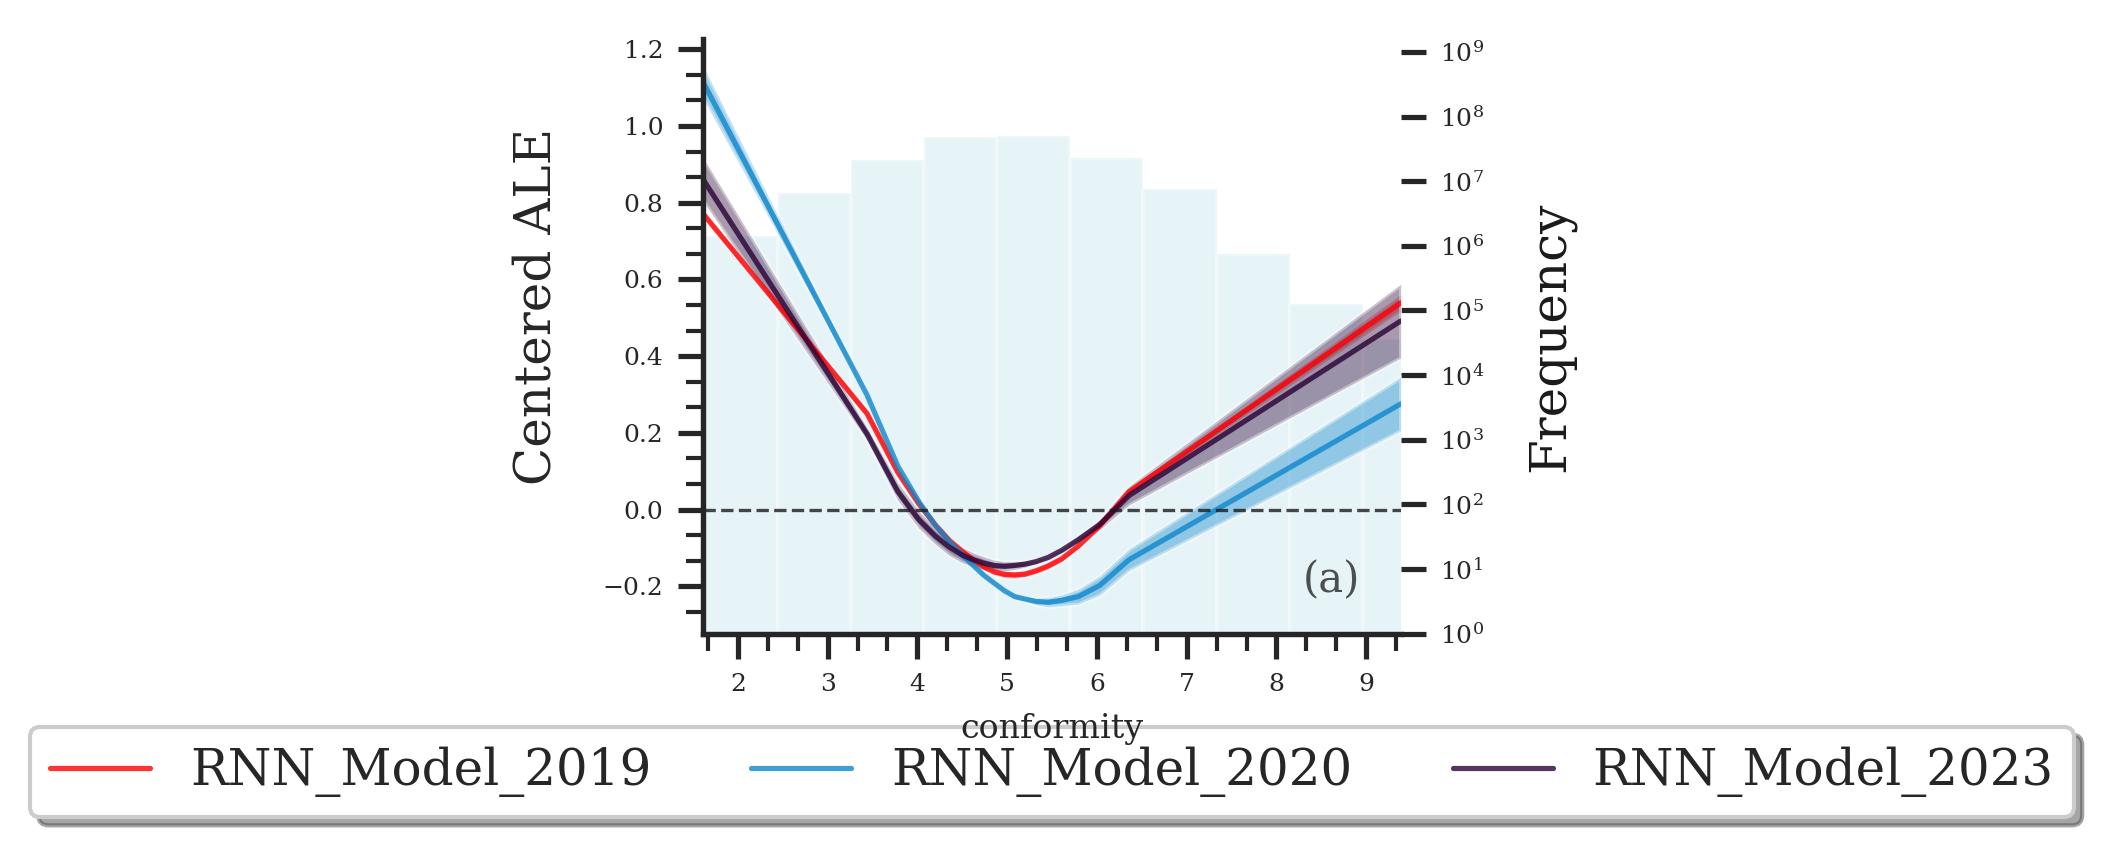

In [15]:
fig, ax = explainer.plot_ale(
                                   ale = ale,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

## 绘制带ice曲线的ale图

In [3]:
# 导入数据
dataset = load_data("../data/sample_3w2_add.h5")

index_to_remove = dataset['covariates'].shape[2] - 5
dataset['covariates'] = np.delete(dataset['covariates'], index_to_remove, axis=2)

for key in dataset.keys():
    print(key)
    print(dataset[key].shape)
    print(dataset[key].dtype)

covariates
(96000, 161, 24)
float32
outcomes
(96000, 161, 1)
float32
sequence_length
(96000,)
int64
treatments
(96000, 161, 1)
float32


In [4]:
# 模型编号
exp_name = "add_ent_model_optimal_v2"

the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
2024-05-28 20:53:08.407 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.11it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:01, 15.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.91it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.68it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.61it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.70it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.68it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.80it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


ale average = 0.041003287913145274
plotting heatmap...


2024-05-28 20:54:46.439 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.68it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.70it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.74it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.66it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.81it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.71it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.76it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.36it/s]


ale average = 0.04244002417381828
plotting heatmap...


2024-05-28 20:56:22.798 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.80it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.86it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.56it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.76it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.56it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.56it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


ale average = 0.04359274099197108
plotting heatmap...


2024-05-28 20:58:00.203 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.71it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.69it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.56it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.66it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.98it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.19it/s]


ale average = 0.039886358929972776
plotting heatmap...


2024-05-28 20:59:38.567 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.81it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.61it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.74it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.68it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.66it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.71it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.81it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.71it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.97it/s]


ale average = 0.041858517299944914
plotting heatmap...


2024-05-28 21:01:19.389 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.69it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.99it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.69it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.71it/s]


ale average = 0.04092913928007576
plotting heatmap...


2024-05-28 21:03:00.597 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.01it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.54it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.61it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.69it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.98it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.53it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


ale average = 0.04087625260006721
plotting heatmap...


2024-05-28 21:04:40.557 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.66it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.98it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.70it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.76it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


ale average = 0.039101064161963975
plotting heatmap...


2024-05-28 21:06:20.124 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.50it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.61it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.86it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.68it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.76it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.67it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.59it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


ale average = 0.04211685855142287
plotting heatmap...


2024-05-28 21:08:02.577 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.65it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.71it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.61it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.77it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.60it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.62it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.47it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 17.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 16it [00:00, 16.94it/s]


ale average = 0.04184043141425857
plotting heatmap...


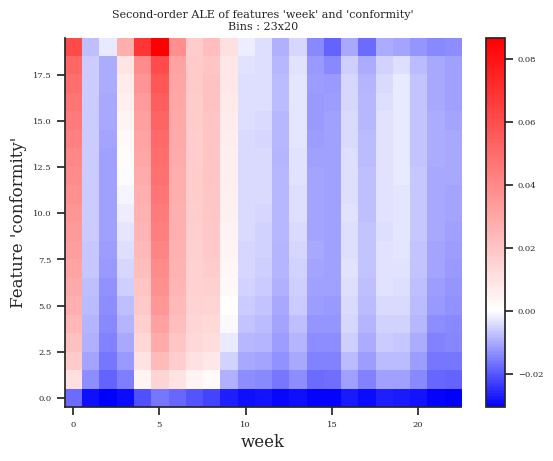

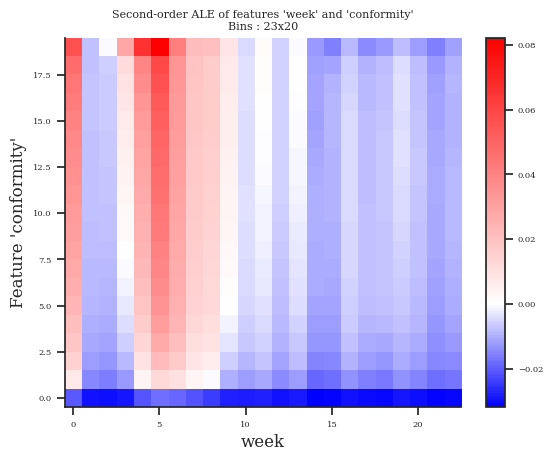

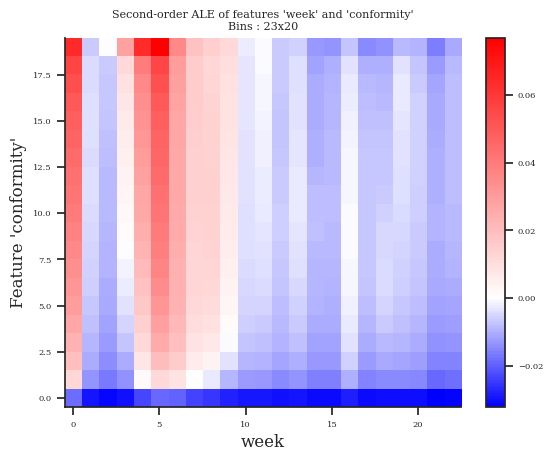

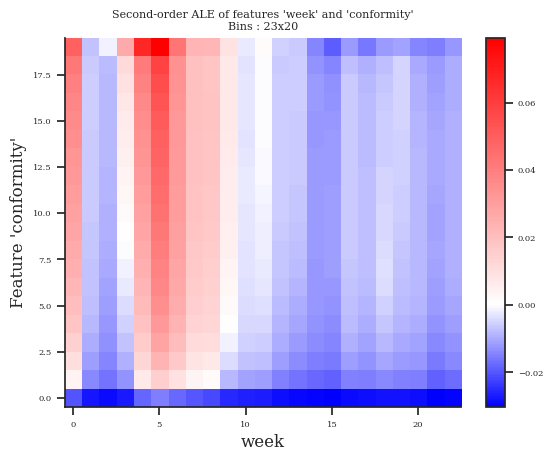

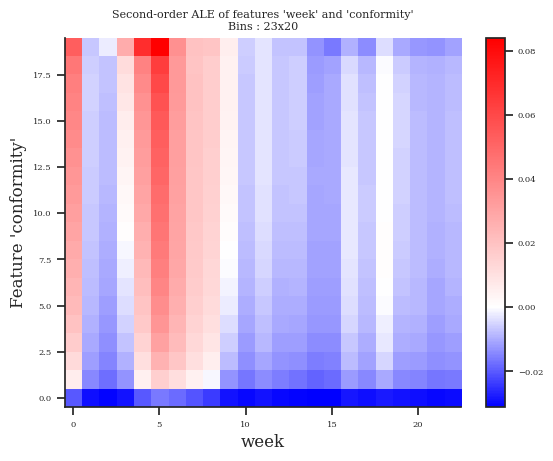

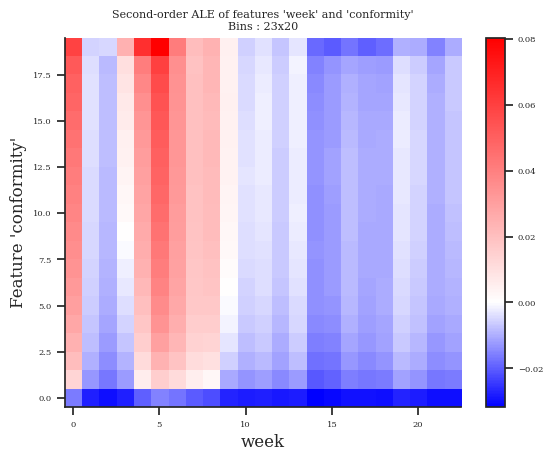

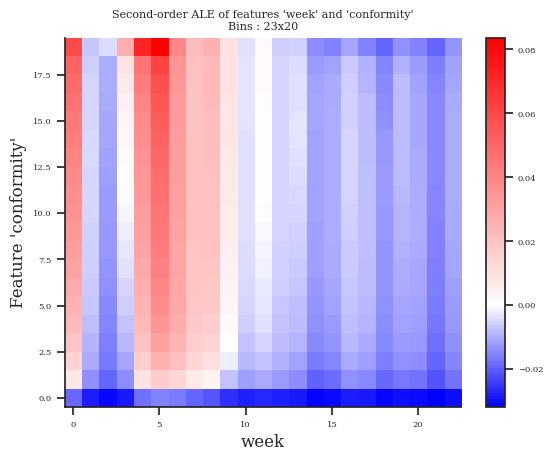

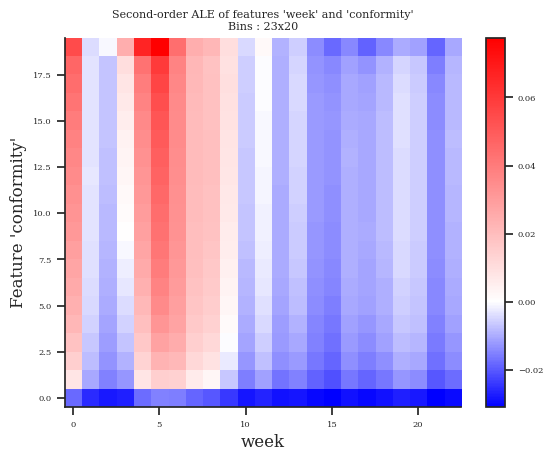

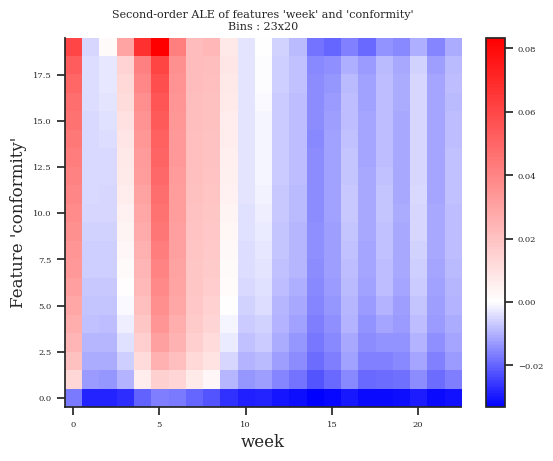

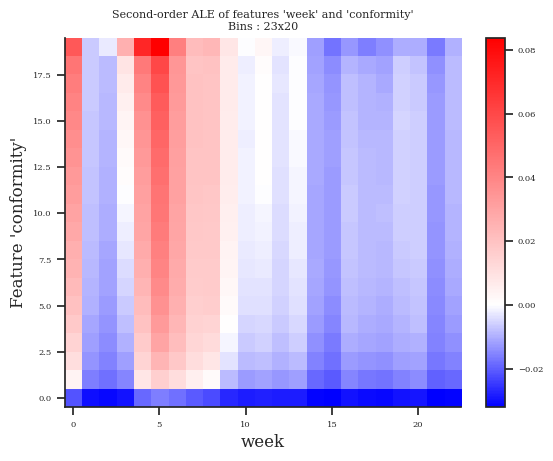

In [11]:
# 计算全局ale，转化成xarray的格式
bins = 20
quantiles = np.unique(
   np.quantile(
       dataset['treatments'].reshape(-1), np.linspace(0, 1, bins + 1), interpolation="lower"
   )
)
ALE_1ST = {
   'RNN_Model': [],
   }
n_bootstrap = 10

for _ in range(n_bootstrap):
    sub_dataset = dataset_sampling(dataset, 1000)
    window_ale_fig, ale, _ = compute_ale(sub_dataset, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['week', 'conformity'], default_quantiles=quantiles)
    ale_1st = np.sum(ale, axis=0)
    ALE_1ST['RNN_Model'].append(ale_1st)

for key in ALE_1ST.keys():
    ALE_1ST[key] = np.array(ALE_1ST[key])
ale_dataset = create_ale_dataset(ALE_1ST, quantiles, dataset['treatments'], ['RNN_Model'], 'conformity')

In [12]:
# 还原SCI的log值
conformity_bin_values_log = ale_dataset['conformity__bin_values'].values
conformity_bin_values_original = np.exp(conformity_bin_values_log)-1
ale_dataset['conformity__bin_values'] = (('n_bins__conformity'), conformity_bin_values_original)

In [13]:
conformity_log = ale_dataset['conformity'].values
conformity_original = np.exp(conformity_log)-1
ale_dataset['conformity'] = (('n_X'), conformity_original)

In [14]:
ale_dataset

<xarray.Dataset>
Dimensions:                     (n_bootstrap: 10, n_bins__conformity: 20,
                                 n_X: 15456000)
Dimensions without coordinates: n_bootstrap, n_bins__conformity, n_X
Data variables:
    conformity__RNN_Model__ale  (n_bootstrap, n_bins__conformity) float64 -0....
    conformity__bin_values      (n_bins__conformity) float32 3.991 ... 3.63e+04
    conformity                  (n_X) float32 243.5 238.5 223.8 ... 391.0 595.8
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model']
    method:            ale
    dimension:         1D
    features used:     ['conformity']

In [15]:
estimator = [('RNN_Model',RandomForestRegressor())]
explainer = skexplain.ExplainToolkit(estimator)

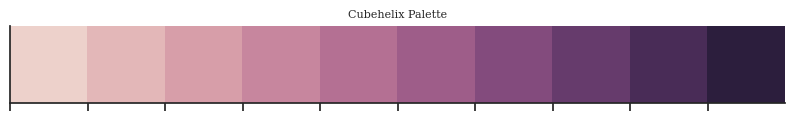

In [18]:
# 生成 cubehelix 调色盘
cubehelix_palette = sns.cubehelix_palette(n_colors=10)
# 显示调色盘中的所有颜色
sns.palplot(cubehelix_palette)
plt.title('Cubehelix Palette')
plt.show()

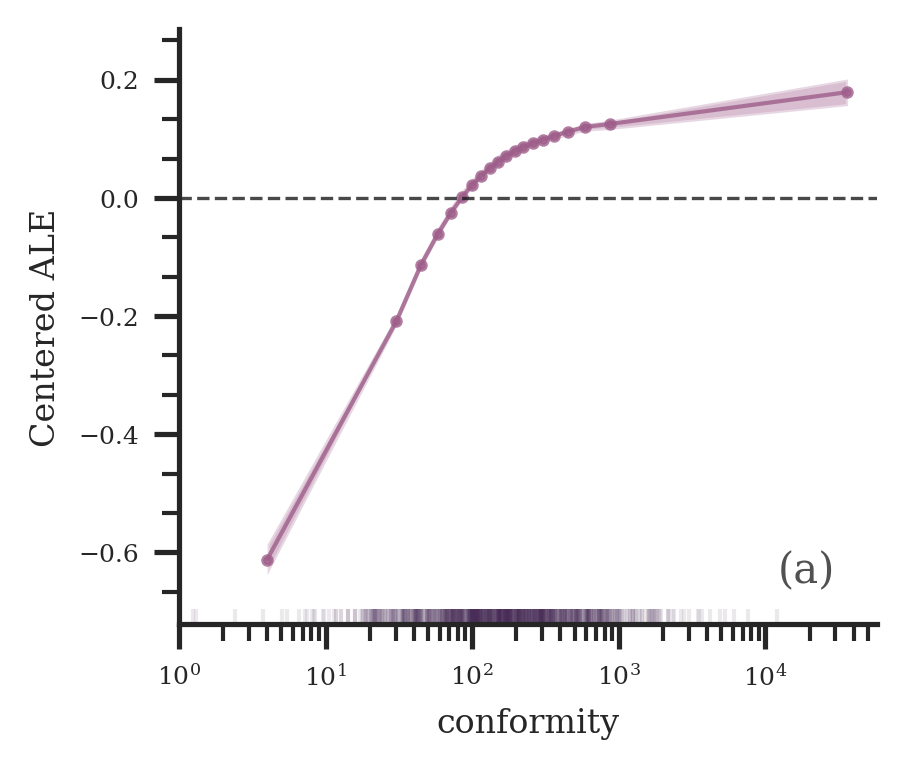

In [48]:
#修改可视化效果
#fig, ax = plt.subplots(dpi=300)
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_kws={'marker': 'o', 'markersize':2,'linewidth':1, 'line_colors': [cubehelix_palette[5]]},
                                   add_hist = False,
                                  )

ax.set_xscale('log')
ax.set_ylabel('Centered ALE', fontsize = 8)
ax.set_xlim(left=1)

# ax.set_xticks(conformity_bin_values_original)
# ax.set_xticklabels([f'{val:.2f}' for val in conformity_bin_values_original])

data = ale_dataset['conformity'].values
if len(data) > 1000:
    data_sample = np.random.choice(data, size=1000, replace=False)
else:
    data_sample = data
sns.rugplot(data_sample, ax=ax, color=cubehelix_palette[-2], alpha=0.1)

plt.show()

In [ ]:
ale_dataset['conformity']

### 计算ICE

In [8]:
# 选取一定样本，对个体计算ale
def select_indiviudal_from_dataset(dataset, index, overall=32000):
    indiv_indices = [index, overall+index, overall*2 + index]
    indiv_dataset = {key: value[indiv_indices] for key, value in dataset.items()}
    return indiv_dataset

In [18]:
def construct_relevant_dataframe(dataset, model_name, b_use_predicted_confounders,):
    model_name = model_name + '_use_confounders_' + str(b_use_predicted_confounders)
    model_root = os.path.join('results', model_name)
    config = {'covariate_cols':['gender','age','income','weekday_0','weekday_1','weekday_2','weekday_3','weekday_4', 'weekday_5', 'weekday_6',
           'voluntary','festivals','year_0','year_1','year_2','edu','married','dist_yes','density',
                           'entropy','temperature','percipit','E1','E2'],
            'treatment_cols':['conformity'],
             }
    
    # shape of data
    num_samples, length, num_covariates = dataset['covariates'].shape
    _, _, num_treatments = dataset['treatments'].shape
    num_years = 3
    FE_predict = Feature_Engineering(dataset, for_factor_model = False)
    X = FE_predict.construct_dataframe(config)
    dataset['output_means'] = FE_predict.scale_params['outcomes'][:, 0]
    dataset['output_stds'] = FE_predict.scale_params['outcomes'][:, 1]
    # add timeline and week column
    X['timeline'] = np.tile(np.arange(length), num_samples)
    start_date = pd.Timestamp('2019-12-21')
    X['date'] = X['timeline'].apply(lambda x: start_date + pd.Timedelta(days=x))
    X['week'] = ((X['date'] - start_date).dt.days / 7).astype(int)
    X['pid'] = np.repeat(np.arange(int(num_samples/3)), length*3)
    
    # ############################################################################################
    def ale_use_predict(X, dataset, config, model_root, FE_predict, b_use_predicted_confounders):
        # change data
        mod_dataset = dataset.copy()
        # 将修改完的值添加到mod_dataset
        covariate_shapes = dataset['covariates'].shape
        mod_dataset['covariates'] = X[config['covariate_cols']].values.reshape(covariate_shapes[0],covariate_shapes[1],covariate_shapes[2])
        treatment_shapes = dataset['treatments'].shape
        mod_dataset['treatments'] = X[config['treatment_cols']].values.reshape(treatment_shapes[0],treatment_shapes[1],treatment_shapes[2])

        # 使用原来的参数做标准化
        mod_dataset = FE_predict.get_dataset_normalize(mod_dataset, num_covariates, num_treatments)
        # 调用函数预测
        predictions, _ = \
        rnn_predict(dataset=mod_dataset, MODEL_ROOT=model_root,
                    b_use_predicted_confounders=b_use_predicted_confounders)
        outputs = predictions.reshape(-1)
        del mod_dataset; gc.collect()
        return outputs
    # ############################################################################################
    # define predictor
    predictor = lambda x: ale_use_predict(x, dataset, config, model_root, FE_predict, b_use_predicted_confounders)
    
    return X, predictor

In [89]:
def compute_ice(predictor, train_set, features, bins, default_quantiles=None):
    
    if len(features) != 2:
        raise ValueError(
            "'features' contained '{n_feat}' features. Expected 2.".format(
                n_feat=len(features)
            )
        )
    # if compute time-varying ALE, use first order quant, divide into 2 conditions: week or sliding windows
    # extract a part of code from _first_order_ale_quant and modify##########################
    feature = [feature for feature in features if feature != "week"][0]
    # feature = 'conformity'
    if default_quantiles is None:
        quantiles, real_bins = _get_quantiles(train_set, feature, bins)
    else:
        quantiles, real_bins = default_quantiles, len(default_quantiles) - 1
    # adjust week to match index
    #adjusted_weeks_list = [week - 1 for week in sorted(train_set['week'].unique())]
    quantiles_list = tuple(np.append(sorted(train_set['week'].unique()), max(train_set['week'])+1) if f=='week' else quantiles for f in features)
    bins_list = tuple(len(train_set['week'].unique()) if f=='week' else real_bins for f in features)
    logger.debug("Quantiles: {}.", quantiles)

    num_quantiles = len(quantiles)
    num_samples = len(train_set)
    predictions = np.zeros((num_quantiles, num_samples))

    # 遍历每个 week替换特征值
    for week in sorted(train_set['week'].unique()):
        # 筛选出对应 week 的数据行
        week_indices = train_set['week'] == week
        # feature_indices = np.clip(
        #     np.digitize(train_set[week_indices][feature], quantiles, right=True) - 1, 0, None
        #     )
        # 对每个个体的数据都换成bins去预测（类似pdp的做法）
        for i in range(num_quantiles):
            # 复制整个训练集
            mod_train_set = train_set.copy()
            # 只更新当前 week 的特定特征值
            mod_train_set.loc[week_indices, feature] = quantiles[i]
            # 对整个训练集进行预测并记录
            predictions[i][week_indices] = predictor(mod_train_set)[week_indices]

            del mod_train_set; gc.collect()

    effects = np.diff(predictions, axis=0)

    # 获取每个样本的分位数位置
    indices = np.zeros((num_samples, num_quantiles - 1))

    for i in range(num_samples):
        indices[i] = (np.arange(num_quantiles - 1)).astype("int")

    indiv_groups = pd.DataFrame(
        {"pid": train_set["pid"].values.repeat(num_quantiles - 1), 
         "time": train_set["week"].values.repeat(num_quantiles - 1), 
         "index": indices.flatten(), 
         "effects": effects.flatten()}
    )
    
    return effects, indiv_groups

In [97]:
 group.groupby(["time", "index"]).mean()

pid   effects
time index               
0    0      0.0  0.031160
     1      0.0  0.032003
     2      0.0  0.028742
     3      0.0  0.029684
     4      0.0  0.033511
...         ...       ...
22   15     0.0  0.038618
     16     0.0  0.036745
     17     0.0  0.036181
     18     0.0  0.029061
     19     0.0  0.025775

[460 rows x 2 columns]

In [129]:
index_groupby.size()

time  index
0     0        21
      1        21
      2        21
      3        21
      4        21
               ..
22    15       21
      16       21
      17       21
      18       21
      19       21
Length: 460, dtype: int64

In [127]:
# def aggregate_ice(predictions, train_set, features, default_quantiles):
predictions=ice_df; train_set=indiv_dataframe; features=['week', 'conformity']; default_quantiles=quantiles;
feature = [feature for feature in features if feature != "week"][0]
# feature = 'conformity'
if default_quantiles is None:
    quantiles, real_bins = _get_quantiles(train_set, feature, bins)
else:
    quantiles, real_bins = default_quantiles, len(default_quantiles) - 1
# adjust week to match index
#adjusted_weeks_list = [week - 1 for week in sorted(train_set['week'].unique())]
quantiles_list = tuple(np.append(sorted(train_set['week'].unique()), max(train_set['week'])+1) if f=='week' else quantiles for f in features)
bins_list = tuple(len(train_set['week'].unique()) if f=='week' else real_bins for f in features)

ale_1st_list = []
for _, group in predictions.groupby("pid"):
    # Compute mean effects.
    index_groupby = group.groupby(["time", "index"])
    mean_effects = index_groupby["effects"].mean()
    # Get the indices of the mean values.
    group_indices = mean_effects.index
    valid_grid_indices = tuple(zip(*group_indices))
    # Extract only the data.
    mean_effects = mean_effects.to_numpy().flatten()

    # Get the number of samples in each bin.
    n_samples = index_groupby.size().to_numpy()

    # Create a 2D array of the number of samples in each bin.
    samples_grid = np.zeros(bins_list)
    samples_grid[valid_grid_indices] = n_samples

    ale = np.ma.MaskedArray(
        np.zeros((len(quantiles_list[0]), len(quantiles_list[1]))),
        mask=np.ones((len(quantiles_list[0]), len(quantiles_list[1]))),
    )
    # Mark the first row/column as valid, since these are meant to contain 0s.
    ale.mask[0, :] = False
    ale.mask[:, 0] = False

    # Place the mean effects into the final array.
    # Since `ale` contains `len(quantiles)` rows/columns the first of which are
    # guaranteed to be valid (and filled with 0s), ignore the first row and column.
    ale[1:, 1:][valid_grid_indices] = mean_effects

    # Record where elements were missing.
    missing_bin_mask = ale.mask.copy()[1:, 1:]

    if np.any(missing_bin_mask):
        # Replace missing entries with their nearest neighbours.

        # Calculate the dense location matrices (for both features) of all bin centres.
        centres_list = np.meshgrid(
            *(_get_centres(quantiles) for quantiles in quantiles_list), indexing="ij"
        )

        # Select only those bin centres which are valid (had observation).
        valid_indices_list = np.where(~missing_bin_mask)
        tree = cKDTree(
            np.hstack(
                tuple(
                    centres[valid_indices_list][:, np.newaxis]
                    for centres in centres_list
                )
            )
        )

        row_indices = np.hstack(
            [inds.reshape(-1, 1) for inds in np.where(missing_bin_mask)]
        )
        # Select both columns for each of the rows above.
        column_indices = np.hstack(
            (
                np.zeros((row_indices.shape[0], 1), dtype=np.int8),
                np.ones((row_indices.shape[0], 1), dtype=np.int8),
            )
        )

        # Determine the indices of the points which are nearest to the empty bins.
        nearest_points = tree.query(tree.data[row_indices, column_indices])[1]

        nearest_indices = tuple(
            valid_indices[nearest_points] for valid_indices in valid_indices_list
        )

        # Replace the invalid bin values with the nearest valid ones.
        ale[1:, 1:][missing_bin_mask] = ale[1:, 1:][nearest_indices]

    time_index = np.argwhere(np.array(features) == "week")[0][0]
    ale = np.cumsum(ale, axis=1-time_index)
    if time_index == 0:
        # "week" 在第一个位置，对列应用 _get_centres
        ale = _get_centres(ale.T).T
        # 删除全0行或全0列
        ale = ale[1:,:]

    else:
        # "week" 在第二个位置，对行应用 _get_centres
        ale = _get_centres(ale)
        ale=ale[:,1:]

    # 计算整体的加权平均值
    total_weighted_average = np.sum(samples_grid * ale) / np.sum(samples_grid)
    # print(samples_grid)
    ale -= total_weighted_average
    # print(f"ale average = {total_weighted_average}")
    ale_1st = np.sum(ale, axis=0)

    # 将每个pid的ale_1st添加到列表中
    ale_1st_list.append(ale_1st)

# 将ale_1st_list转成numpy数组
# return np.array(ale_1st_list)

In [105]:
features

['week', 'conformity']

In [104]:
np.argwhere(features == "week")

array([], shape=(0, 0), dtype=int64)

In [44]:
# 获取个体数据集
n_bootstrap = 200
# 初始化新数据集
indiv_dataset = {
    'covariates': np.zeros((n_bootstrap * 3, 161, 24), dtype='float32'),
    'outcomes': np.zeros((n_bootstrap * 3, 161, 1), dtype='float32'),
    'sequence_length': np.zeros((n_bootstrap * 3,), dtype='int64'),
    'treatments': np.zeros((n_bootstrap * 3, 161, 1), dtype='float32')
}
for index in range(n_bootstrap):
    indiv_data = select_indiviudal_from_dataset(dataset, index)
    start_idx = index * 3
    end_idx = start_idx + 3
    
    indiv_dataset['covariates'][start_idx:end_idx] = indiv_data['covariates']
    indiv_dataset['outcomes'][start_idx:end_idx] = indiv_data['outcomes']
    indiv_dataset['sequence_length'][start_idx:end_idx] = indiv_data['sequence_length']
    indiv_dataset['treatments'][start_idx:end_idx] = indiv_data['treatments']

In [45]:
indiv_dataframe, predictor = construct_relevant_dataframe(indiv_dataset,'rmsn_' + str(exp_name), b_use_predicted_confounders=False)
indiv_dataframe.tail()

gender  age  income  weekday_0  weekday_1  weekday_2  weekday_3  \
96595     1.0  0.0     2.0        0.0        0.0        0.0        0.0   
96596     1.0  0.0     2.0        1.0        0.0        0.0        0.0   
96597     1.0  0.0     2.0        0.0        1.0        0.0        0.0   
96598     1.0  0.0     2.0        0.0        0.0        1.0        0.0   
96599     1.0  0.0     2.0        0.0        0.0        0.0        1.0   

       weekday_4  weekday_5  weekday_6  ...   entropy  temperature   percipit  \
96595        0.0        0.0        1.0  ...  4.632507    29.900000   0.000000   
96596        0.0        0.0        0.0  ...  4.632507    29.299999   6.300000   
96597        0.0        0.0        0.0  ...  4.632507    29.900000   0.000000   
96598        0.0        0.0        0.0  ...  4.632507    30.000000   0.000000   
96599        0.0        0.0        0.0  ...  4.632507    27.900000  44.200001   

        E1   E2  conformity  timeline       date  week  pid  
96595  0.0  0.0    5.251102       156 2020-05-25    22  199  
96596  0.0  0.0    5.425187       157 2020-05-26    22  199  
96597  0.0  0.0    5.041517       158 2020-05-27    22  199  
96598  0.0  0.0    5.005932       159 2020-05-28    22  199  
96599  0.0  0.0    5.074132       160 2020-05-29    22  199  

[5 rows x 29 columns]

In [72]:
ICE = compute_ice(predictor, 
                  indiv_dataframe, 
                  ['week', 'conformity'], 
                  20, 
                  quantiles)

2024-05-25 18:11:15.113 | DEBUG    | __main__:compute_ice:21 - Quantiles: [ 0.         3.2152407  3.6751142  3.9700499  4.1934595  4.377766
  4.5387115  4.6839633  4.820632   4.951911   5.081497   5.211106
  5.3442826  5.484105   5.632727   5.7976036  5.989179   6.225538
  6.53361    7.0024943 13.996733 ].


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.46it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.51it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.64it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.99it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.74it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.84it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.01it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.83it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.70it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.21it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.01it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.57it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.00it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.80it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.91it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.21it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.72it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.55it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.73it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.98it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.82it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.99it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.99it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.11it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.49it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.21it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.14it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.75it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.86it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.15it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.52it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.91it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.37it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.90it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.39it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.06it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.24it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.48it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.26it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.21it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.86it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.44it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.30it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.43it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.78it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.96it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.58it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.94it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.88it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.45it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.78it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.19it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.11it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.86it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.42it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.28it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.17it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.41it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.40it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.27it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.35it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.29it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.10it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.92it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.95it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.11it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.20it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.31it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.33it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.32it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.87it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.38it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.23it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.07it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.09it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.02it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.93it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.36it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.97it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.08it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.12it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.11it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.85it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.80it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.01it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.34it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.05it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.79it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.03it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.70it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.63it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.78it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.13it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.18it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.16it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.25it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 12.89it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.22it/s]


results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_add_ent_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_150_200_64_0.01_2.0_60_optimal
Predicting rnn_propensity_weighted: 10it [00:00, 13.04it/s]


In [76]:
effect = ICE[0]
ice_df = ICE[1]

In [126]:
centralized_ICE = aggregate_ice(ice_df, indiv_dataframe, ['week', 'conformity'], quantiles)

[[21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.
  21. 21.]
 [21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21. 21.

In [120]:
mask = (centralized_ICE.max(axis=1) <= 2) & (centralized_ICE.min(axis=1) >= -2)
# 使用布尔索引删除行
filtered_centralized_ICE = centralized_ICE[mask]
filtered_centralized_ICE.shape

(190, 20)

In [114]:
def create_ice_dataset(ice_dict, quantiles, model_names, feature_name):
  
    # quantiles取平均
    quantiles = (quantiles[:-1] + quantiles[1:]) / 2

    # 创建data_vars字典
    data_vars = {}
    for model_name in model_names:
        ice = ice_dict[model_name]
        # 如果 ale 是一维数组，则添加一个维度
        if ice.ndim == 1:
            ice = ice[np.newaxis, :]
        
        data_vars[f"{feature_name}__{model_name}__ice"] = (["n_bootstrap", f"n_bins__{feature_name}"], ice)

    data_vars[f"{feature_name}__bin_values"] = ([f"n_bins__{feature_name}"], quantiles)

    # 创建 xarray.Dataset
    dataset = xr.Dataset(
        data_vars=data_vars,
        attrs={
            "estimator_output": "raw",
            "estimators used": model_names,
            "method": "ale",
            "dimension": "1D",
            "features used": [feature_name],
        }
    )

    return dataset

In [121]:
ice_dataset = create_ice_dataset({'RNN_Model':filtered_centralized_ICE}, quantiles, ['RNN_Model'], 'conformity')

In [122]:
ice_dataset

<xarray.Dataset>
Dimensions:                     (n_bootstrap: 190, n_bins__conformity: 20)
Dimensions without coordinates: n_bootstrap, n_bins__conformity
Data variables:
    conformity__RNN_Model__ice  (n_bootstrap, n_bins__conformity) float64 -0....
    conformity__bin_values      (n_bins__conformity) float32 1.608 ... 10.5
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model']
    method:            ale
    dimension:         1D
    features used:     ['conformity']

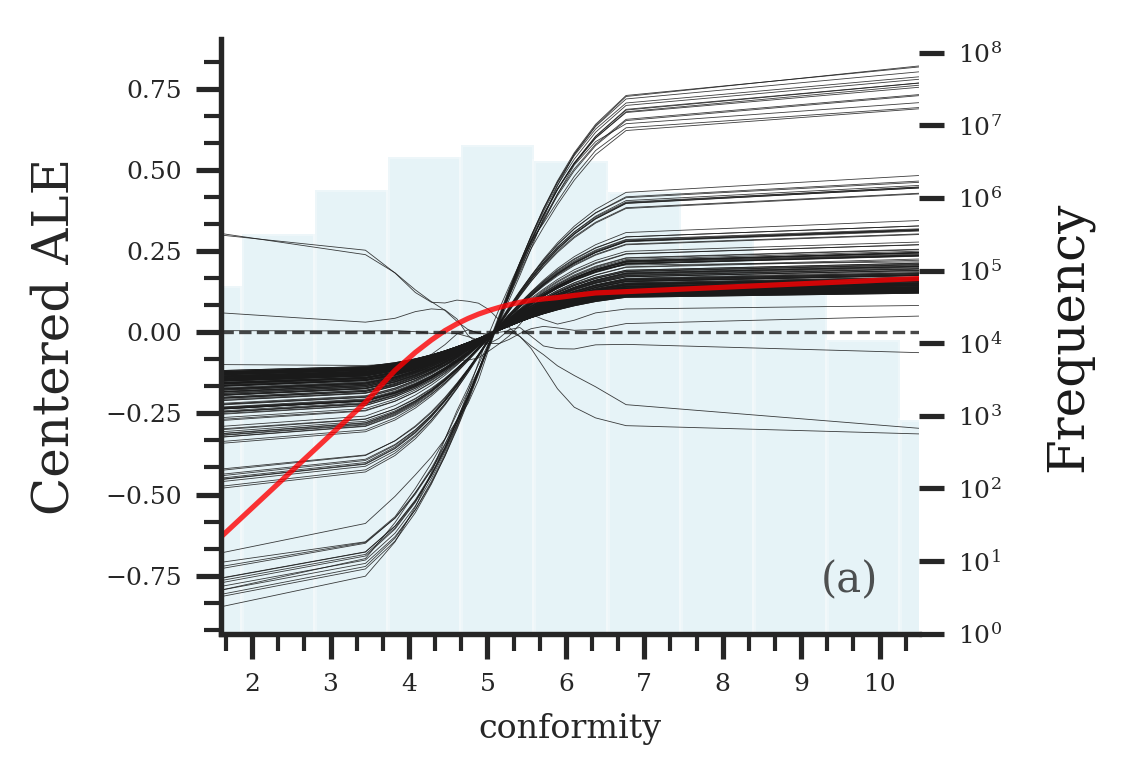

In [123]:
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   ice_curves=ice_dataset,
                                  )

## 绘制2D ALE (conformity - Covid case)

In [7]:
# # load data and model
# dataset20 = load_data("results/all_data_2020_dataset_with_substitute_confounders.h5")
# # 选取32w
# dataset20 = dataset_sampling(dataset20, num_select=32000)

In [4]:
# load data and model
dataset20 = load_data("../data/sample_32w.h5")
column_2020 = 13
dataset20 = obtain_dataset(dataset20, column_2020)

# 选取32w
dataset20 = dataset_sampling(dataset20, num_select=32000)

2024-06-03 16:20:15.468 | DEBUG    | ale:_second_order_ale_quant:599 - Quantiles: (array([ 0.       ,  2.78135  ,  3.2087512,  3.4921508,  3.7116032,
        3.8954036,  4.056823 ,  4.204558 ,  4.343093 ,  4.477067 ,
        4.607624 ,  4.7387595,  4.8720665,  5.0130796,  5.166452 ,
        5.33667  ,  5.537948 ,  5.78595  ,  6.114239 ,  6.6072607,
       12.053802 ], dtype=float32), array([0.       , 0.6931472, 1.609438 , 2.3025851, 3.0445225, 4.1108737],
      dtype=float32)).


(array([ 0.       ,  2.78135  ,  3.2087512,  3.4921508,  3.7116032,
        3.8954036,  4.056823 ,  4.204558 ,  4.343093 ,  4.477067 ,
        4.607624 ,  4.7387595,  4.8720665,  5.0130796,  5.166452 ,
        5.33667  ,  5.537948 ,  5.78595  ,  6.114239 ,  6.6072607,
       12.053802 ], dtype=float32), array([0.       , 0.6931472, 1.609438 , 2.3025851, 3.0445225, 4.1108737],
      dtype=float32))
(20, 5)
results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 0it [00:00, ?it/s]2024-06-03 16:20:19.880340: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
Predicting rnn_propensity_weighted: 500it [00:13, 35.78it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.93it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.73it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.83it/s]
2024-06-03 16:21:28.248 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.78135    3.2087512  3.4921508  3.7116032  3.8954036
  4.056823   4.204558   4.343093   4.477067   4.607624   4.7387595
  4.8720665  5.0130796  5.166452   5.33667    5.537948   5.78595
  6.114239   6.6072607 12.053802 ].
2024-06-03 16:21:28.279 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        0.6931472 1.609438  2.3025851 3.0445225 4.1108737].


plotting contour...


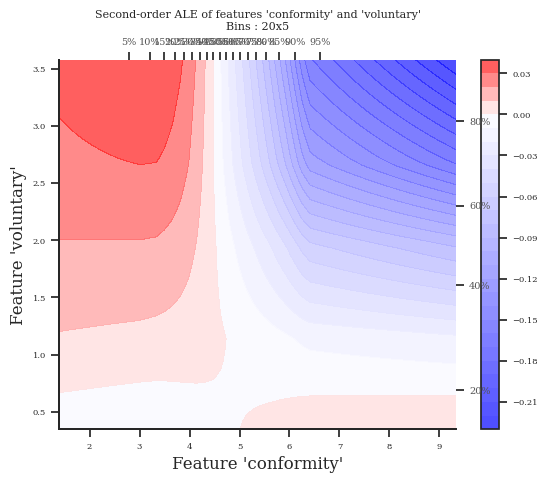

In [4]:
# 计算2阶交互
# exp_name = "all_data_2020"
# _, ale, quantiles_list = compute_ale(dataset20, 'rmsn_' + str(exp_name), b_use_predicted_confounders=True, features=['conformity','voluntary'])

2024-06-06 12:45:25.969 | DEBUG    | ale:_second_order_ale_quant:599 - Quantiles: (array([ 0.       ,  2.7752223,  3.2051878,  3.4884806,  3.7072935,
        3.8927236,  4.05529  ,  4.2031155,  4.3408146,  4.47522  ,
        4.6067924,  4.7374287,  4.8713126,  5.011616 ,  5.163897 ,
        5.3357716,  5.5389056,  5.788603 ,  6.116059 ,  6.603573 ,
       12.216275 ], dtype=float32), array([0.       , 0.6931472, 1.609438 , 2.3025851, 3.0445225, 4.1108737],
      dtype=float32)).


(array([ 0.       ,  2.7752223,  3.2051878,  3.4884806,  3.7072935,
        3.8927236,  4.05529  ,  4.2031155,  4.3408146,  4.47522  ,
        4.6067924,  4.7374287,  4.8713126,  5.011616 ,  5.163897 ,
        5.3357716,  5.5389056,  5.788603 ,  6.116059 ,  6.603573 ,
       12.216275 ], dtype=float32), array([0.       , 0.6931472, 1.609438 , 2.3025851, 3.0445225, 4.1108737],
      dtype=float32))
(20, 5)
results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 0it [00:00, ?it/s]2024-06-06 12:45:29.911580: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
Predicting rnn_propensity_weighted: 500it [00:13, 37.02it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.99it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.88it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:12, 38.59it/s]
2024-06-06 12:46:34.763 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7752223  3.2051878  3.4884806  3.7072935  3.8927236
  4.05529    4.2031155  4.3408146  4.47522    4.6067924  4.7374287
  4.8713126  5.011616   5.163897   5.3357716  5.5389056  5.788603
  6.116059   6.603573  12.216275 ].
2024-06-06 12:46:34.795 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.        0.6931472 1.609438  2.3025851 3.0445225 4.1108737].


plotting contour...


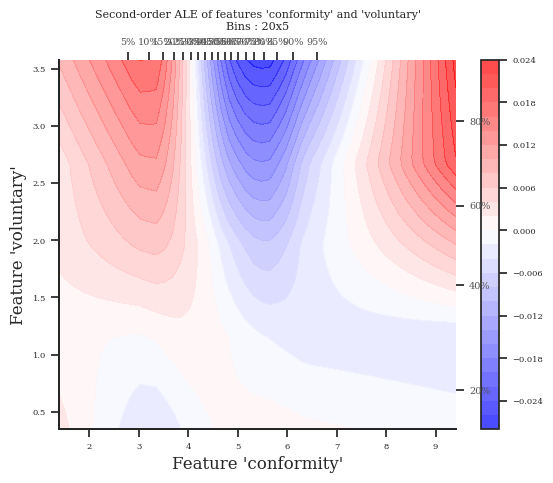

In [5]:
exp_name = "base_model_optimal_v2"
_, ale, quantiles_list = compute_ale(dataset20, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['conformity','voluntary'])

In [6]:
# 构建xarray数据集
def create_2d_ale_dataset(ale_dict, quantiles_list, values, model_names, feature_names):
  
    # quantiles取平均
    centered_list = []
    for quantiles in quantiles_list:
        quantiles = (quantiles[:-1] + quantiles[1:]) / 2
        centered_list.append(quantiles)
    quantiles_list = centered_list

    # 创建data_vars字典
    data_vars = {}
    for model_name in model_names:
        ale = ale_dict[model_name]
        # ale添加一个维度
        ale = ale[np.newaxis, :]
        
        data_vars[f"{feature_names[0]}__{feature_names[1]}__{model_name}__ale"] = \
            (["n_bootstrap", f"n_bins__{feature_names[0]}", f"n_bins__{feature_names[1]}"], ale)

    for i in range(2):
        data_vars[f"{feature_names[i]}__bin_values"] = ([f"n_bins__{feature_names[i]}"], quantiles_list[i])
        data_vars[feature_names[i]] = (["n_X"], values[i].reshape(-1))

    # 创建 xarray.Dataset
    dataset = xr.Dataset(
        data_vars=data_vars,
        attrs={
            "estimator_output": "raw",
            "estimators used": model_names,
            "method": "ale",
            "dimension": "2D",
            "features used": [(feature_names[0], feature_names[1])],
        }
    )

    return dataset

In [7]:
X = [dataset20['treatments'][:,:,0], dataset20['covariates'][:,:,10]]
ale_dict = {"RNN_Model": ale.filled(np.nan)}
model_names = ["RNN_Model"]
feature_names = ['conformity','voluntary']
ale_2d = create_2d_ale_dataset(ale_dict, quantiles_list, X, model_names, feature_names)

In [9]:
ale_2d

<xarray.Dataset>
Dimensions:                                (n_bootstrap: 1,
                                            n_bins__conformity: 20,
                                            n_bins__voluntary: 5, n_X: 5152000)
Dimensions without coordinates: n_bootstrap, n_bins__conformity,
                                n_bins__voluntary, n_X
Data variables:
    conformity__voluntary__RNN_Model__ale  (n_bootstrap, n_bins__conformity, n_bins__voluntary) float64 ...
    conformity__bin_values                 (n_bins__conformity) float32 1.391...
    conformity                             (n_X) float32 5.281 4.821 ... 4.633
    voluntary__bin_values                  (n_bins__voluntary) float32 0.3466...
    voluntary                              (n_X) float32 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model']
    method:            ale
    dimension:         2D
    features used:     [('conformity', 'voluntary')]

In [8]:
def _second_order_quant_plot(fig, ax, quantiles_list, ale, mark_empty=True, n_interp=50, **kwargs):
    # define colormap - let value 0 equals white
    min_val = np.min(ale)
    max_val = np.max(ale)
    midpoint = abs(min_val) / (abs(max_val) + abs(min_val))
    colors = [(0, "blue"), (midpoint, "white"), (1, "red")]
    linear_cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", colors)
    
    centres_list = [_get_centres(quantiles) for quantiles in quantiles_list]
    print("plotting contour...")
    n_x, n_y = _check_two_ints(n_interp)
    x = np.linspace(centres_list[0][0], centres_list[0][-1], n_x)
    y = np.linspace(centres_list[1][0], centres_list[1][-1], n_y)

    X, Y = np.meshgrid(x, y, indexing="xy")
    ale_interp = scipy.interpolate.interp2d(centres_list[0], centres_list[1], ale.T)
    # CF = ax.contourf(X, Y, ale_interp(x, y), cmap="bwr", levels=30, alpha=0.7, **kwargs)
    CF = ax.contourf(X, Y, ale_interp(x, y), cmap=linear_cmap, vmin=min_val, vmax=max_val, levels=30, alpha=0.7, **kwargs)

    if mark_empty and np.any(ale.mask):
        # Do not autoscale, so that boxes at the edges (contourf only plots the bin
        # centres, not their edges) don't enlarge the plot.
        plt.autoscale(False)
        # Add rectangles to indicate cells without samples.
        for i, j in zip(*np.where(ale.mask)):
            ax.add_patch(
                Rectangle(
                    [quantiles_list[0][i], quantiles_list[1][j]],
                    quantiles_list[0][i + 1] - quantiles_list[0][i],
                    quantiles_list[1][j + 1] - quantiles_list[1][j],
                    linewidth=1,
                    edgecolor="k",
                    facecolor="none",
                    alpha=0.4,
                )
            )
    
    # fig.colorbar(CF)
    return fig, ax, CF

In [9]:
def _ax_quantiles(ax, quantiles, twin="x", num_ticks=10):
    
    if twin not in ("x", "y"):
        raise ValueError("'twin' should be one of 'x' or 'y'.")

    # logger.debug("Quantiles: {}.", quantiles)
    if len(quantiles) > 10:
        step = max(1, len(quantiles) // num_ticks)
        selected_indices = np.arange(0, len(quantiles), step)
        quantiles = quantiles[selected_indices]

    # Duplicate the 'opposite' axis so we can define a distinct set of ticks for the
    # desired axis (`twin`).
    ax_mod = ax.twiny() if twin == "x" else ax.twinx()

    # Set the new axis' ticks for the desired axis.
    getattr(ax_mod, "set_{twin}ticks".format(twin=twin))(quantiles)
    # Set the corresponding tick labels.

    # Calculate tick label percentage values for each quantile (bin edge).
    percentages = (
        100 * np.arange(len(quantiles), dtype=np.float64) / (len(quantiles) - 1)
    )

    # If there is a fractional part, add a decimal place to show (part of) it.
    fractional = (~np.isclose(percentages % 1, 0)).astype("int8")

    getattr(ax_mod, "set_{twin}ticklabels".format(twin=twin))(
        [
            "{0:0.{1}f}%".format(percent, format_fraction)
            for percent, format_fraction in zip(percentages, fractional)
        ],
        color="#545454",
        fontsize=7,
    )
    getattr(ax_mod, "set_{twin}lim".format(twin=twin))(
        getattr(ax, "get_{twin}lim".format(twin=twin))()
    )
    
    # 设置刻度线的长度
    ax_mod.tick_params(axis=twin, length=2)  # 设置刻度线长度为6

In [10]:
def add_histogram_axis(
        ax,
        data,
        bins=15,
        min_value=None,
        max_value=None,
        density=True,
        orientation="vertical",
        **kwargs,
    ):
    
        color = kwargs.get("color", "xkcd:steel")
        edgecolor = kwargs.get("edgecolor", "white")

        hist_values, bin_edges = np.histogram(data, bins=bins)
        print(hist_values, bin_edges)
        if orientation=='vertical':
            ax.bar(bin_edges[:-1], hist_values, width=np.diff(bin_edges), align='edge',
               alpha=0.35, color=color, edgecolor=edgecolor, zorder=1)
        else:
            ax.barh(bin_edges[:-1], hist_values, height=np.diff(bin_edges), align='edge',
               alpha=0.35, color=color, edgecolor=edgecolor, zorder=1)

In [11]:
def plot_2d_kde(ax, x, y):
        """
        Add contours of the kernel density estimate
        """
        xmin, xmax = np.min(x), np.max(x)
        ymin, ymax = np.min(y), np.max(y)

        # Peform the kernel density estimate
        xx, yy = np.mgrid[xmin:xmax:50j, ymin:ymax:50j]
        positions = np.vstack([xx.ravel(), yy.ravel()])
        values = np.vstack([x, y])
        kernel = sps.gaussian_kde(values)
        f = np.reshape(kernel(positions).T, xx.shape)

        percentiles = [50.0, 75.0, 90.0]
        linewidths = [
            0.25,
            0.75,
            1.5,
        ]
        line_colors = ["xkcd:indigo", "xkcd:dark cyan", "xkcd:dandelion"]
        levels = np.zeros((len(percentiles)))
        for i in range(len(percentiles)):
            levels[i] = np.percentile(f.ravel(), percentiles[i])

        # Contour plot
        cset = ax.contour(
            xx,
            yy,
            f,
            levels=levels,
            linewidths=linewidths,
            colors=line_colors,
        )
        fmt = {}
        for l, s in zip(cset.levels, percentiles[::-1]):
            fmt[l] = f"{int(s)}"

        ax.clabel(cset, cset.levels, inline=True, fontsize=6, fmt=fmt)

plotting contour...


`interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

        `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see


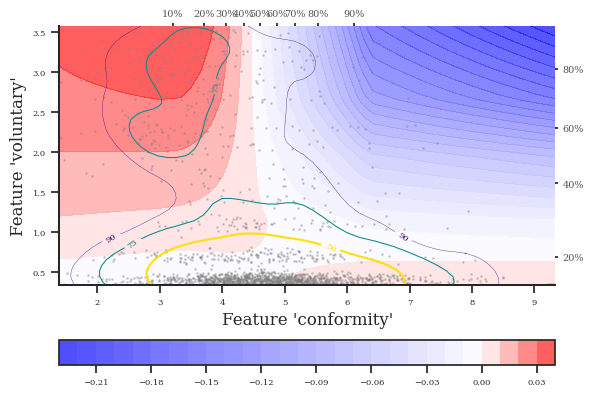

In [47]:
data = ale_2d
fig, ax = plt.subplots()
fig, ax, cf = _second_order_quant_plot(fig, ax, quantiles_list, ale)
for twin, quantiles in zip(("x", "y"), quantiles_list):
    _ax_quantiles(ax, quantiles, twin=twin)

xdata1 = data[f"{feature_names[0]}__bin_values"].values
xdata2 = data[f"{feature_names[1]}__bin_values"].values

xdata1_hist = data[f"{feature_names[0]}"].values
xdata2_hist = data[f"{feature_names[1]}"].values

add_hist = False; scatter = True; kde_curves = True;

if add_hist:
    # 创建新的轴用于绘制直方图
    top_ax = ax.inset_axes([0, 1.08, 1, 0.2], transform=ax.transAxes)
    rhs_ax = ax.inset_axes([1.08, 0, 0.2, 1], transform=ax.transAxes)

    add_histogram_axis(
        top_ax,
        xdata1_hist,
        bins=15,
        orientation="vertical",
        min_value=xdata1[1],
        max_value=xdata1[-2],
        color="xkcd:steel",
        edgecolor="white"
    )
    # 添加右侧的直方图
    add_histogram_axis(
        rhs_ax,
        xdata2_hist,
        bins=5,
        orientation="horizontal",
        min_value=xdata2[1],
        max_value=xdata2[-2],
        color="xkcd:steel",
        edgecolor="white"
    )

    # 设置隐藏轴线标签和框架
    top_ax.xaxis.set_visible(False)
    top_ax.yaxis.set_visible(False)
    top_ax.spines['top'].set_visible(False)
    top_ax.spines['right'].set_visible(False)
    top_ax.spines['left'].set_visible(False)
    top_ax.spines['bottom'].set_visible(False)
    top_ax.tick_params(axis='x', which='both', labelbottom=False)
    top_ax.tick_params(axis='y', which='both', labelleft=False)

    rhs_ax.xaxis.set_visible(False)
    rhs_ax.yaxis.set_visible(False)
    rhs_ax.spines['top'].set_visible(False)
    rhs_ax.spines['right'].set_visible(False)
    rhs_ax.spines['left'].set_visible(False)
    rhs_ax.spines['bottom'].set_visible(False)
    rhs_ax.tick_params(axis='x', which='both', labelbottom=False)
    rhs_ax.tick_params(axis='y', which='both', labelleft=False)

if scatter:
    # 随机采样
    idx = np.random.choice(len(xdata1_hist), size=min(2000, len(xdata1_hist)))
    
    # 获取轴的范围并进行裁剪
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xdata1_filtered = np.clip(xdata1_hist[idx], xlim[0]+0.05, xlim[1]-0.05)
    xdata2_filtered = np.clip(xdata2_hist[idx], ylim[0]+0.05, ylim[1]-0.05)
    
    # 添加随机抖动
    xdata1_jittered = xdata1_filtered + np.random.normal(0, 0.05, size=len(xdata1_filtered))
    xdata2_jittered = xdata2_filtered + np.random.normal(0, 0.05, size=len(xdata2_filtered))

    ax.scatter(xdata1_jittered, xdata2_jittered, alpha=0.3, color="grey", s=1)
    # idx = np.random.choice(
    #                     len(xdata1_hist), size=min(2000, len(xdata1_hist))
    #                 )
    # xdata1_clipped = np.clip(xdata1_hist[idx], ax.get_xlim()[0]+0.05, ax.get_xlim()[1]-0.05)
    # xdata2_clipped = np.clip(xdata2_hist[idx], ax.get_ylim()[0]+0.05, ax.get_ylim()[1]-0.05)
    # ax.scatter(xdata1_clipped, xdata2_clipped, alpha=0.3, color="grey", s=3)
    # ax.scatter(xdata1_hist[idx], xdata2_hist[idx], alpha=0.3, color="grey", s=1)

if kde_curves:
    # There can be very rare cases where two functions are linearly correlated (cc~1.0)
    # which can cause the KDE calculations to fail!
    # xdata1_clipped = np.clip(xdata1_hist, ax.get_xlim()[0]+0.05, ax.get_xlim()[1]-0.05)
    # xdata2_clipped = np.clip(xdata2_hist, ax.get_ylim()[0]+0.05, ax.get_ylim()[1]-0.05)
    plot_2d_kde(ax, xdata1_jittered, xdata2_jittered)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel(f"Feature '{feature_names[0]}'")
ax.set_ylabel(f"Feature '{feature_names[1]}'")
fig.colorbar(cf, ax=ax, orientation='horizontal')
plt.show()

plotting contour...


`interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

        `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, for regular grids use `RegularGridInterpolator` instead.
        For scattered data, prefer `LinearNDInterpolator` or
        `CloughTocher2DInterpolator`.

        For more details see


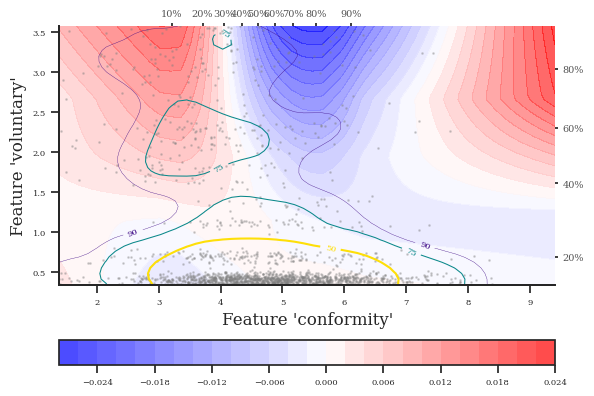

In [12]:
data = ale_2d
fig, ax = plt.subplots()
fig, ax, cf = _second_order_quant_plot(fig, ax, quantiles_list, ale)
for twin, quantiles in zip(("x", "y"), quantiles_list):
    _ax_quantiles(ax, quantiles, twin=twin)

xdata1 = data[f"{feature_names[0]}__bin_values"].values
xdata2 = data[f"{feature_names[1]}__bin_values"].values

xdata1_hist = data[f"{feature_names[0]}"].values
xdata2_hist = data[f"{feature_names[1]}"].values

add_hist = False; scatter = True; kde_curves = True;

if add_hist:
    # 创建新的轴用于绘制直方图
    top_ax = ax.inset_axes([0, 1.08, 1, 0.2], transform=ax.transAxes)
    rhs_ax = ax.inset_axes([1.08, 0, 0.2, 1], transform=ax.transAxes)

    add_histogram_axis(
        top_ax,
        xdata1_hist,
        bins=15,
        orientation="vertical",
        min_value=xdata1[1],
        max_value=xdata1[-2],
        color="xkcd:steel",
        edgecolor="white"
    )
    # 添加右侧的直方图
    add_histogram_axis(
        rhs_ax,
        xdata2_hist,
        bins=5,
        orientation="horizontal",
        min_value=xdata2[1],
        max_value=xdata2[-2],
        color="xkcd:steel",
        edgecolor="white"
    )

    # 设置隐藏轴线标签和框架
    top_ax.xaxis.set_visible(False)
    top_ax.yaxis.set_visible(False)
    top_ax.spines['top'].set_visible(False)
    top_ax.spines['right'].set_visible(False)
    top_ax.spines['left'].set_visible(False)
    top_ax.spines['bottom'].set_visible(False)
    top_ax.tick_params(axis='x', which='both', labelbottom=False)
    top_ax.tick_params(axis='y', which='both', labelleft=False)

    rhs_ax.xaxis.set_visible(False)
    rhs_ax.yaxis.set_visible(False)
    rhs_ax.spines['top'].set_visible(False)
    rhs_ax.spines['right'].set_visible(False)
    rhs_ax.spines['left'].set_visible(False)
    rhs_ax.spines['bottom'].set_visible(False)
    rhs_ax.tick_params(axis='x', which='both', labelbottom=False)
    rhs_ax.tick_params(axis='y', which='both', labelleft=False)

if scatter:
    # 随机采样
    idx = np.random.choice(len(xdata1_hist), size=min(2000, len(xdata1_hist)))
    
    # 获取轴的范围并进行裁剪
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xdata1_filtered = np.clip(xdata1_hist[idx], xlim[0]+0.05, xlim[1]-0.05)
    xdata2_filtered = np.clip(xdata2_hist[idx], ylim[0]+0.05, ylim[1]-0.05)
    
    # 添加随机抖动
    xdata1_jittered = xdata1_filtered + np.random.normal(0, 0.05, size=len(xdata1_filtered))
    xdata2_jittered = xdata2_filtered + np.random.normal(0, 0.05, size=len(xdata2_filtered))

    ax.scatter(xdata1_jittered, xdata2_jittered, alpha=0.3, color="grey", s=1)
    # idx = np.random.choice(
    #                     len(xdata1_hist), size=min(2000, len(xdata1_hist))
    #                 )
    # xdata1_clipped = np.clip(xdata1_hist[idx], ax.get_xlim()[0]+0.05, ax.get_xlim()[1]-0.05)
    # xdata2_clipped = np.clip(xdata2_hist[idx], ax.get_ylim()[0]+0.05, ax.get_ylim()[1]-0.05)
    # ax.scatter(xdata1_clipped, xdata2_clipped, alpha=0.3, color="grey", s=3)
    # ax.scatter(xdata1_hist[idx], xdata2_hist[idx], alpha=0.3, color="grey", s=1)

if kde_curves:
    # There can be very rare cases where two functions are linearly correlated (cc~1.0)
    # which can cause the KDE calculations to fail!
    # xdata1_clipped = np.clip(xdata1_hist, ax.get_xlim()[0]+0.05, ax.get_xlim()[1]-0.05)
    # xdata2_clipped = np.clip(xdata2_hist, ax.get_ylim()[0]+0.05, ax.get_ylim()[1]-0.05)
    plot_2d_kde(ax, xdata1_jittered, xdata2_jittered)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel(f"Feature '{feature_names[0]}'")
ax.set_ylabel(f"Feature '{feature_names[1]}'")
fig.colorbar(cf, ax=ax, orientation='horizontal')
plt.show()

## conformity vs policy

In [8]:
# 构建一个反事实数据集
# E1_index = 1; E2_index = 2;

# dataset_counterfactual = copy.deepcopy(dataset20)
# dataset_counterfactual['treatments'][:, :, E1_index] = 0
# dataset_counterfactual2 = copy.deepcopy(dataset20)
# dataset_counterfactual2['treatments'][:, :, E2_index] = 0

In [37]:
dataset = load_data("../data/sample_32w.h5")
column_2020 = 13  # index of year 2020 indicator
dataset20 = obtain_dataset(dataset, column_2020)
dataset20 = dataset_sampling(dataset20, num_select=10000)

del dataset; gc.collect()
E1_index = 21; E2_index = 22;
dataset_counterfactual = copy.deepcopy(dataset20)
dataset_counterfactual['covariates'][:, :, E1_index] = 0
dataset_counterfactual2 = copy.deepcopy(dataset20)
dataset_counterfactual2['covariates'][:, :, E2_index] = 0

2024-06-04 10:44:50.958 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         2.7879772  3.211453   3.4923055  3.7121875  3.8972805
  4.0597386  4.207221   4.345022   4.477929   4.607671   4.737211
  4.8709445  5.0111146  5.163077   5.3334966  5.533642   5.7841897
  6.1140885  6.6004605 12.435878 ].


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 0it [00:00, ?it/s]2024-06-04 10:44:54.644533: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
Predicting rnn_propensity_weighted: 500it [00:13, 37.23it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.19it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.73it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.86it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.20it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.16it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.91it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.91it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.73it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.58it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.24it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.75it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.85it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.76it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.58it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.09it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.63it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.69it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.63it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.25it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.58it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.93it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.66it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.19it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.29it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.78it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.12it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.90it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.43it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.10it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.18it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.84it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.89it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.97it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.53it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.47it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.77it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.76it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.19it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.59it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.86it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.61it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.51it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.46it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.93it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.97it/s]


ale average = 0.06991397387401786
plotting heatmap...


2024-06-04 10:59:10.699 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         2.7879772  3.211453   3.4923055  3.7121875  3.8972805
  4.0597386  4.207221   4.345022   4.477929   4.607671   4.737211
  4.8709445  5.0111146  5.163077   5.3334966  5.533642   5.7841897
  6.1140885  6.6004605 12.435878 ].


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.06it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.72it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.40it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.23it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.05it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.82it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.86it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.51it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.71it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.83it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.87it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.47it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.59it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.14it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.12it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.53it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.20it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.81it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.09it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.05it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.60it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.39it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.63it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.32it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.80it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.07it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.58it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.37it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.29it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.04it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.41it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.72it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.97it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.44it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 34.25it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.34it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.97it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.84it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.08it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.24it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.59it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.61it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.19it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.63it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.51it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.48it/s]


ale average = 0.07374408098406124
plotting heatmap...


2024-06-04 11:13:34.288 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         2.7879772  3.211453   3.4923055  3.7121875  3.8972805
  4.0597386  4.207221   4.345022   4.477929   4.607671   4.737211
  4.8709445  5.0111146  5.163077   5.3334966  5.533642   5.7841897
  6.1140885  6.6004605 12.435878 ].


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 34.95it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.16it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.42it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.35it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.90it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.49it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.71it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.55it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.79it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.47it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.94it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.19it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.06it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.93it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 34.87it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.83it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.18it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.44it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.68it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 34.65it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.59it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 34.96it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.80it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.89it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.36it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.16it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.16it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.08it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.28it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.06it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 34.60it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 34.52it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:14, 35.48it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.88it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.45it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.72it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.87it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.63it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.08it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.88it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.43it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.27it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.05it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.83it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.45it/s]


results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_all_data_2020_use_confounders_True/rnn_propensity_weighted/rnn_propensity_weighted_0.1_135_100_64_0.005_1.0_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 35.93it/s]


ale average = 0.07107950897926311
plotting heatmap...


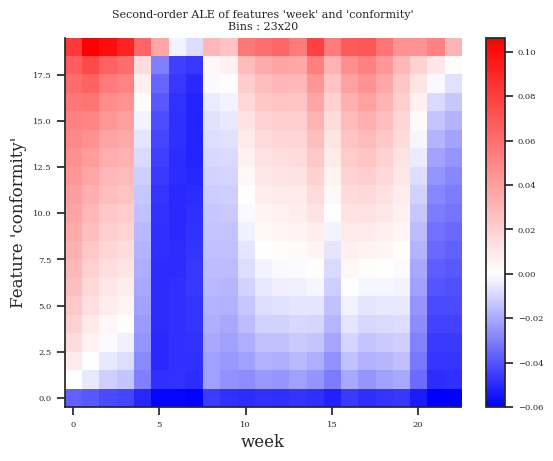

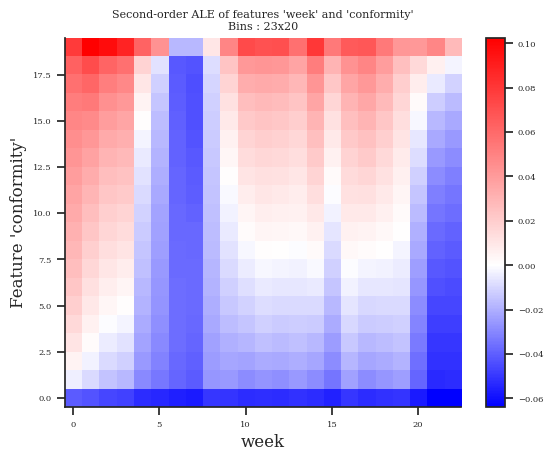

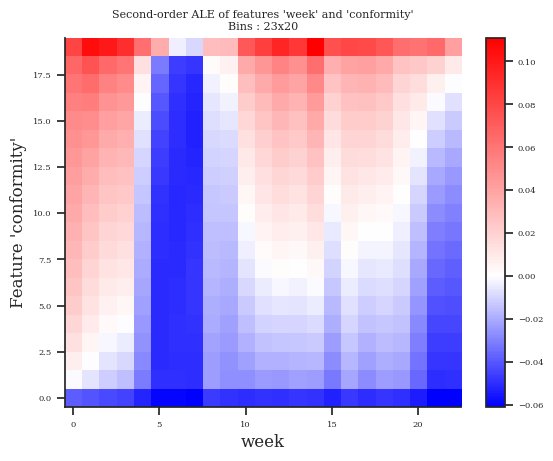

In [9]:
# exp_name = "all_data_2020"
# _, ale_raw , _ = compute_ale(dataset20, 'rmsn_' + str(exp_name), b_use_predicted_confounders=True, features=['week','conformity'])
# _, ale_E1 , _ = compute_ale(dataset_counterfactual, 'rmsn_' + str(exp_name), b_use_predicted_confounders=True, features=['week','conformity'])
# _, ale_E2 , _ = compute_ale(dataset_counterfactual2, 'rmsn_' + str(exp_name), b_use_predicted_confounders=True, features=['week','conformity'])

2024-06-07 14:43:43.656 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         2.7827775  3.2120821  3.4952033  3.7147727  3.8982773
  4.062006   4.2119884  4.351191   4.484132   4.6137185  4.743071
  4.8762307  5.0157166  5.1665015  5.335293   5.535565   5.782603
  6.112501   6.5933104 10.729656 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.55it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.13it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.89it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 32.89it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.18it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.32it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.95it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.58it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.37it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.38it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.53it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.56it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.43it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.28it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.84it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.41it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.00it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.32it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.92it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.64it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.89it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.48it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.74it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.29it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.89it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.44it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.27it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.24it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.35it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.67it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.30it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.80it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.59it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.59it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.47it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.42it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.11it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.43it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.49it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.60it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.19it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.79it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.50it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.04it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 36.02it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.60it/s]


ale average = 0.02795523400937207
plotting heatmap...


2024-06-07 14:48:46.646 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         2.7827775  3.2120821  3.4952033  3.7147727  3.8982773
  4.062006   4.2119884  4.351191   4.484132   4.6137185  4.743071
  4.8762307  5.0157166  5.1665015  5.335293   5.535565   5.782603
  6.112501   6.5933104 10.729656 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.53it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.22it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.63it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.48it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.03it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.74it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.17it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.62it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.08it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.65it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.50it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.31it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.17it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.62it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.50it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.07it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.91it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.58it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.77it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.81it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.30it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.47it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.58it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.68it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.70it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.54it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.62it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.28it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.51it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.25it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.08it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.72it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.57it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.88it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.10it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.71it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.84it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.68it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.97it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.01it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.71it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.41it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.73it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.43it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.35it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.74it/s]


ale average = 0.02775839749449099
plotting heatmap...


2024-06-07 14:53:49.452 | DEBUG    | ale:_second_order_ale_quant:481 - Quantiles: [ 0.         2.7827775  3.2120821  3.4952033  3.7147727  3.8982773
  4.062006   4.2119884  4.351191   4.484132   4.6137185  4.743071
  4.8762307  5.0157166  5.1665015  5.335293   5.535565   5.782603
  6.112501   6.5933104 10.729656 ].


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.47it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.55it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.99it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.29it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.29it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.50it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.48it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.13it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.81it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.27it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.03it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.97it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 36.02it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.20it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.84it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.77it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.19it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.74it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.22it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.34it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.57it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.60it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.95it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.66it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.53it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.88it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.26it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 36.12it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.53it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.35it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.65it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.08it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.02it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.78it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.42it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.78it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.89it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.45it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.09it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.14it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.10it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.66it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.86it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 35.38it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 34.08it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 157it [00:04, 33.35it/s]


ale average = 0.0345014649891529
plotting heatmap...


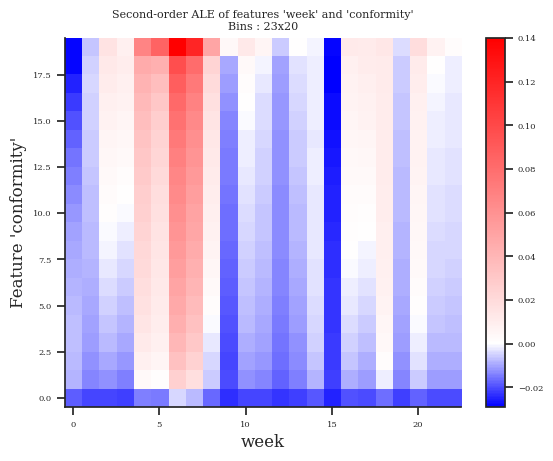

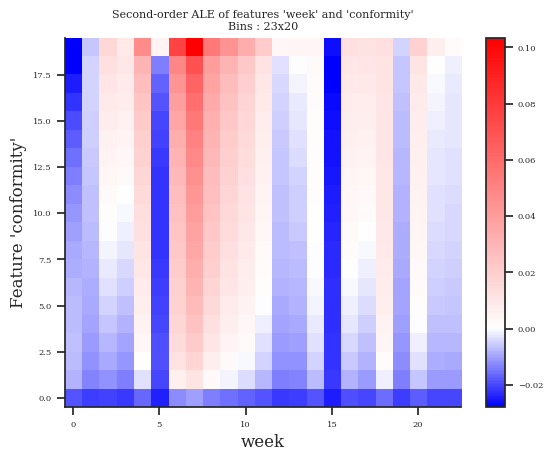

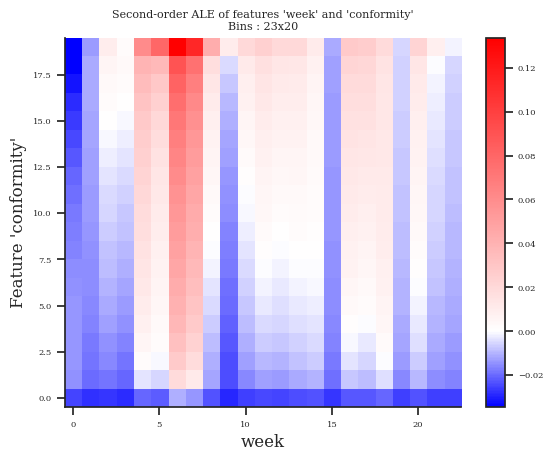

In [38]:
exp_name = "base_model_optimal_v2"
_, ale_raw , _ = compute_ale(dataset20, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['week','conformity'])
_, ale_E1 , _ = compute_ale(dataset_counterfactual, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['week','conformity'])
_, ale_E2 , _ = compute_ale(dataset_counterfactual2, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['week','conformity'])

In [15]:
# 保存数据
ale_raw = ale_raw.filled(np.nan)
ale_E1 = ale_E1.filled(np.nan)
ale_E2 = ale_E2.filled(np.nan)

# np.save("../data/result_data/ale_2020_for_policy_effect.npy", ale_raw)
# np.save("../data/result_data/ale_2020_without_E1.npy", ale_E1)
# np.save("../data/result_data/ale_2020_without_E2.npy", ale_E2)

In [17]:
# 导入数据
ale_raw = np.load("../data/result_data/ale_2020_for_policy_effect.npy")
ale_E1 = np.load("../data/result_data/ale_2020_without_E1.npy")
ale_E2 = np.load("../data/result_data/ale_2020_without_E2.npy")

In [18]:
quantile =  [0.0, 2.7879772, 3.211453, 3.4923055, 3.7121875, 3.8972805, 4.0597386, 4.207221, 4.345022, 4.477929, 4.607671, 4.737211, 4.8709445, 5.0111146, 5.163077, 5.3334966, 5.533642, 5.7841897, 6.1140885, 6.6004605, 12.435878]
quantile = np.array(quantile)

In [19]:
# 选择时间段（E1:20200124-20200223; E2: 20200224-20200508）
def select_intervention_data(ale, start_target_date, end_target_date, start_date=pd.Timestamp('2019-12-21')):

    start_target_date = pd.Timestamp(start_target_date)
    end_target_date = pd.Timestamp(end_target_date)

    start_week = ((start_target_date - start_date).days // 7)
    end_week = ((end_target_date - start_date).days // 7)

    # 提取ale数组中相应的行
    ale_subset = ale[start_week:end_week + 1]
    return ale_subset

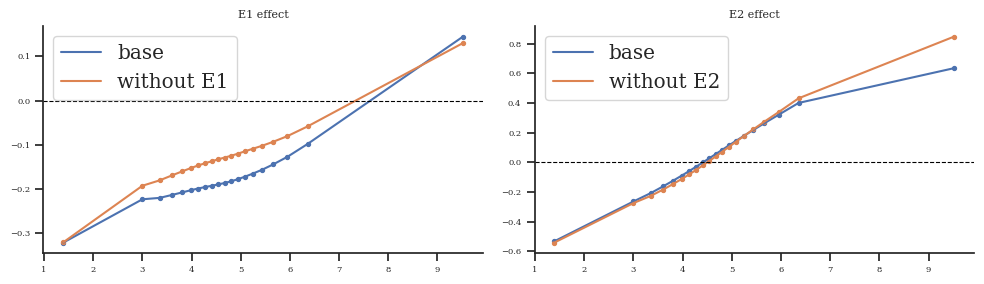

In [20]:
ale_raw_sub1 = select_intervention_data(ale_raw, '2020-01-24', '2020-02-23')
ale_E1_sub = select_intervention_data(ale_E1, '2020-01-24', '2020-02-23')
ale_raw_sub2 = select_intervention_data(ale_raw, '2020-02-24', '2020-05-08')
ale_E2_sub = select_intervention_data(ale_E2, '2020-02-24', '2020-05-08')

fig, ax = plt.subplots(1,2,figsize=(10, 3))

ax[0].plot(_get_centres(quantile), np.sum(ale_raw_sub1, axis=0), label='base')
ax[0].plot(_get_centres(quantile), np.sum(ale_E1_sub, axis=0), label='without E1')

ax[0].scatter(_get_centres(quantile), np.sum(ale_raw_sub1, axis=0), s=8)
ax[0].scatter(_get_centres(quantile), np.sum(ale_E1_sub, axis=0), s=8)

ax[0].legend(fontsize='large')
ax[0].set_title("E1 effect")

ax[1].plot(_get_centres(quantile), np.sum(ale_raw_sub2, axis=0), label='base')
ax[1].plot(_get_centres(quantile), np.sum(ale_E2_sub, axis=0), label='without E2')

ax[1].scatter(_get_centres(quantile), np.sum(ale_raw_sub2, axis=0), s=8)
ax[1].scatter(_get_centres(quantile), np.sum(ale_E2_sub, axis=0), s=8)

ax[1].legend(fontsize='large')
ax[1].set_title("E2 effect")

# Adding y=0 line
for axis in ax:
    axis.axhline(0, color='black', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.show()

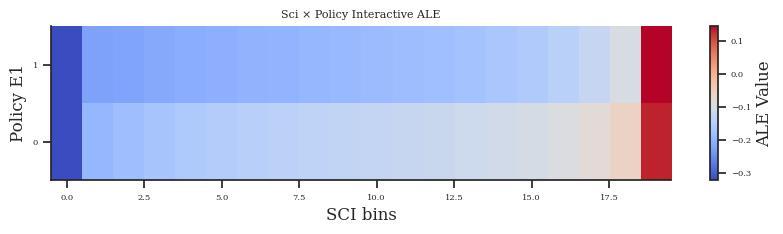

In [35]:
data_0 =  np.sum(ale_E1_sub, axis=0)
data_1 = np.sum(ale_raw_sub1, axis=0)

# Combine data_0 and data_1 into a single array for heatmap
data_combined = np.vstack((data_0, data_1))

# Create heatmap
plt.figure(figsize=(10, 2))
plt.imshow(data_combined, cmap='coolwarm', aspect='auto', origin='lower')
plt.colorbar(label='ALE Value')
plt.yticks([0, 1])
plt.ylabel('Policy E1')
plt.xlabel('SCI bins')
plt.title('Sci × Policy Interactive ALE')
plt.show()

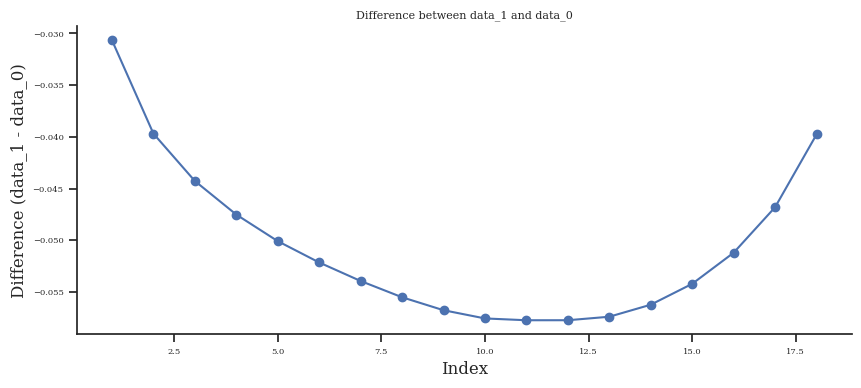

In [46]:
# Calculate the difference between data_1 and data_0
data_diff = data_1 - data_0

# Create a plot of the difference
plt.figure(figsize=(10, 4))
plt.plot(np.arange(1,19),data_diff[1:-1], marker='o', linestyle='-', color='b')
plt.xlabel('Index')
plt.ylabel('Difference (data_1 - data_0)')
plt.title('Difference between data_1 and data_0')
# plt.grid(True)
plt.show()

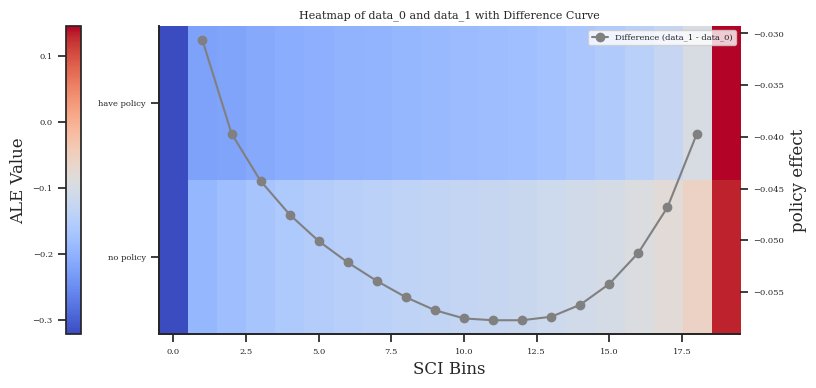

In [49]:
data_diff = data_1 - data_0

# Create a combined plot with the heatmap and the difference curve
fig, ax1 = plt.subplots(figsize=(10, 4))

# Plot the heatmap
cax = ax1.imshow(data_combined, cmap='coolwarm', aspect='auto', origin='lower')
fig.colorbar(cax, ax=ax1, label='ALE Value', location='left')
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['no policy', 'have policy'])
ax1.set_xlabel('SCI Bins')
ax1.set_title('Heatmap of data_0 and data_1 with Difference Curve')

# Create a secondary axis for the difference curve
ax2 = ax1.twinx()
ax2.plot(np.arange(1,19),data_diff[1:-1], marker='o', linestyle='-', color='grey', label='Difference (data_1 - data_0)')
ax2.set_ylabel('policy effect')
ax2.legend(loc='upper right')

plt.show()

In [24]:
data_1.shape

(20,)

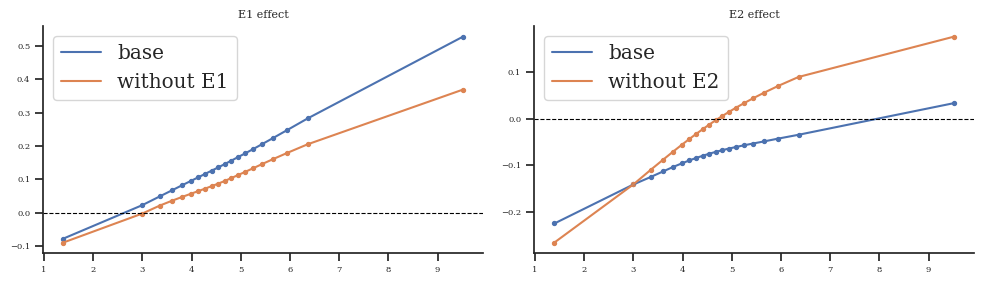

In [18]:
ale_raw_sub1 = select_intervention_data(ale_raw, '2020-01-24', '2020-02-23')
ale_E1_sub = select_intervention_data(ale_E1, '2020-01-24', '2020-02-23')
ale_raw_sub2 = select_intervention_data(ale_raw, '2020-02-24', '2020-05-08')
ale_E2_sub = select_intervention_data(ale_E2, '2020-02-24', '2020-05-08')

fig, ax = plt.subplots(1,2,figsize=(10, 3))

ax[0].plot(_get_centres(quantile), np.sum(ale_raw_sub1, axis=0), label='base')
ax[0].plot(_get_centres(quantile), np.sum(ale_E1_sub, axis=0), label='without E1')

ax[0].scatter(_get_centres(quantile), np.sum(ale_raw_sub1, axis=0), s=8)
ax[0].scatter(_get_centres(quantile), np.sum(ale_E1_sub, axis=0), s=8)

ax[0].legend(fontsize='large')
ax[0].set_title("E1 effect")

ax[1].plot(_get_centres(quantile), np.sum(ale_raw_sub2, axis=0), label='base')
ax[1].plot(_get_centres(quantile), np.sum(ale_E2_sub, axis=0), label='without E2')

ax[1].scatter(_get_centres(quantile), np.sum(ale_raw_sub2, axis=0), s=8)
ax[1].scatter(_get_centres(quantile), np.sum(ale_E2_sub, axis=0), s=8)

ax[1].legend(fontsize='large')
ax[1].set_title("E2 effect")

# Adding y=0 line
for axis in ax:
    axis.axhline(0, color='black', linewidth=0.8, linestyle='--')

plt.tight_layout()
plt.show()

## base model中的其他异质性

In [8]:
dataset = load_data("../data/sample_32w.h5")

column_2019 = 12  # index of year 2019 indicator
column_2020 = 13  # index of year 2020 indicator
column_2023 = 14  # index of year 2023 indicator
dataset19 = obtain_dataset(dataset, column_2019)
dataset19 = dataset_sampling(dataset19, num_select=32000)
dataset20 = obtain_dataset(dataset, column_2020)
dataset20 = dataset_sampling(dataset20, num_select=32000)
dataset23 = obtain_dataset(dataset, column_2023)
dataset23 = dataset_sampling(dataset23, num_select=32000)

del dataset; gc.collect()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '../data/sample_32w.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [7]:
exp_name = "base_model_optimal_v2"

### density

2024-06-07 11:00:35.252 | DEBUG    | ale:_second_order_ale_quant:599 - Quantiles: (array([ 0.       ,  3.3880355,  3.8224385,  4.091097 ,  4.292712 ,
        4.460237 ,  4.606604 ,  4.740575 ,  4.8667054,  4.9889126,
        5.1110463,  5.235193 ,  5.364766 ,  5.503195 ,  5.6554723,
        5.82821  ,  6.030904 ,  6.2818513,  6.600759 ,  7.092353 ,
       13.979414 ], dtype=float32), array([  0.       ,   2.6119418,   6.3073826,   9.607197 ,  12.430335 ,
        15.417986 ,  18.196316 ,  21.314875 ,  24.403816 ,  28.028648 ,
        31.423798 ,  35.127254 ,  38.879414 ,  42.686775 ,  46.74245  ,
        51.99801  ,  57.042877 ,  63.385082 ,  70.70533  ,  85.070496 ,
       148.87485  ], dtype=float32)).


(array([ 0.       ,  3.3880355,  3.8224385,  4.091097 ,  4.292712 ,
        4.460237 ,  4.606604 ,  4.740575 ,  4.8667054,  4.9889126,
        5.1110463,  5.235193 ,  5.364766 ,  5.503195 ,  5.6554723,
        5.82821  ,  6.030904 ,  6.2818513,  6.600759 ,  7.092353 ,
       13.979414 ], dtype=float32), array([  0.       ,   2.6119418,   6.3073826,   9.607197 ,  12.430335 ,
        15.417986 ,  18.196316 ,  21.314875 ,  24.403816 ,  28.028648 ,
        31.423798 ,  35.127254 ,  38.879414 ,  42.686775 ,  46.74245  ,
        51.99801  ,  57.042877 ,  63.385082 ,  70.70533  ,  85.070496 ,
       148.87485  ], dtype=float32))
(20, 20)
results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 0it [00:00, ?it/s]2024-06-07 11:00:39.157601: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
Predicting rnn_propensity_weighted: 500it [00:13, 37.60it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:12, 39.06it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:12, 38.89it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 38.07it/s]
2024-06-07 11:01:43.238 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3880355  3.8224385  4.091097   4.292712   4.460237
  4.606604   4.740575   4.8667054  4.9889126  5.1110463  5.235193
  5.364766   5.503195   5.6554723  5.82821    6.030904   6.2818513
  6.600759   7.092353  13.979414 ].
2024-06-07 11:01:43.269 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [  0.          2.6119418   6.3073826   9.607197   12.430335   15.417986
  18.196316   21.314875   24.403816   28.028648   31.423798   35.127254
  38.879414   42.686775   46.74245    51.99801    57.042877   63.385082
  70.70533    85.070496  148.87485  ].


plotting contour...


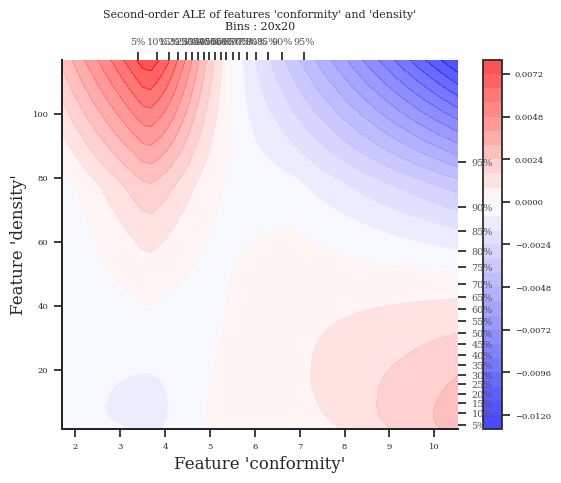

In [8]:
_, ale, quantiles_list = compute_ale(dataset19, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['conformity','density'])

2024-06-07 11:05:05.819 | DEBUG    | ale:_second_order_ale_quant:599 - Quantiles: (array([ 0.       ,  2.7853494,  3.2110758,  3.4931946,  3.7133973,
        3.8975146,  4.0586576,  4.2058334,  4.3440657,  4.477783 ,
        4.608979 ,  4.740272 ,  4.8747015,  5.015912 ,  5.1691995,
        5.340861 ,  5.5437794,  5.790985 ,  6.1156344,  6.599765 ,
       11.140136 ], dtype=float32), array([  0.      ,   2.549454,   6.075269,   9.296375,  12.294776,
        15.187174,  17.9912  ,  20.912022,  24.085672,  27.715958,
        30.873535,  34.484566,  38.289524,  42.310585,  46.39506 ,
        51.420437,  56.81587 ,  62.82709 ,  70.40617 ,  84.39696 ,
       148.87485 ], dtype=float32)).


(array([ 0.       ,  2.7853494,  3.2110758,  3.4931946,  3.7133973,
        3.8975146,  4.0586576,  4.2058334,  4.3440657,  4.477783 ,
        4.608979 ,  4.740272 ,  4.8747015,  5.015912 ,  5.1691995,
        5.340861 ,  5.5437794,  5.790985 ,  6.1156344,  6.599765 ,
       11.140136 ], dtype=float32), array([  0.      ,   2.549454,   6.075269,   9.296375,  12.294776,
        15.187174,  17.9912  ,  20.912022,  24.085672,  27.715958,
        30.873535,  34.484566,  38.289524,  42.310585,  46.39506 ,
        51.420437,  56.81587 ,  62.82709 ,  70.40617 ,  84.39696 ,
       148.87485 ], dtype=float32))
(20, 20)
results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:12, 39.04it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:12, 39.44it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.82it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 38.15it/s]
2024-06-07 11:06:13.182 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7853494  3.2110758  3.4931946  3.7133973  3.8975146
  4.0586576  4.2058334  4.3440657  4.477783   4.608979   4.740272
  4.8747015  5.015912   5.1691995  5.340861   5.5437794  5.790985
  6.1156344  6.599765  11.140136 ].
2024-06-07 11:06:13.214 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [  0.         2.549454   6.075269   9.296375  12.294776  15.187174
  17.9912    20.912022  24.085672  27.715958  30.873535  34.484566
  38.289524  42.310585  46.39506   51.420437  56.81587   62.82709
  70.40617   84.39696  148.87485 ].


plotting contour...


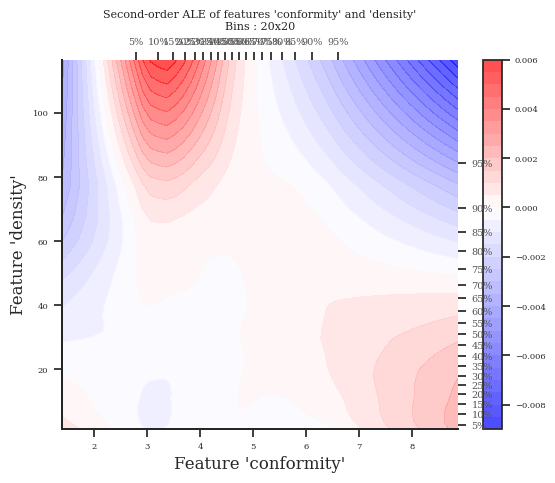

In [9]:
_, ale, quantiles_list = compute_ale(dataset20, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['conformity','density'])

2024-06-07 11:32:04.454 | DEBUG    | ale:_second_order_ale_quant:599 - Quantiles: (array([ 0.       ,  3.9525921,  4.314716 ,  4.5402045,  4.7117057,
        4.8567724,  4.985449 ,  5.10378  ,  5.215506 ,  5.3239164,
        5.430411 ,  5.5378833,  5.647893 ,  5.764407 ,  5.8928676,
        6.0377083,  6.212822 ,  6.43432  ,  6.727926 ,  7.1804504,
       12.815786 ], dtype=float32), array([  0.      ,   2.429129,   6.086399,   9.478477,  12.4051  ,
        15.330494,  18.126709,  21.237103,  24.403816,  28.019175,
        31.424238,  35.16155 ,  39.082176,  42.831326,  46.72582 ,
        51.734005,  56.92502 ,  63.4889  ,  71.06744 ,  84.40472 ,
       148.87485 ], dtype=float32)).


(array([ 0.       ,  3.9525921,  4.314716 ,  4.5402045,  4.7117057,
        4.8567724,  4.985449 ,  5.10378  ,  5.215506 ,  5.3239164,
        5.430411 ,  5.5378833,  5.647893 ,  5.764407 ,  5.8928676,
        6.0377083,  6.212822 ,  6.43432  ,  6.727926 ,  7.1804504,
       12.815786 ], dtype=float32), array([  0.      ,   2.429129,   6.086399,   9.478477,  12.4051  ,
        15.330494,  18.126709,  21.237103,  24.403816,  28.019175,
        31.424238,  35.16155 ,  39.082176,  42.831326,  46.72582 ,
        51.734005,  56.92502 ,  63.4889  ,  71.06744 ,  84.40472 ,
       148.87485 ], dtype=float32))
(20, 20)
results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:12, 39.22it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.97it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:12, 38.97it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 38.15it/s]
2024-06-07 11:33:11.974 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.9525921  4.314716   4.5402045  4.7117057  4.8567724
  4.985449   5.10378    5.215506   5.3239164  5.430411   5.5378833
  5.647893   5.764407   5.8928676  6.0377083  6.212822   6.43432
  6.727926   7.1804504 12.815786 ].
2024-06-07 11:33:12.005 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [  0.         2.429129   6.086399   9.478477  12.4051    15.330494
  18.126709  21.237103  24.403816  28.019175  31.424238  35.16155
  39.082176  42.831326  46.72582   51.734005  56.92502   63.4889
  71.06744   84.40472  148.87485 ].


plotting contour...


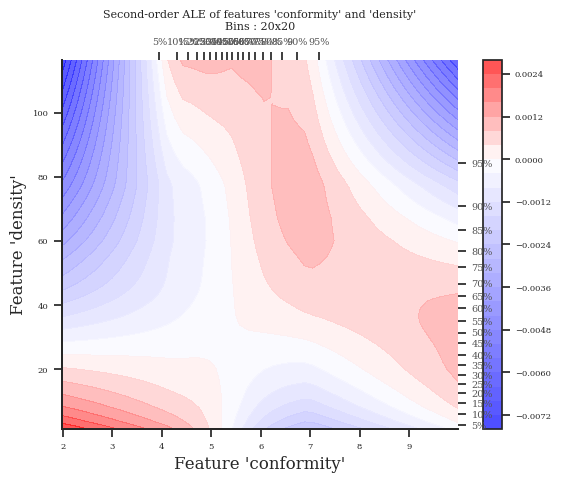

In [10]:
_, ale, quantiles_list = compute_ale(dataset23, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['conformity','density'])

### edu

2024-06-07 11:38:33.868 | DEBUG    | ale:_second_order_ale_quant:599 - Quantiles: (array([ 0.       ,  3.3880355,  3.8224385,  4.091097 ,  4.292712 ,
        4.460237 ,  4.606604 ,  4.740575 ,  4.8667054,  4.9889126,
        5.1110463,  5.235193 ,  5.364766 ,  5.503195 ,  5.6554723,
        5.82821  ,  6.030904 ,  6.2818513,  6.600759 ,  7.092353 ,
       13.979414 ], dtype=float32), array([0.        , 0.01157129, 0.0200155 , 0.0284163 , 0.03823493,
       0.04898882, 0.06131082, 0.07670615, 0.0959392 , 0.11569863,
       0.13588814, 0.15555061, 0.1758325 , 0.19799055, 0.22075981,
       0.24388704, 0.27000245, 0.3010375 , 0.33594495, 0.3903735 ,
       0.6624904 ], dtype=float32)).


(array([ 0.       ,  3.3880355,  3.8224385,  4.091097 ,  4.292712 ,
        4.460237 ,  4.606604 ,  4.740575 ,  4.8667054,  4.9889126,
        5.1110463,  5.235193 ,  5.364766 ,  5.503195 ,  5.6554723,
        5.82821  ,  6.030904 ,  6.2818513,  6.600759 ,  7.092353 ,
       13.979414 ], dtype=float32), array([0.        , 0.01157129, 0.0200155 , 0.0284163 , 0.03823493,
       0.04898882, 0.06131082, 0.07670615, 0.0959392 , 0.11569863,
       0.13588814, 0.15555061, 0.1758325 , 0.19799055, 0.22075981,
       0.24388704, 0.27000245, 0.3010375 , 0.33594495, 0.3903735 ,
       0.6624904 ], dtype=float32))
(20, 20)
results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.79it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 38.38it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.48it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.65it/s]
2024-06-07 11:39:42.557 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3880355  3.8224385  4.091097   4.292712   4.460237
  4.606604   4.740575   4.8667054  4.9889126  5.1110463  5.235193
  5.364766   5.503195   5.6554723  5.82821    6.030904   6.2818513
  6.600759   7.092353  13.979414 ].
2024-06-07 11:39:42.589 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.         0.01157129 0.0200155  0.0284163  0.03823493 0.04898882
 0.06131082 0.07670615 0.0959392  0.11569863 0.13588814 0.15555061
 0.1758325  0.19799055 0.22075981 0.24388704 0.27000245 0.3010375
 0.33594495 0.3903735  0.6624904 ].


plotting contour...


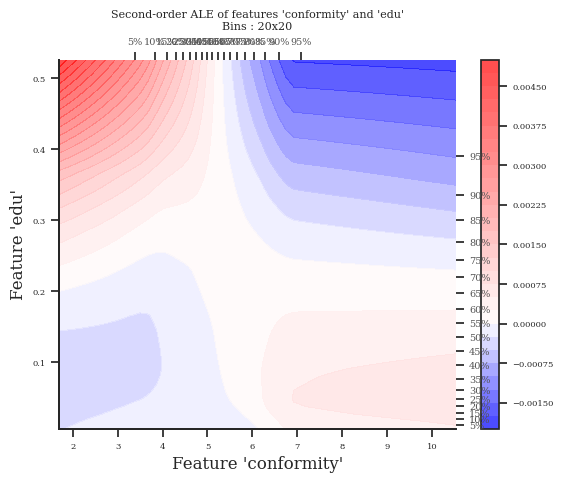

In [11]:
_, ale, quantiles_list = compute_ale(dataset19, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['conformity','edu'])

2024-06-07 11:40:19.274 | DEBUG    | ale:_second_order_ale_quant:599 - Quantiles: (array([ 0.       ,  2.7853494,  3.2110758,  3.4931946,  3.7133973,
        3.8975146,  4.0586576,  4.2058334,  4.3440657,  4.477783 ,
        4.608979 ,  4.740272 ,  4.8747015,  5.015912 ,  5.1691995,
        5.340861 ,  5.5437794,  5.790985 ,  6.1156344,  6.599765 ,
       11.140136 ], dtype=float32), array([0.        , 0.01178057, 0.01991909, 0.02835272, 0.03820828,
       0.04965299, 0.06220709, 0.07702399, 0.09681481, 0.11610731,
       0.13625179, 0.15581825, 0.1758325 , 0.19703479, 0.22025   ,
       0.24436933, 0.26907787, 0.30278337, 0.33887282, 0.3929271 ,
       0.6624904 ], dtype=float32)).


(array([ 0.       ,  2.7853494,  3.2110758,  3.4931946,  3.7133973,
        3.8975146,  4.0586576,  4.2058334,  4.3440657,  4.477783 ,
        4.608979 ,  4.740272 ,  4.8747015,  5.015912 ,  5.1691995,
        5.340861 ,  5.5437794,  5.790985 ,  6.1156344,  6.599765 ,
       11.140136 ], dtype=float32), array([0.        , 0.01178057, 0.01991909, 0.02835272, 0.03820828,
       0.04965299, 0.06220709, 0.07702399, 0.09681481, 0.11610731,
       0.13625179, 0.15581825, 0.1758325 , 0.19703479, 0.22025   ,
       0.24436933, 0.26907787, 0.30278337, 0.33887282, 0.3929271 ,
       0.6624904 ], dtype=float32))
(20, 20)
results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.99it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 38.05it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.94it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.67it/s]
2024-06-07 11:41:27.512 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7853494  3.2110758  3.4931946  3.7133973  3.8975146
  4.0586576  4.2058334  4.3440657  4.477783   4.608979   4.740272
  4.8747015  5.015912   5.1691995  5.340861   5.5437794  5.790985
  6.1156344  6.599765  11.140136 ].
2024-06-07 11:41:27.543 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.         0.01178057 0.01991909 0.02835272 0.03820828 0.04965299
 0.06220709 0.07702399 0.09681481 0.11610731 0.13625179 0.15581825
 0.1758325  0.19703479 0.22025    0.24436933 0.26907787 0.30278337
 0.33887282 0.3929271  0.6624904 ].


plotting contour...


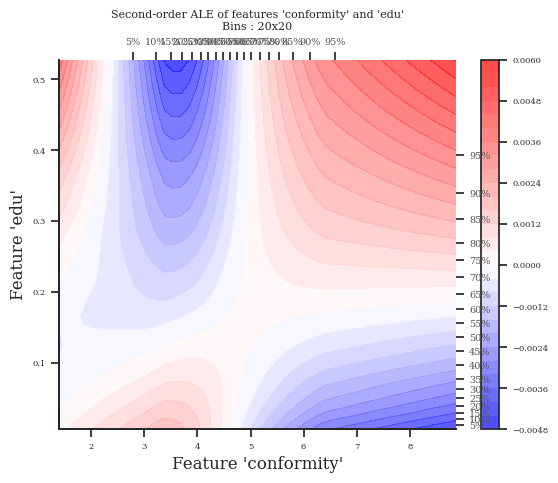

In [12]:
_, ale, quantiles_list = compute_ale(dataset20, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['conformity','edu'])

2024-06-07 11:42:03.132 | DEBUG    | ale:_second_order_ale_quant:599 - Quantiles: (array([ 0.       ,  3.9525921,  4.314716 ,  4.5402045,  4.7117057,
        4.8567724,  4.985449 ,  5.10378  ,  5.215506 ,  5.3239164,
        5.430411 ,  5.5378833,  5.647893 ,  5.764407 ,  5.8928676,
        6.0377083,  6.212822 ,  6.43432  ,  6.727926 ,  7.1804504,
       12.815786 ], dtype=float32), array([0.        , 0.01184099, 0.02034039, 0.02885293, 0.03854504,
       0.04952528, 0.06149057, 0.07655827, 0.09675266, 0.11474662,
       0.13451305, 0.15356033, 0.17315543, 0.19555819, 0.21918261,
       0.24336839, 0.2686759 , 0.30092958, 0.33685184, 0.39194307,
       0.6624904 ], dtype=float32)).


(array([ 0.       ,  3.9525921,  4.314716 ,  4.5402045,  4.7117057,
        4.8567724,  4.985449 ,  5.10378  ,  5.215506 ,  5.3239164,
        5.430411 ,  5.5378833,  5.647893 ,  5.764407 ,  5.8928676,
        6.0377083,  6.212822 ,  6.43432  ,  6.727926 ,  7.1804504,
       12.815786 ], dtype=float32), array([0.        , 0.01184099, 0.02034039, 0.02885293, 0.03854504,
       0.04952528, 0.06149057, 0.07655827, 0.09675266, 0.11474662,
       0.13451305, 0.15356033, 0.17315543, 0.19555819, 0.21918261,
       0.24336839, 0.2686759 , 0.30092958, 0.33685184, 0.39194307,
       0.6624904 ], dtype=float32))
(20, 20)
results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 38.02it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.61it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.76it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 38.13it/s]
2024-06-07 11:43:11.594 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.9525921  4.314716   4.5402045  4.7117057  4.8567724
  4.985449   5.10378    5.215506   5.3239164  5.430411   5.5378833
  5.647893   5.764407   5.8928676  6.0377083  6.212822   6.43432
  6.727926   7.1804504 12.815786 ].
2024-06-07 11:43:11.625 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.         0.01184099 0.02034039 0.02885293 0.03854504 0.04952528
 0.06149057 0.07655827 0.09675266 0.11474662 0.13451305 0.15356033
 0.17315543 0.19555819 0.21918261 0.24336839 0.2686759  0.30092958
 0.33685184 0.39194307 0.6624904 ].


plotting contour...


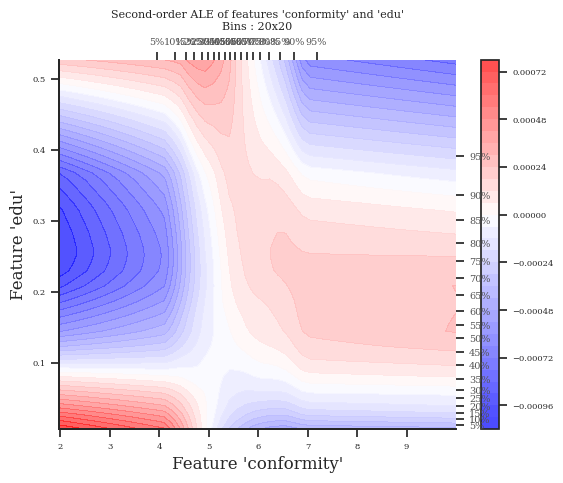

In [13]:
_, ale, quantiles_list = compute_ale(dataset23, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['conformity','edu'])

### married

2024-06-07 12:02:48.059 | DEBUG    | ale:_second_order_ale_quant:599 - Quantiles: (array([ 0.       ,  3.3880355,  3.8224385,  4.091097 ,  4.292712 ,
        4.460237 ,  4.606604 ,  4.740575 ,  4.8667054,  4.9889126,
        5.1110463,  5.235193 ,  5.364766 ,  5.503195 ,  5.6554723,
        5.82821  ,  6.030904 ,  6.2818513,  6.600759 ,  7.092353 ,
       13.979414 ], dtype=float32), array([0.        , 0.20833743, 0.29036626, 0.33479008, 0.36491126,
       0.38739842, 0.4094754 , 0.4279228 , 0.44472572, 0.45901814,
       0.4737844 , 0.48745018, 0.50053436, 0.51213425, 0.5241098 ,
       0.5371819 , 0.5505056 , 0.56277114, 0.5798699 , 0.60397315,
       0.7458918 ], dtype=float32)).


(array([ 0.       ,  3.3880355,  3.8224385,  4.091097 ,  4.292712 ,
        4.460237 ,  4.606604 ,  4.740575 ,  4.8667054,  4.9889126,
        5.1110463,  5.235193 ,  5.364766 ,  5.503195 ,  5.6554723,
        5.82821  ,  6.030904 ,  6.2818513,  6.600759 ,  7.092353 ,
       13.979414 ], dtype=float32), array([0.        , 0.20833743, 0.29036626, 0.33479008, 0.36491126,
       0.38739842, 0.4094754 , 0.4279228 , 0.44472572, 0.45901814,
       0.4737844 , 0.48745018, 0.50053436, 0.51213425, 0.5241098 ,
       0.5371819 , 0.5505056 , 0.56277114, 0.5798699 , 0.60397315,
       0.7458918 ], dtype=float32))
(20, 20)
results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.42it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.23it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.30it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.90it/s]
2024-06-07 12:03:57.266 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3880355  3.8224385  4.091097   4.292712   4.460237
  4.606604   4.740575   4.8667054  4.9889126  5.1110463  5.235193
  5.364766   5.503195   5.6554723  5.82821    6.030904   6.2818513
  6.600759   7.092353  13.979414 ].
2024-06-07 12:03:57.301 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.         0.20833743 0.29036626 0.33479008 0.36491126 0.38739842
 0.4094754  0.4279228  0.44472572 0.45901814 0.4737844  0.48745018
 0.50053436 0.51213425 0.5241098  0.5371819  0.5505056  0.56277114
 0.5798699  0.60397315 0.7458918 ].


plotting contour...


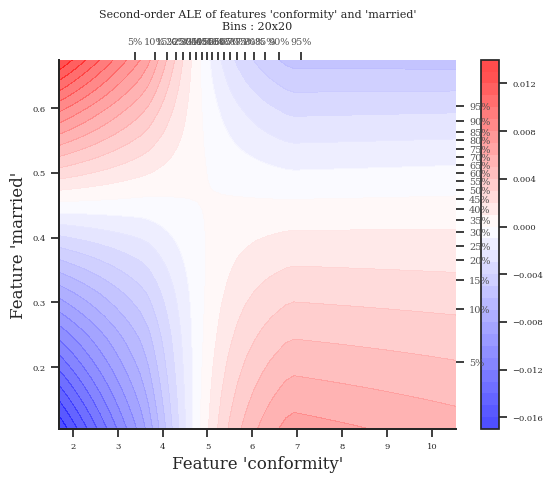

In [14]:
_, ale, quantiles_list = compute_ale(dataset19, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['conformity','married'])

2024-06-07 12:04:34.113 | DEBUG    | ale:_second_order_ale_quant:599 - Quantiles: (array([ 0.       ,  2.7853494,  3.2110758,  3.4931946,  3.7133973,
        3.8975146,  4.0586576,  4.2058334,  4.3440657,  4.477783 ,
        4.608979 ,  4.740272 ,  4.8747015,  5.015912 ,  5.1691995,
        5.340861 ,  5.5437794,  5.790985 ,  6.1156344,  6.599765 ,
       11.140136 ], dtype=float32), array([0.        , 0.20456043, 0.2840091 , 0.3322126 , 0.36302927,
       0.386586  , 0.40963018, 0.4279228 , 0.44447058, 0.45839018,
       0.47310552, 0.48625875, 0.4995083 , 0.51127154, 0.52279484,
       0.5370247 , 0.5496398 , 0.5624817 , 0.57846034, 0.6021064 ,
       0.77222145], dtype=float32)).


(array([ 0.       ,  2.7853494,  3.2110758,  3.4931946,  3.7133973,
        3.8975146,  4.0586576,  4.2058334,  4.3440657,  4.477783 ,
        4.608979 ,  4.740272 ,  4.8747015,  5.015912 ,  5.1691995,
        5.340861 ,  5.5437794,  5.790985 ,  6.1156344,  6.599765 ,
       11.140136 ], dtype=float32), array([0.        , 0.20456043, 0.2840091 , 0.3322126 , 0.36302927,
       0.386586  , 0.40963018, 0.4279228 , 0.44447058, 0.45839018,
       0.47310552, 0.48625875, 0.4995083 , 0.51127154, 0.52279484,
       0.5370247 , 0.5496398 , 0.5624817 , 0.57846034, 0.6021064 ,
       0.77222145], dtype=float32))
(20, 20)
results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 38.31it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 36.96it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 38.28it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.96it/s]
2024-06-07 12:05:42.474 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7853494  3.2110758  3.4931946  3.7133973  3.8975146
  4.0586576  4.2058334  4.3440657  4.477783   4.608979   4.740272
  4.8747015  5.015912   5.1691995  5.340861   5.5437794  5.790985
  6.1156344  6.599765  11.140136 ].
2024-06-07 12:05:42.506 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.         0.20456043 0.2840091  0.3322126  0.36302927 0.386586
 0.40963018 0.4279228  0.44447058 0.45839018 0.47310552 0.48625875
 0.4995083  0.51127154 0.52279484 0.5370247  0.5496398  0.5624817
 0.57846034 0.6021064  0.77222145].


plotting contour...


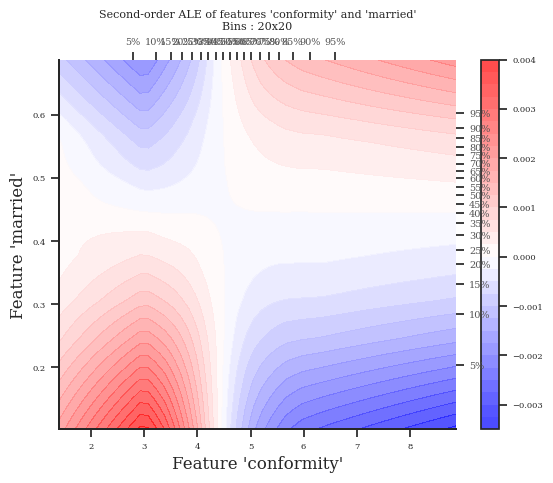

In [15]:
_, ale, quantiles_list = compute_ale(dataset20, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['conformity','married'])

2024-06-07 12:06:18.260 | DEBUG    | ale:_second_order_ale_quant:599 - Quantiles: (array([ 0.       ,  3.9525921,  4.314716 ,  4.5402045,  4.7117057,
        4.8567724,  4.985449 ,  5.10378  ,  5.215506 ,  5.3239164,
        5.430411 ,  5.5378833,  5.647893 ,  5.764407 ,  5.8928676,
        6.0377083,  6.212822 ,  6.43432  ,  6.727926 ,  7.1804504,
       12.815786 ], dtype=float32), array([0.        , 0.2037723 , 0.2841826 , 0.33229178, 0.36300504,
       0.3853932 , 0.40766266, 0.4260458 , 0.4433062 , 0.45747524,
       0.47310552, 0.48625875, 0.4997362 , 0.51132846, 0.5227347 ,
       0.5355987 , 0.5484523 , 0.5621739 , 0.5789789 , 0.60269594,
       0.77222145], dtype=float32)).


(array([ 0.       ,  3.9525921,  4.314716 ,  4.5402045,  4.7117057,
        4.8567724,  4.985449 ,  5.10378  ,  5.215506 ,  5.3239164,
        5.430411 ,  5.5378833,  5.647893 ,  5.764407 ,  5.8928676,
        6.0377083,  6.212822 ,  6.43432  ,  6.727926 ,  7.1804504,
       12.815786 ], dtype=float32), array([0.        , 0.2037723 , 0.2841826 , 0.33229178, 0.36300504,
       0.3853932 , 0.40766266, 0.4260458 , 0.4433062 , 0.45747524,
       0.47310552, 0.48625875, 0.4997362 , 0.51132846, 0.5227347 ,
       0.5355987 , 0.5484523 , 0.5621739 , 0.5789789 , 0.60269594,
       0.77222145], dtype=float32))
(20, 20)
results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.91it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 38.18it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.90it/s]


results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_optimal_v2_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_200_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 500it [00:13, 37.80it/s]
2024-06-07 12:07:26.386 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.9525921  4.314716   4.5402045  4.7117057  4.8567724
  4.985449   5.10378    5.215506   5.3239164  5.430411   5.5378833
  5.647893   5.764407   5.8928676  6.0377083  6.212822   6.43432
  6.727926   7.1804504 12.815786 ].
2024-06-07 12:07:26.418 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [0.         0.2037723  0.2841826  0.33229178 0.36300504 0.3853932
 0.40766266 0.4260458  0.4433062  0.45747524 0.47310552 0.48625875
 0.4997362  0.51132846 0.5227347  0.5355987  0.5484523  0.5621739
 0.5789789  0.60269594 0.77222145].


plotting contour...


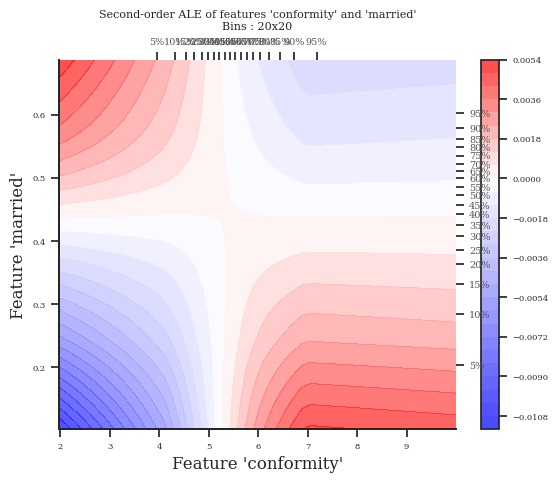

In [16]:
_, ale, quantiles_list = compute_ale(dataset23, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features=['conformity','married'])

## 稳健性分析

In [3]:
data_filename = "../data/sample_3w2_time_random.h5"
exp_name = "base_model_time"

In [4]:
dataset = load_data(data_filename)

for key in dataset.keys():
    print(key)
    print(dataset[key].shape)
    print(dataset[key].dtype)
    
column_2019 = 12  # index of year 2019 indicator
column_2020 = 13  # index of year 2020 indicator
column_2023 = 14  # index of year 2023 indicator

#dataset19 = obtain_dataset(dataset, column_2019)['treatments'][:,:,0]
#dataset20 = obtain_dataset(dataset, column_2020)['treatments'][:,:,0]
#dataset23 = obtain_dataset(dataset, column_2023)['treatments'][:,:,0]

dataset19 = obtain_dataset(dataset, column_2019)
dataset20 = obtain_dataset(dataset, column_2020)
dataset23 = obtain_dataset(dataset, column_2023)

covariates
(96000, 161, 23)
float32
outcomes
(96000, 161, 1)
float32
sequence_length
(96000,)
int64
treatments
(96000, 161, 1)
float32


the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
2024-07-11 11:03:05.741 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3692415  3.8023205  4.074511   4.27803    4.4482226
  4.596519   4.7328854  4.861221   4.983607   5.1065702  5.2308154
  5.357687   5.492141   5.6418858  5.814782   6.0233297  6.275996
  6.5926366  7.0893846 13.543782 ].


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 0it [00:00, ?it/s]2024-07-11 11:03:07.059010: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
Predicting rnn_propensity_weighted: 47it [00:01, 25.23it/s]


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 47it [00:01, 27.29it/s]
2024-07-11 11:03:11.764 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3692415  3.8023205  4.074511   4.27803    4.4482226
  4.596519   4.7328854  4.861221   4.983607   5.1065702  5.2308154
  5.357687   5.492141   5.6418858  5.814782   6.0233297  6.275996
  6.5926366  7.0893846 13.543782 ].


[ 1.6846207  3.585781   3.9384158  4.1762705  4.3631263  4.522371
  4.6647024  4.7970533  4.922414   5.045089   5.1686926  5.2942514
  5.424914   5.5670133  5.728334   5.919056   6.149663   6.4343166
  6.8410106 10.316584 ]


2024-07-11 11:03:14.878 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.7646458  3.1975248  3.4774544  3.6993346  3.8861442
  4.056347   4.208336   4.350306   4.484405   4.616972   4.749194
  4.8831463  5.0193458  5.170745   5.33819    5.5333896  5.7793345
  6.102693   6.5996947 11.1947975].


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 47it [00:01, 27.62it/s]


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 47it [00:01, 27.57it/s]
2024-07-11 11:03:20.736 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7646458  3.1975248  3.4774544  3.6993346  3.8861442
  4.056347   4.208336   4.350306   4.484405   4.616972   4.749194
  4.8831463  5.0193458  5.170745   5.33819    5.5333896  5.7793345
  6.102693   6.5996947 11.1947975].


[1.3823229 2.9810853 3.3374896 3.5883946 3.7927394 3.9712455 4.1323414
 4.2793207 4.4173555 4.5506887 4.683083  4.81617   4.9512463 5.095045
 5.2544675 5.43579   5.656362  5.941014  6.351194  8.897246 ]


2024-07-11 11:03:23.898 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.21056476  3.9388196   4.306707    4.540763    4.7125463   4.8579135
  4.98803     5.104739    5.215887    5.323811    5.4307585   5.54207
  5.653487    5.7698226   5.891802    6.0346837   6.2120595   6.4298925
  6.732388    7.18562    11.509229  ].


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 47it [00:01, 27.42it/s]


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 47it [00:01, 27.49it/s]
2024-07-11 11:03:29.910 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.21056476  3.9388196   4.306707    4.540763    4.7125463   4.8579135
  4.98803     5.104739    5.215887    5.323811    5.4307585   5.54207
  5.653487    5.7698226   5.891802    6.0346837   6.2120595   6.4298925
  6.732388    7.18562    11.509229  ].


[2.0746922 4.122763  4.4237347 4.6266546 4.7852297 4.9229717 5.046385
 5.160313  5.269849  5.377285  5.486414  5.5977783 5.7116547 5.8308125
 5.9632425 6.1233716 6.3209763 6.5811405 6.959004  9.3474245]


2024-07-11 11:03:33.122 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.3712916  3.8083072  4.0798035  4.281722   4.4482303
  4.593831   4.7275634  4.8552594  4.979288   5.1026716  5.2242956
  5.350347   5.48671    5.6427417  5.8142724  6.023572   6.2817254
  6.603646   7.0815406 13.659454 ].


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 47it [00:01, 26.77it/s]


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 47it [00:01, 26.42it/s]
2024-07-11 11:03:39.529 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.3712916  3.8083072  4.0798035  4.281722   4.4482303
  4.593831   4.7275634  4.8552594  4.979288   5.1026716  5.2242956
  5.350347   5.48671    5.6427417  5.8142724  6.023572   6.2817254
  6.603646   7.0815406 13.659454 ].


[ 1.6856458  3.5897994  3.9440553  4.180763   4.364976   4.5210304
  4.660697   4.7914114  4.9172735  5.04098    5.1634836  5.287321
  5.4185286  5.564726   5.728507   5.9189224  6.152649   6.4426856
  6.842593  10.370498 ]


2024-07-11 11:03:43.088 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         2.7795503  3.2142465  3.504493   3.7253828  3.9083476
  4.0701914  4.2161     4.3533053  4.485965   4.6170363  4.7467995
  4.8800645  5.021792   5.1720505  5.347754   5.5507903  5.8056927
  6.132779   6.6142664 10.599406 ].


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 47it [00:01, 23.81it/s]


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 47it [00:01, 27.58it/s]
2024-07-11 11:03:49.228 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         2.7795503  3.2142465  3.504493   3.7253828  3.9083476
  4.0701914  4.2161     4.3533053  4.485965   4.6170363  4.7467995
  4.8800645  5.021792   5.1720505  5.347754   5.5507903  5.8056927
  6.132779   6.6142664 10.599406 ].


[1.3897752 2.9968984 3.3593698 3.6149378 3.8168652 3.9892695 4.1431456
 4.284703  4.419635  4.5515003 4.681918  4.8134317 4.950928  5.096921
 5.259902  5.449272  5.6782417 5.969236  6.3735228 8.606836 ]


2024-07-11 11:03:52.443 | DEBUG    | ale:_first_order_ale_quant:394 - Quantiles: [ 0.         3.9436107  4.305735   4.531724   4.7021704  4.8457065
  4.972409   5.0882463  5.200099   5.3101974  5.416658   5.523102
  5.6328626  5.75084    5.8755846  6.0160074  6.186642   6.4135346
  6.716129   7.1628833 11.372985 ].


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 47it [00:02, 23.29it/s]


results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted.csv


INFO:Successfully loaded model from results/rmsn_base_model_time_use_confounders_False/rnn_propensity_weighted/rnn_propensity_weighted_0.1_72_100_64_0.01_0.5_60_optimal
Predicting rnn_propensity_weighted: 47it [00:01, 27.35it/s]
2024-07-11 11:03:58.552 | DEBUG    | ale:_ax_quantiles:182 - Quantiles: [ 0.         3.9436107  4.305735   4.531724   4.7021704  4.8457065
  4.972409   5.0882463  5.200099   5.3101974  5.416658   5.523102
  5.6328626  5.75084    5.8755846  6.0160074  6.186642   6.4135346
  6.716129   7.1628833 11.372985 ].


[1.9718053 4.124673  4.41873   4.616947  4.773938  4.9090576 5.030328
 5.1441727 5.255148  5.3634276 5.46988   5.577982  5.6918516 5.8132124
 5.945796  6.101325  6.3000884 6.5648317 6.939506  9.267934 ]


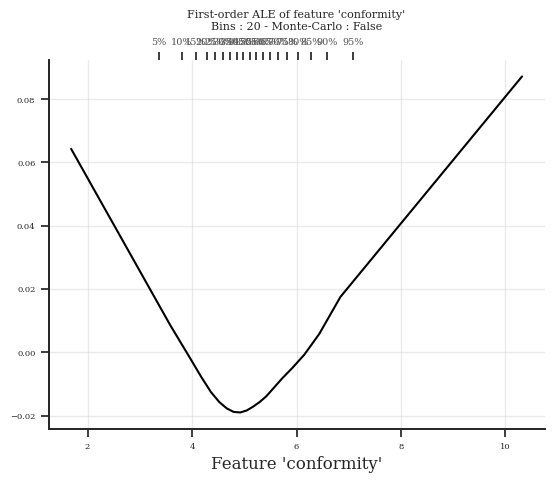

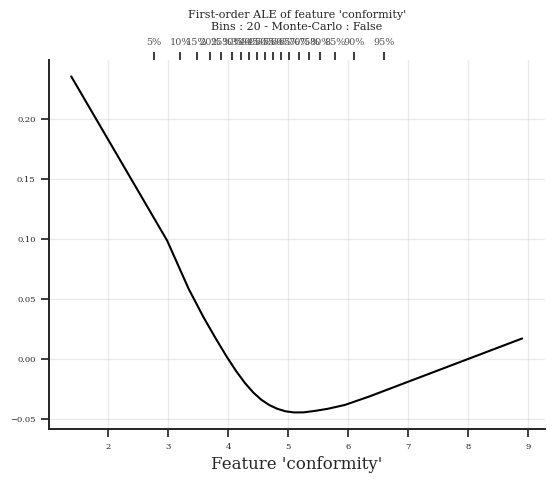

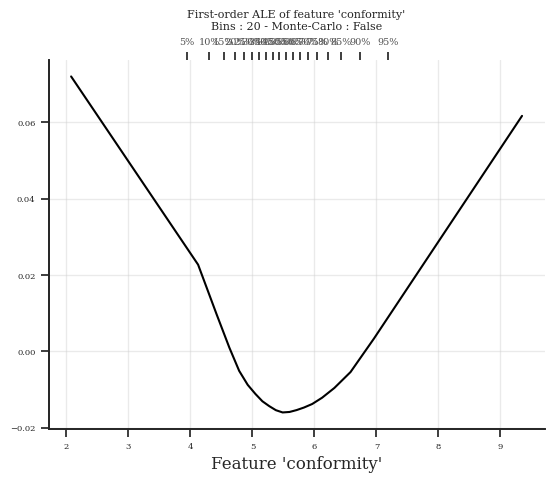

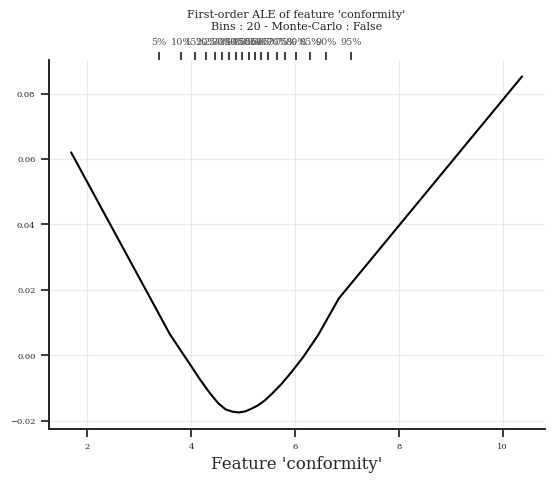

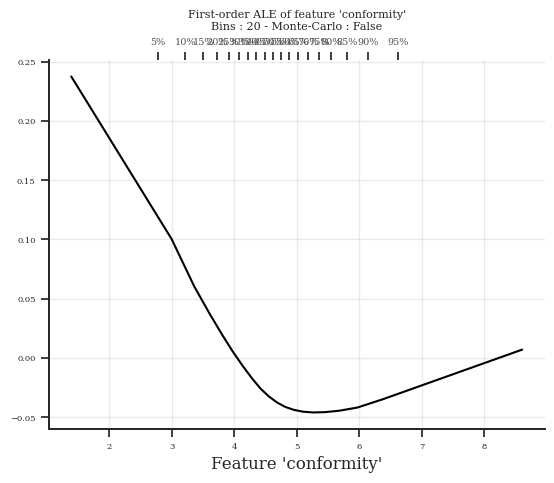

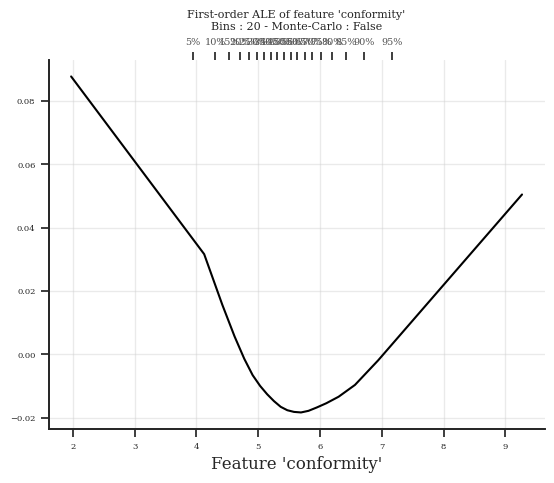

In [5]:
# 计算全局的quantile
bins = 20
quantiles = np.unique(
   np.quantile(
       dataset['treatments'].reshape(-1), np.linspace(0, 1, bins + 1), interpolation="lower"
   )
)
n_bootstrap = 2
ALE_1ST = {
   'RNN_Model_2019': [],
   'RNN_Model_2020': [],
   'RNN_Model_2023': []
   }
for _ in range(n_bootstrap):
    dataset19_sampling = dataset_sampling(dataset19, num_select=3000)
    # dataset19_sampling = dataset19
    _, ale2019, _ = compute_ale(dataset19_sampling, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features='conformity')
    ALE_1ST['RNN_Model_2019'].append(ale2019)
    
    dataset20_sampling = dataset_sampling(dataset20, num_select=3000)
    # dataset20_sampling = dataset20
    _, ale2020, _ = compute_ale(dataset20_sampling, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features='conformity')
    ALE_1ST['RNN_Model_2020'].append(ale2020)

    dataset23_sampling = dataset_sampling(dataset23, num_select=3000)
    # dataset23_sampling = dataset23
    _, ale2023, _ = compute_ale(dataset23_sampling, 'rmsn_' + str(exp_name), b_use_predicted_confounders=False, features='conformity')
    ALE_1ST['RNN_Model_2023'].append(ale2023)

for key in ALE_1ST.keys():
    ALE_1ST[key] = np.array(ALE_1ST[key])

In [6]:
ale_dataset = create_ale_dataset(ALE_1ST, quantiles, dataset['treatments'], ['RNN_Model_2019', 'RNN_Model_2020', 'RNN_Model_2023'], 'conformity')
ale_dataset

<xarray.Dataset>
Dimensions:                          (n_bootstrap: 2, n_bins__conformity: 20,
                                      n_X: 15456000)
Dimensions without coordinates: n_bootstrap, n_bins__conformity, n_X
Data variables:
    conformity__RNN_Model_2019__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__RNN_Model_2020__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__RNN_Model_2023__ale  (n_bootstrap, n_bins__conformity) float64 ...
    conformity__bin_values           (n_bins__conformity) float32 1.588 ... 1...
    conformity                       (n_X) float32 3.837 3.524 ... 5.647 5.774
Attributes:
    estimator_output:  raw
    estimators used:   ['RNN_Model_2019', 'RNN_Model_2020', 'RNN_Model_2023']
    method:            ale
    dimension:         1D
    features used:     ['conformity']

In [7]:
estimator = [('RNN_Model_2019',RandomForestRegressor()),
            ('RNN_Model_2020',RandomForestRegressor()),
            ('RNN_Model_2023',RandomForestRegressor())]

explainer = skexplain.ExplainToolkit(estimator)

### dist+sci750

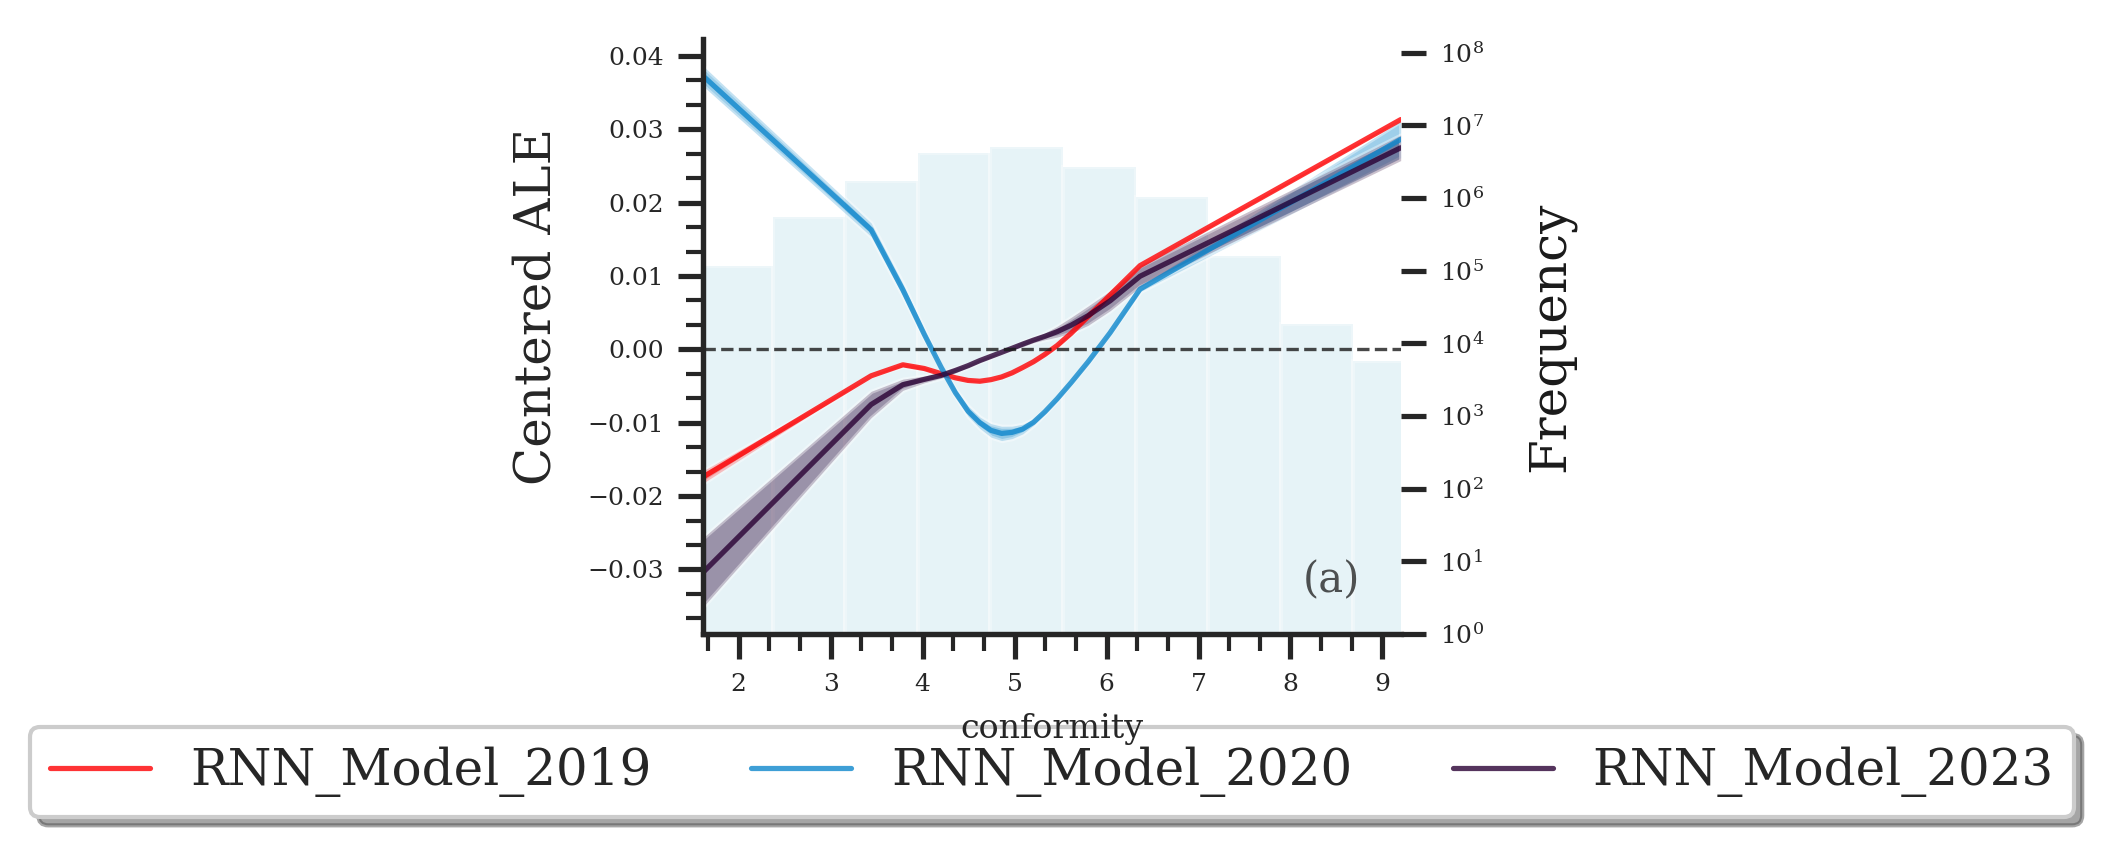

In [13]:
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

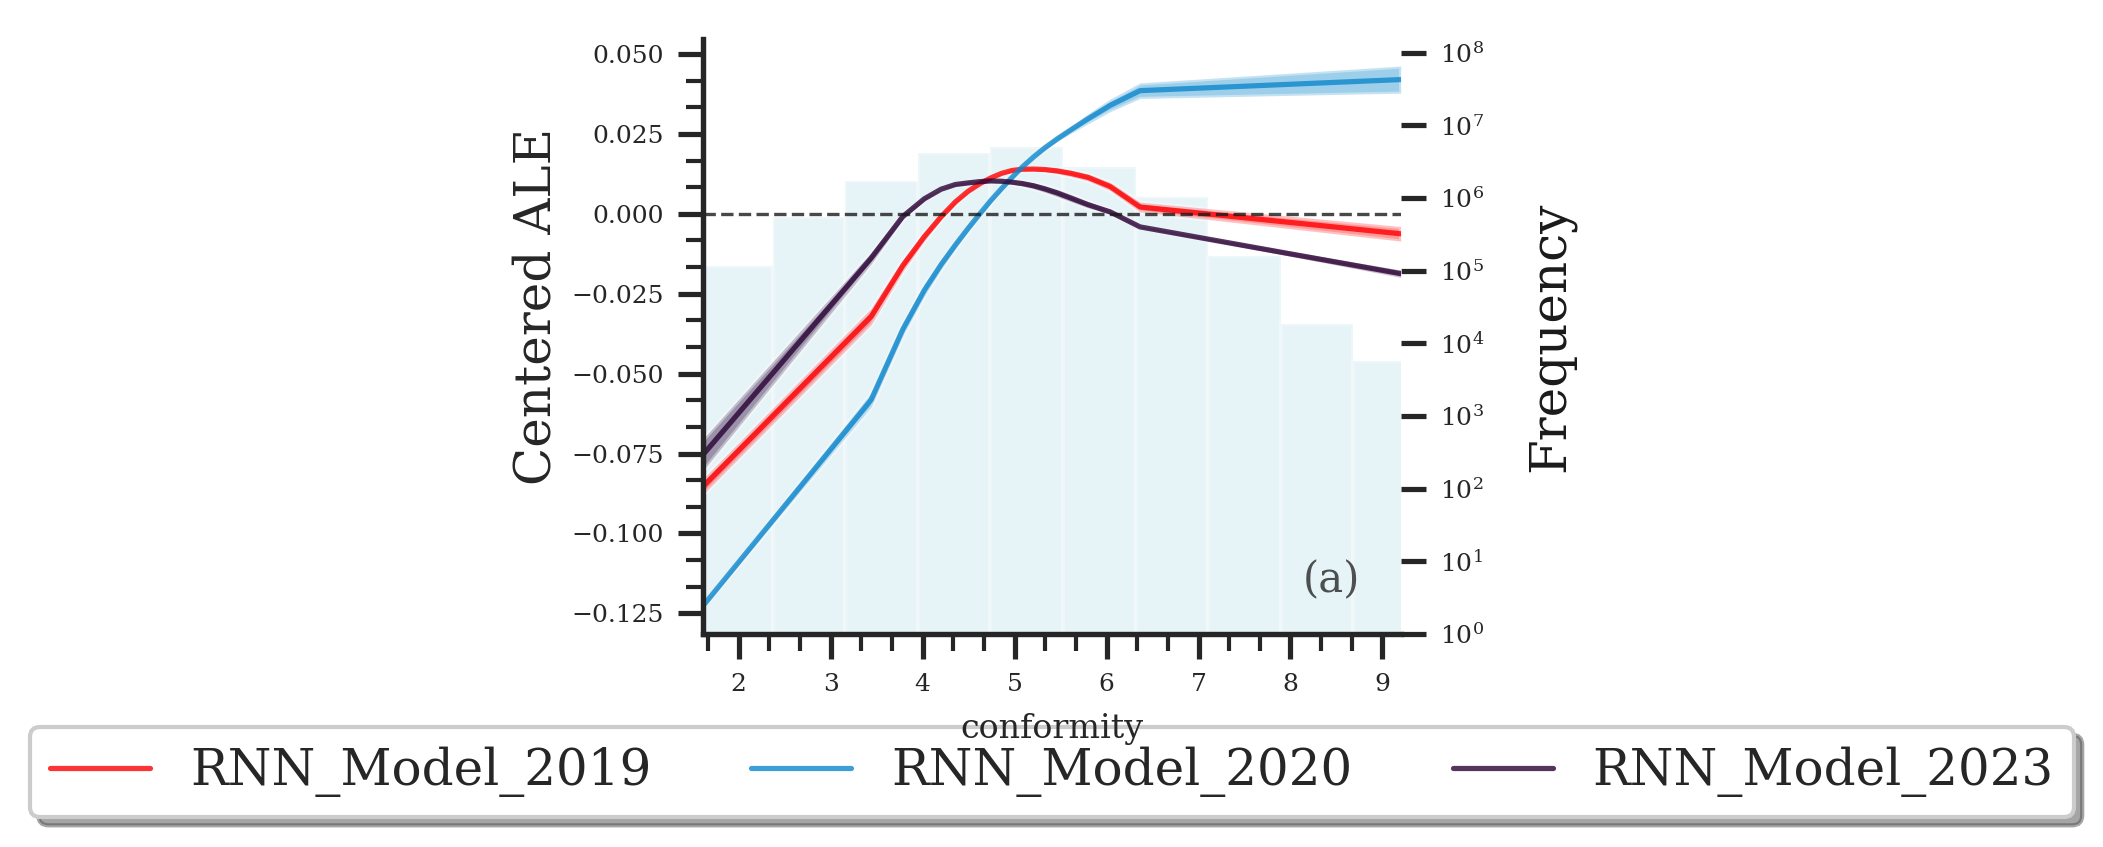

In [28]:
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

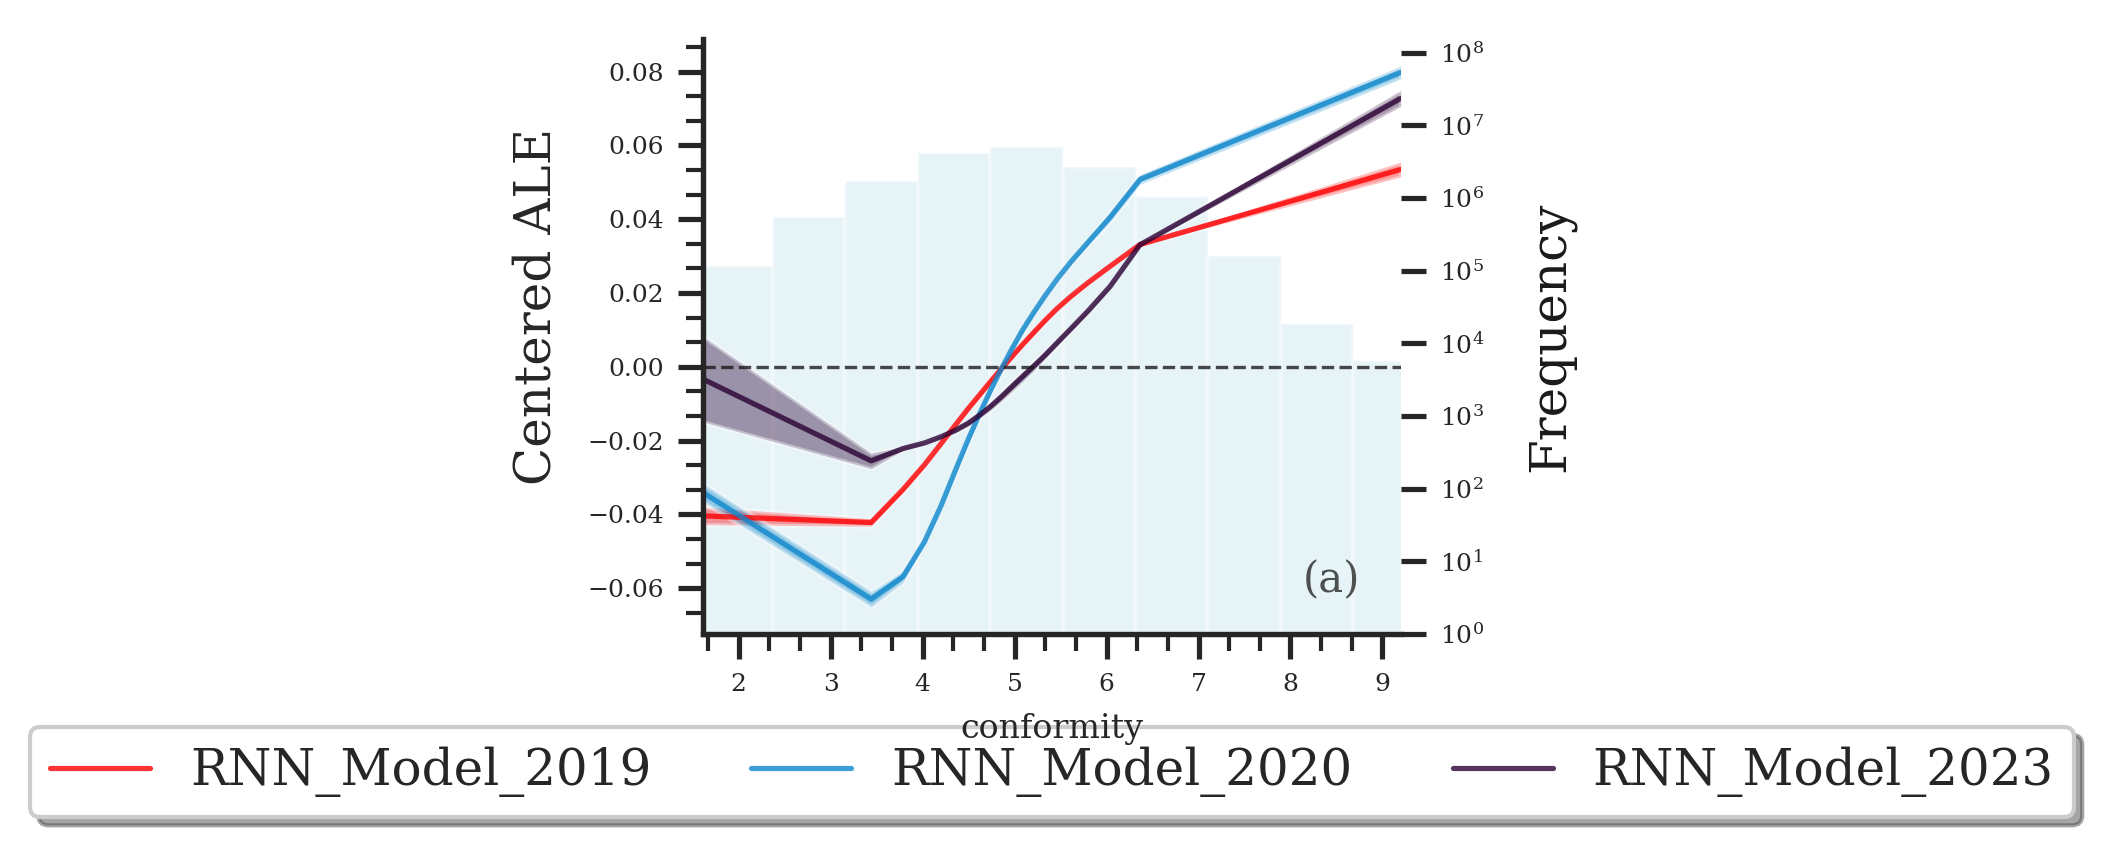

In [9]:
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

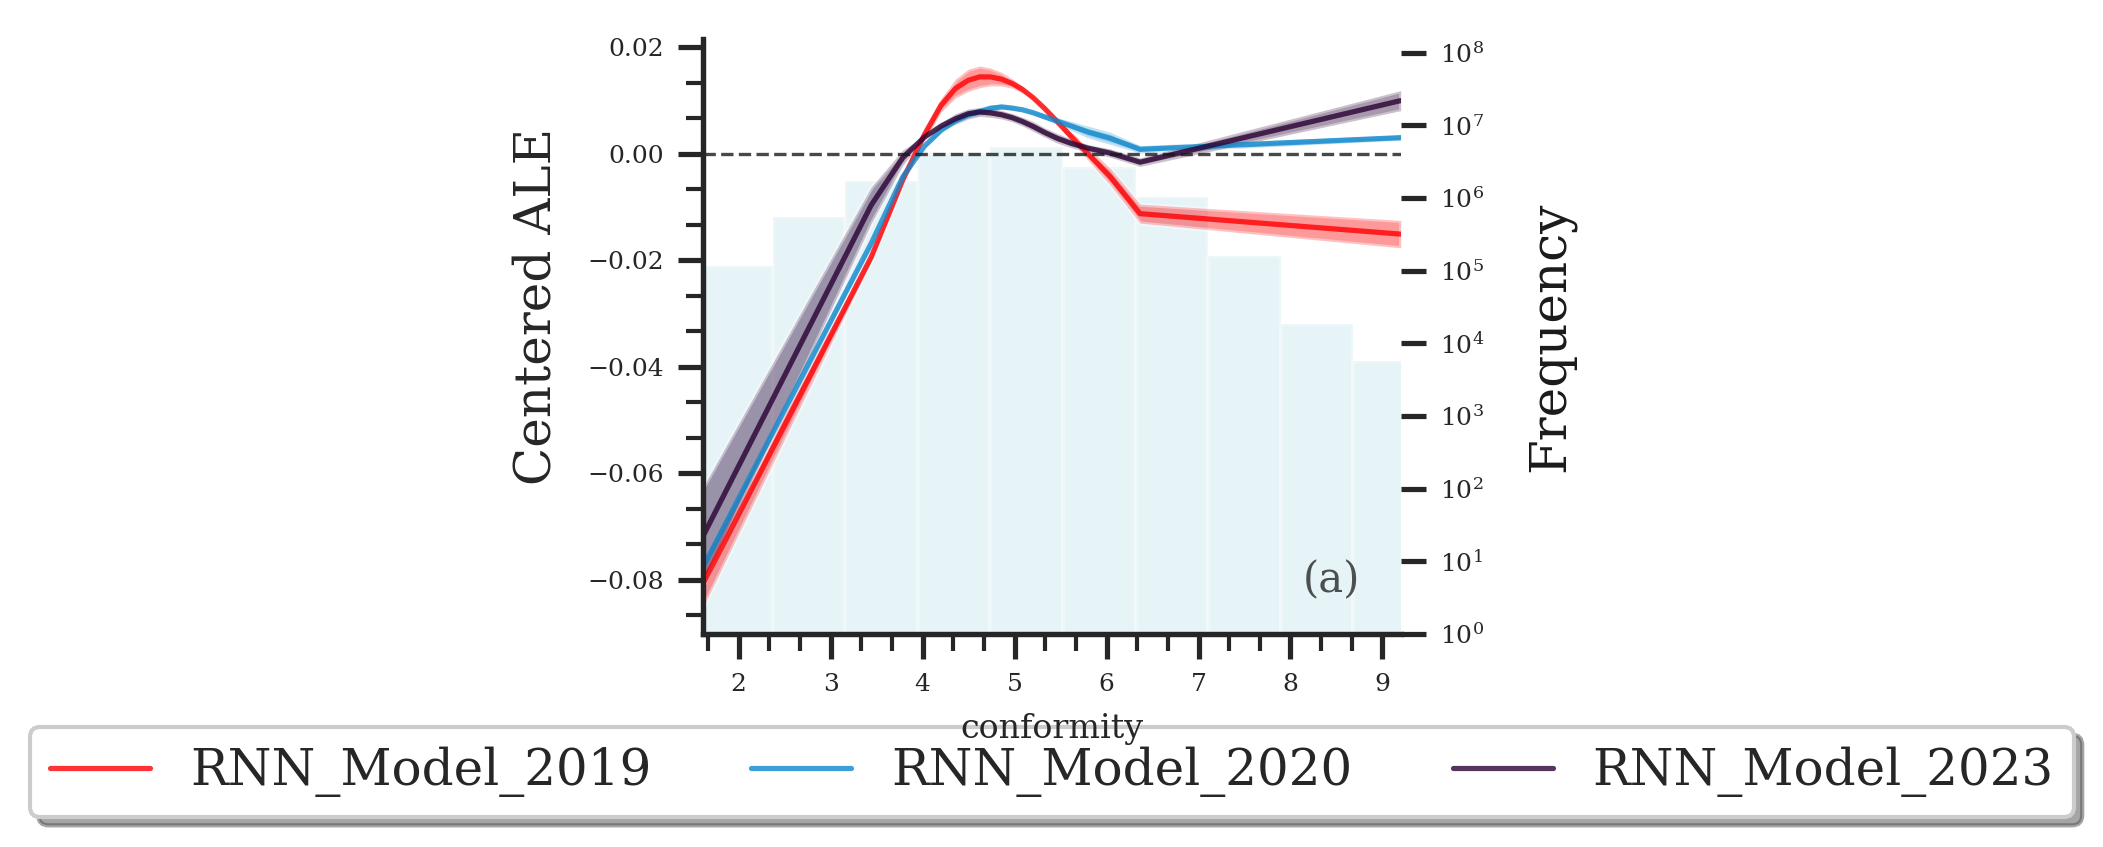

In [20]:
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

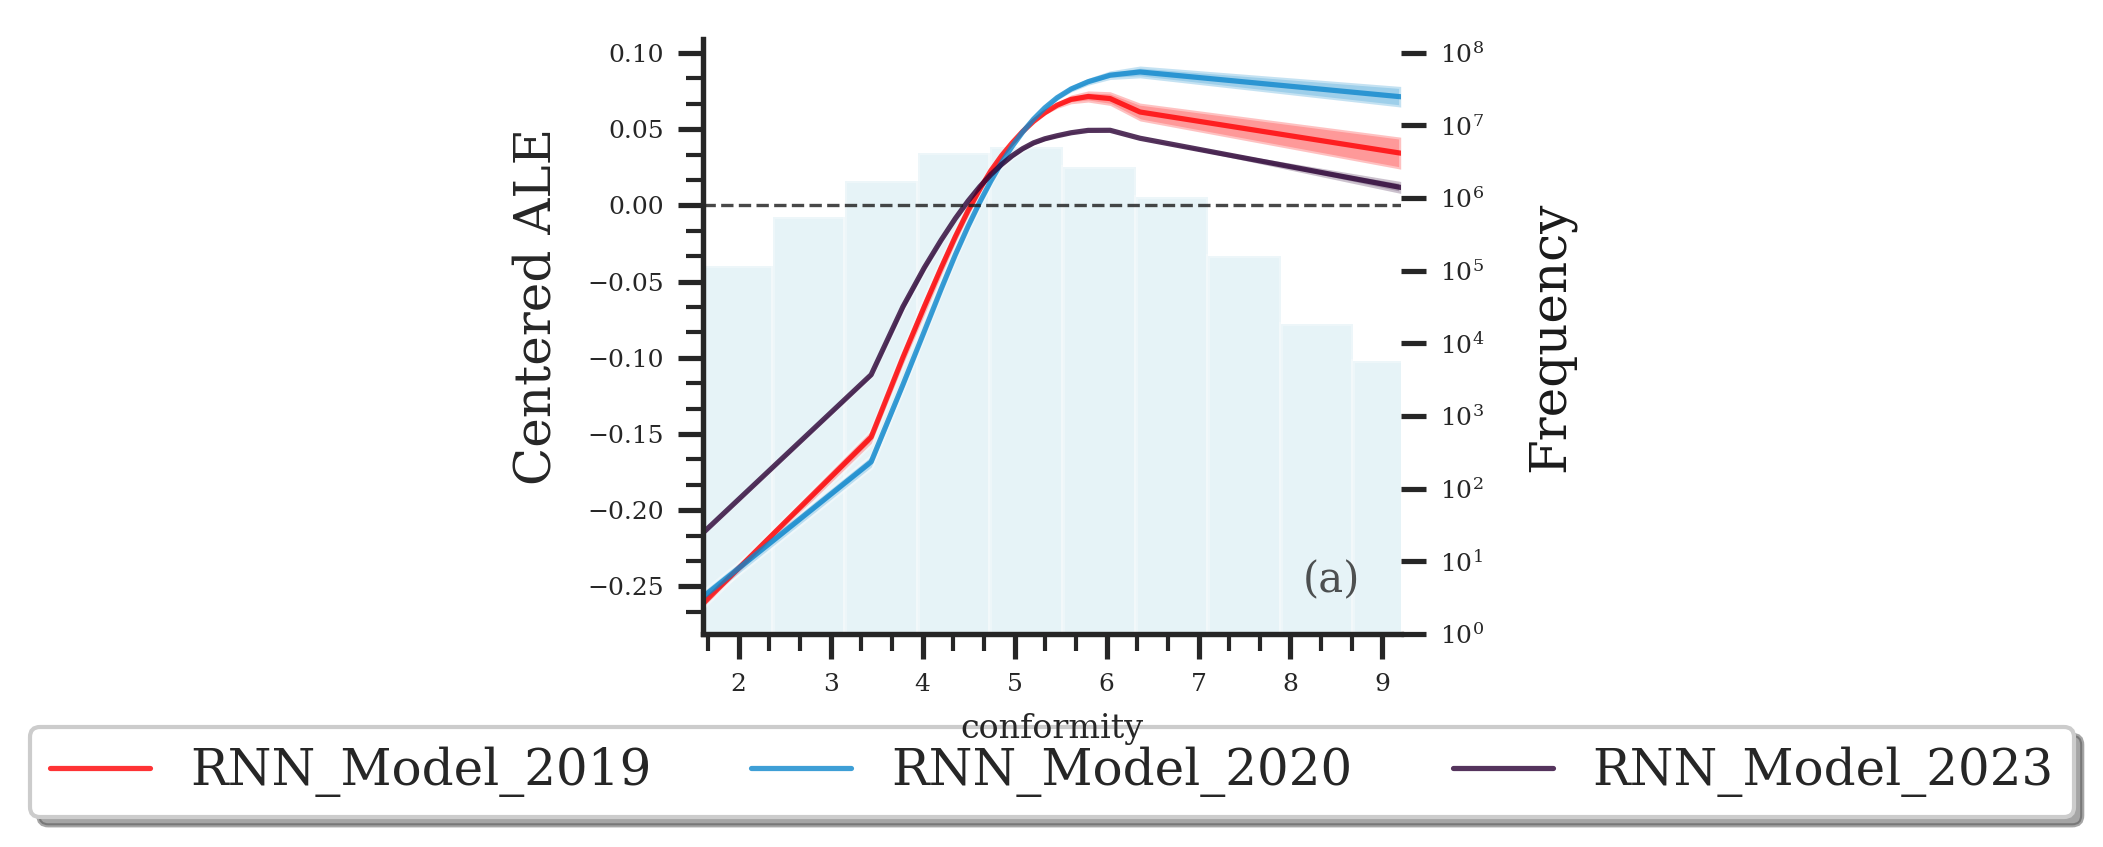

In [9]:
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

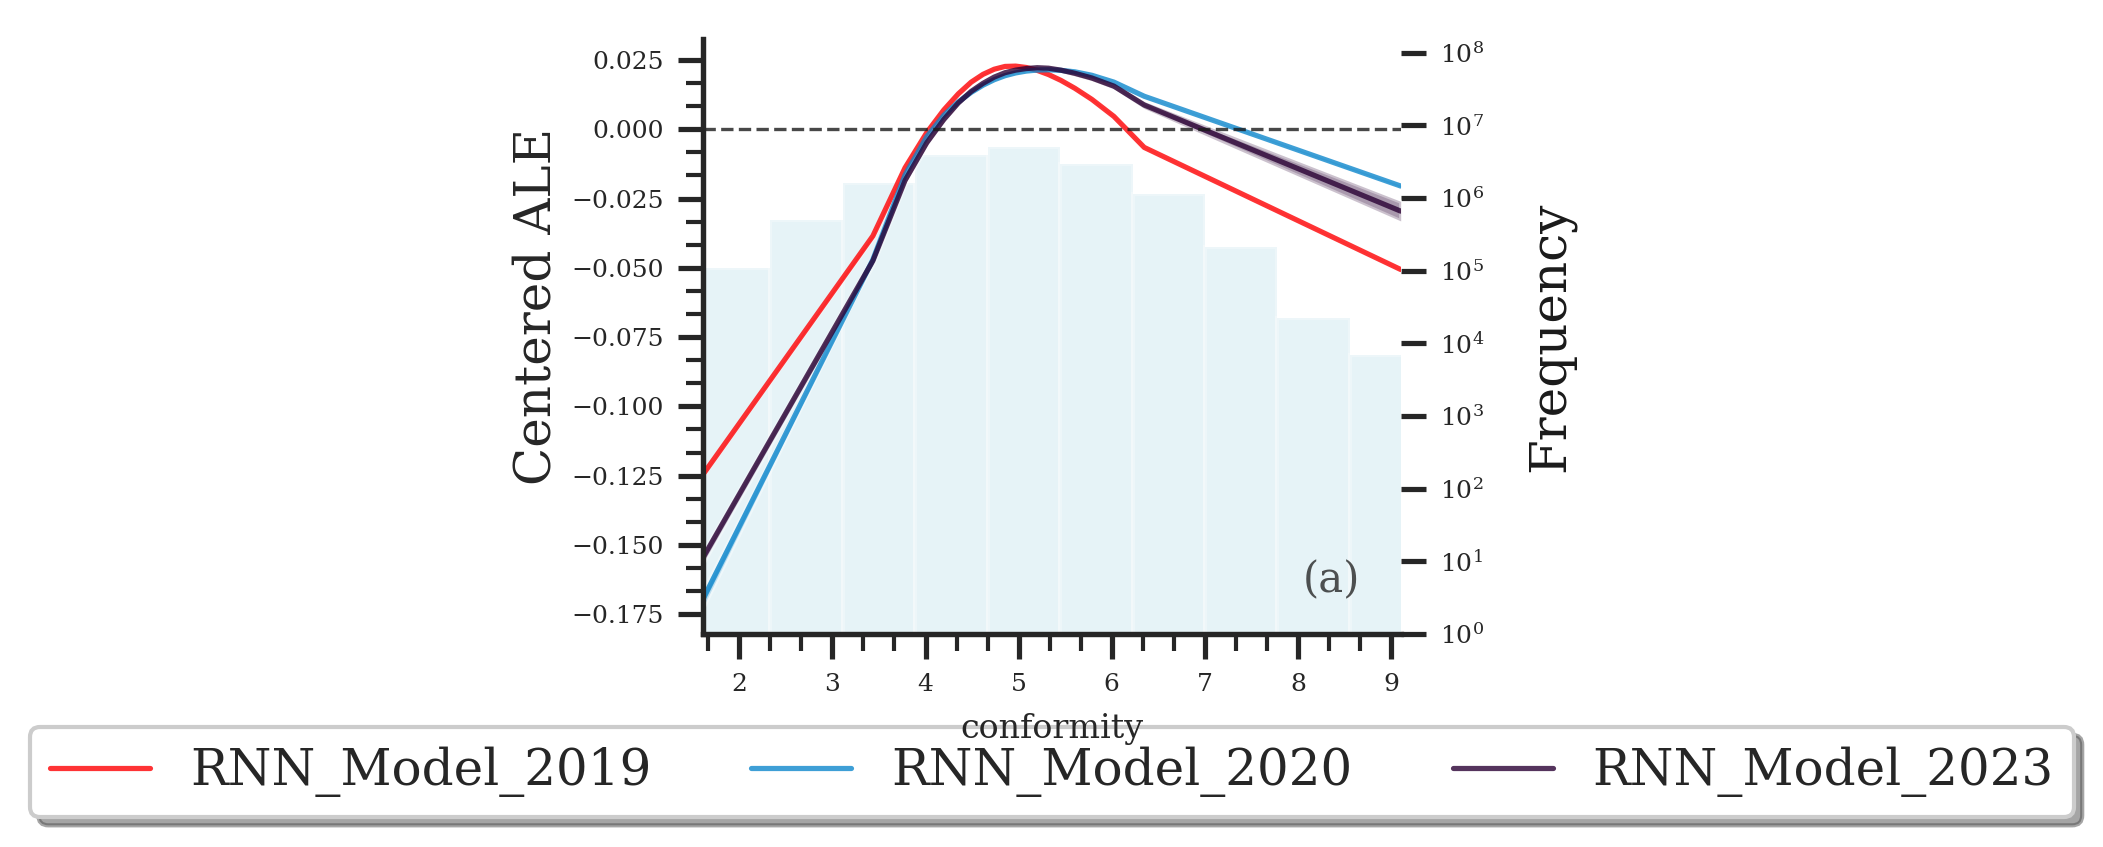

In [8]:
# sampling_v5
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

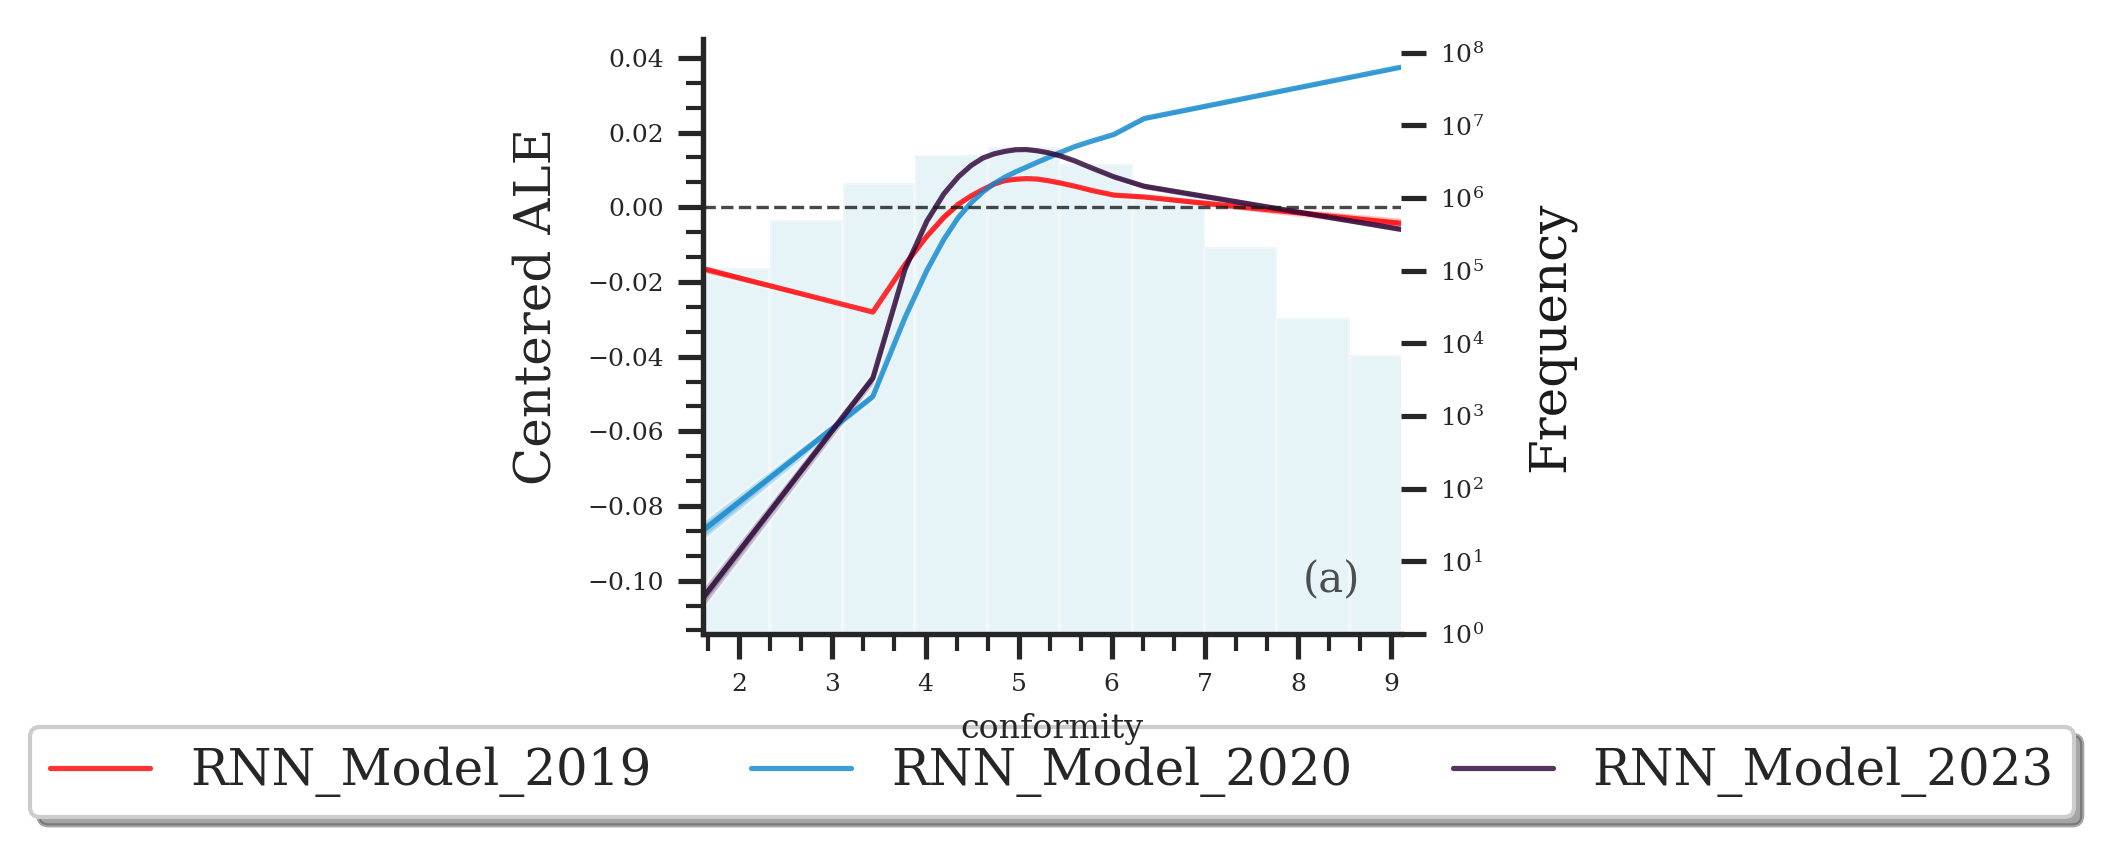

In [8]:
# sampling_v6
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

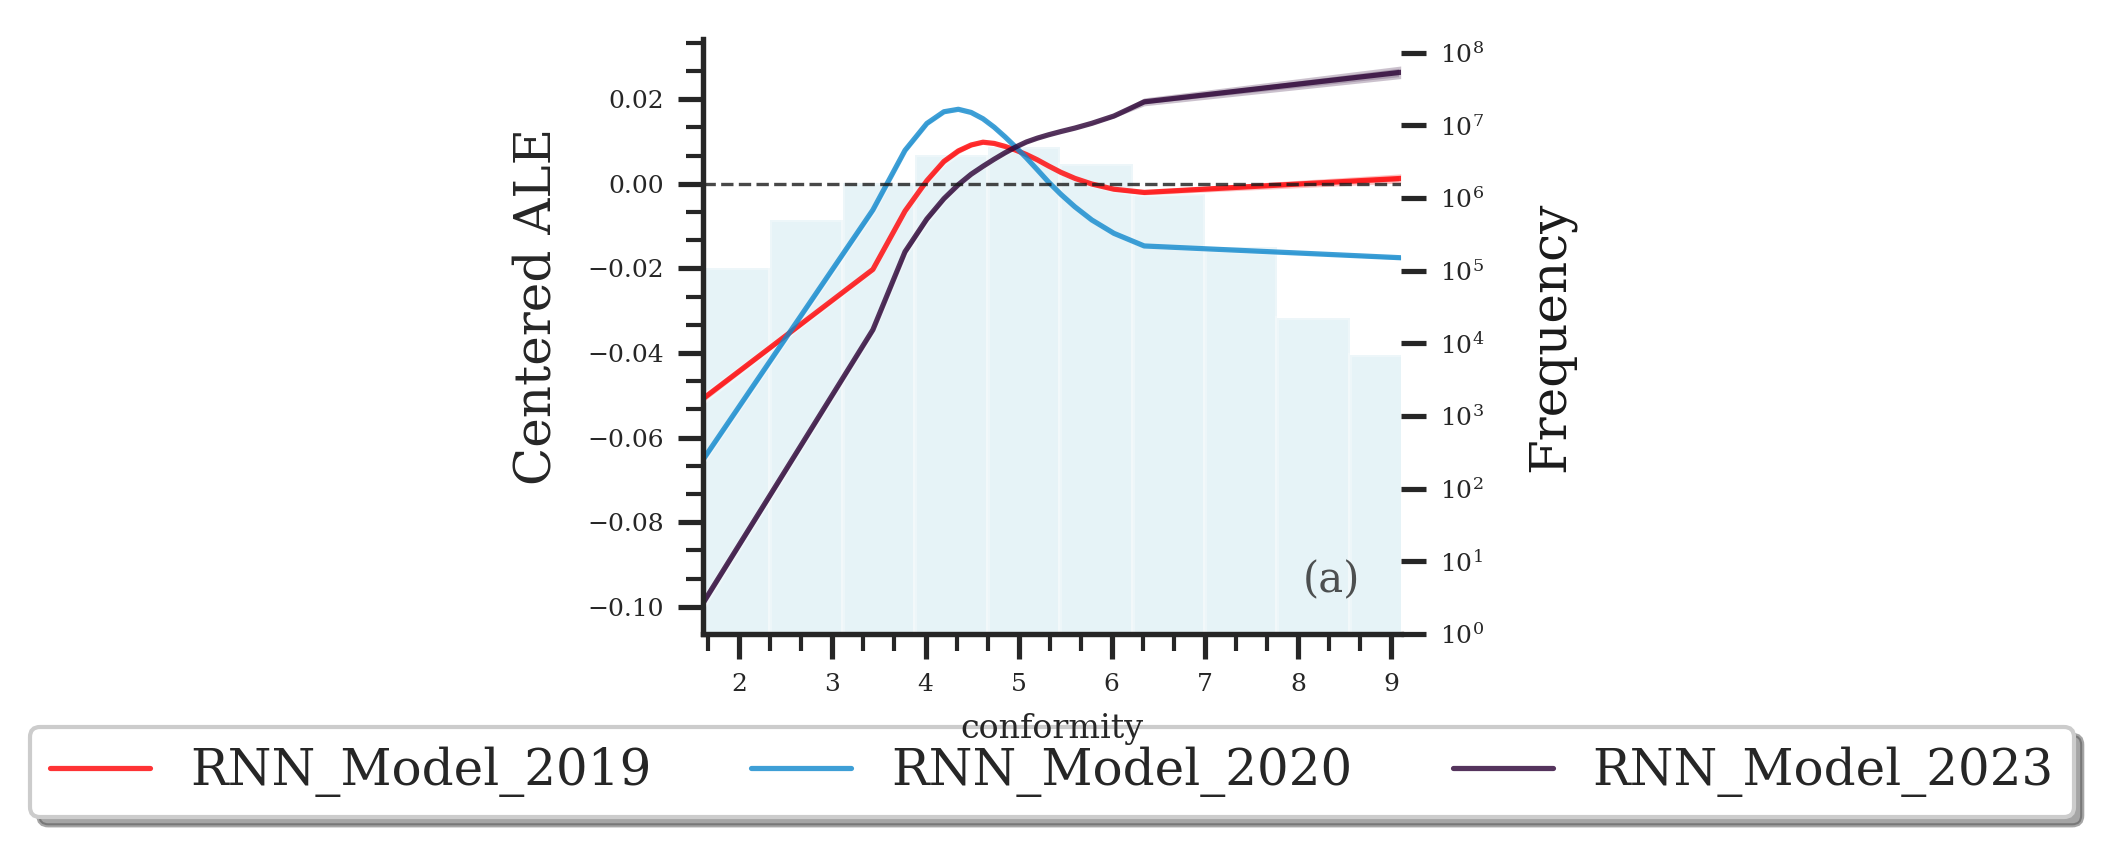

In [8]:
# sampling_v7
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

### radius+sci250

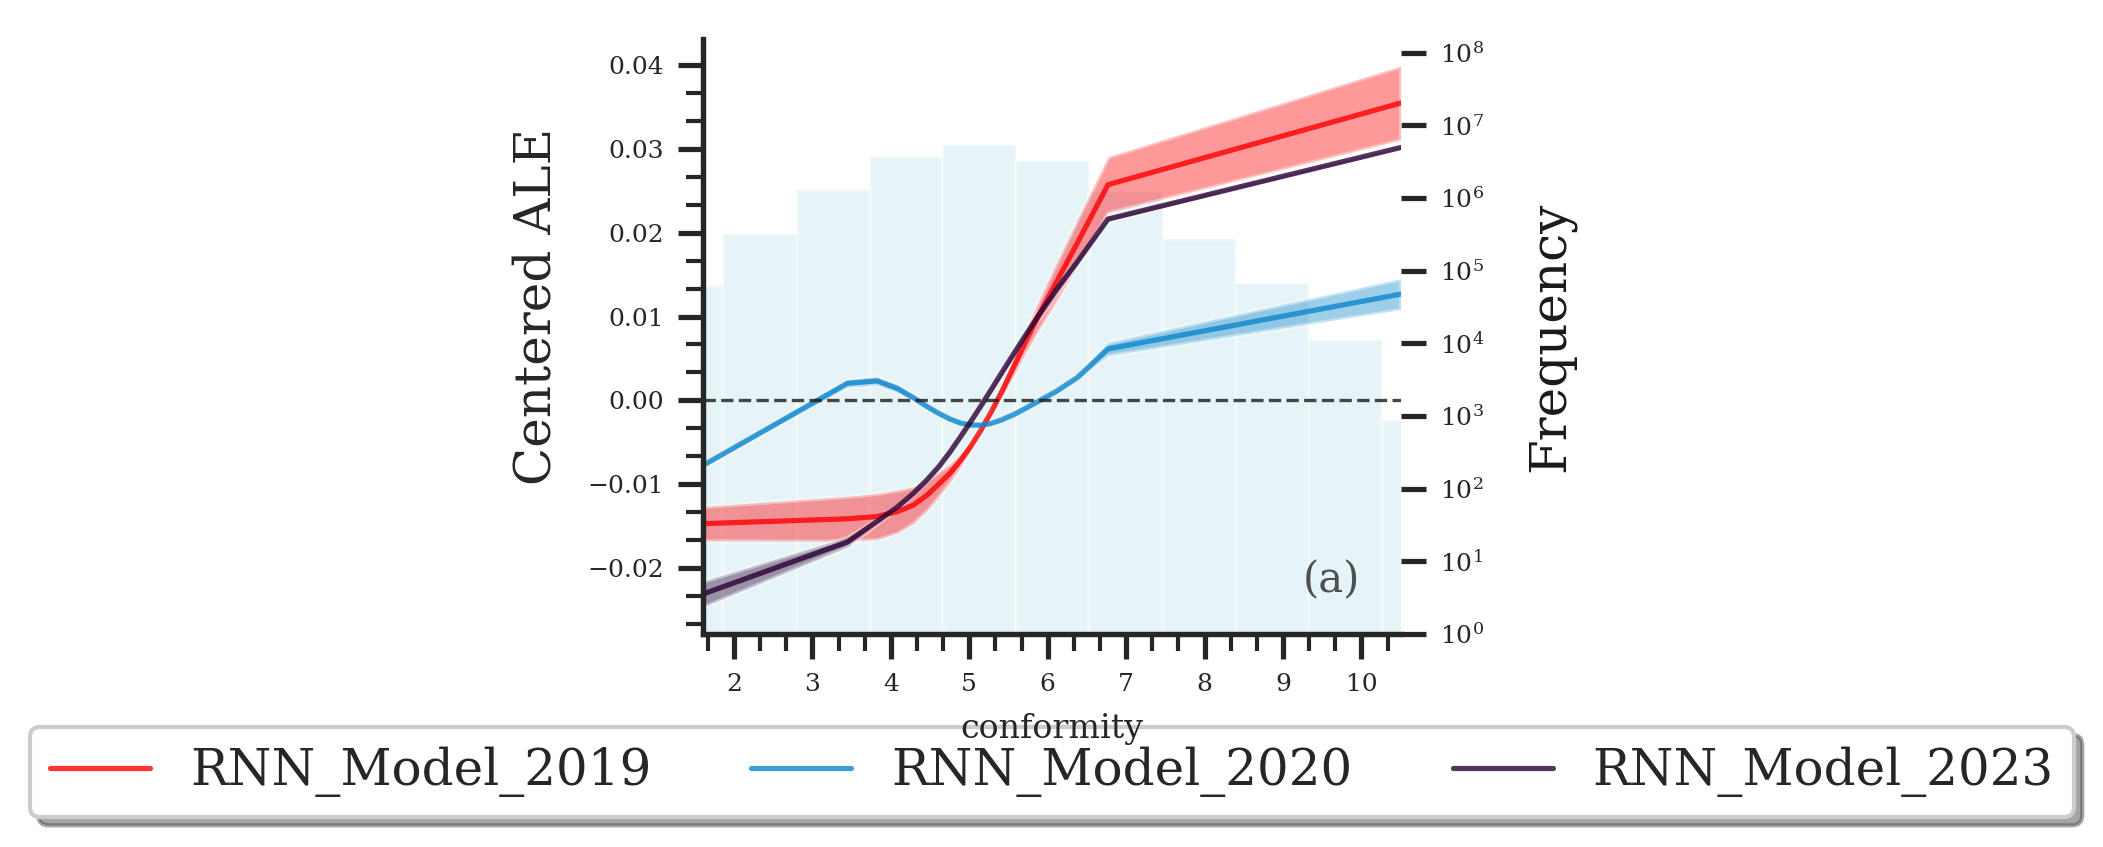

In [8]:
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

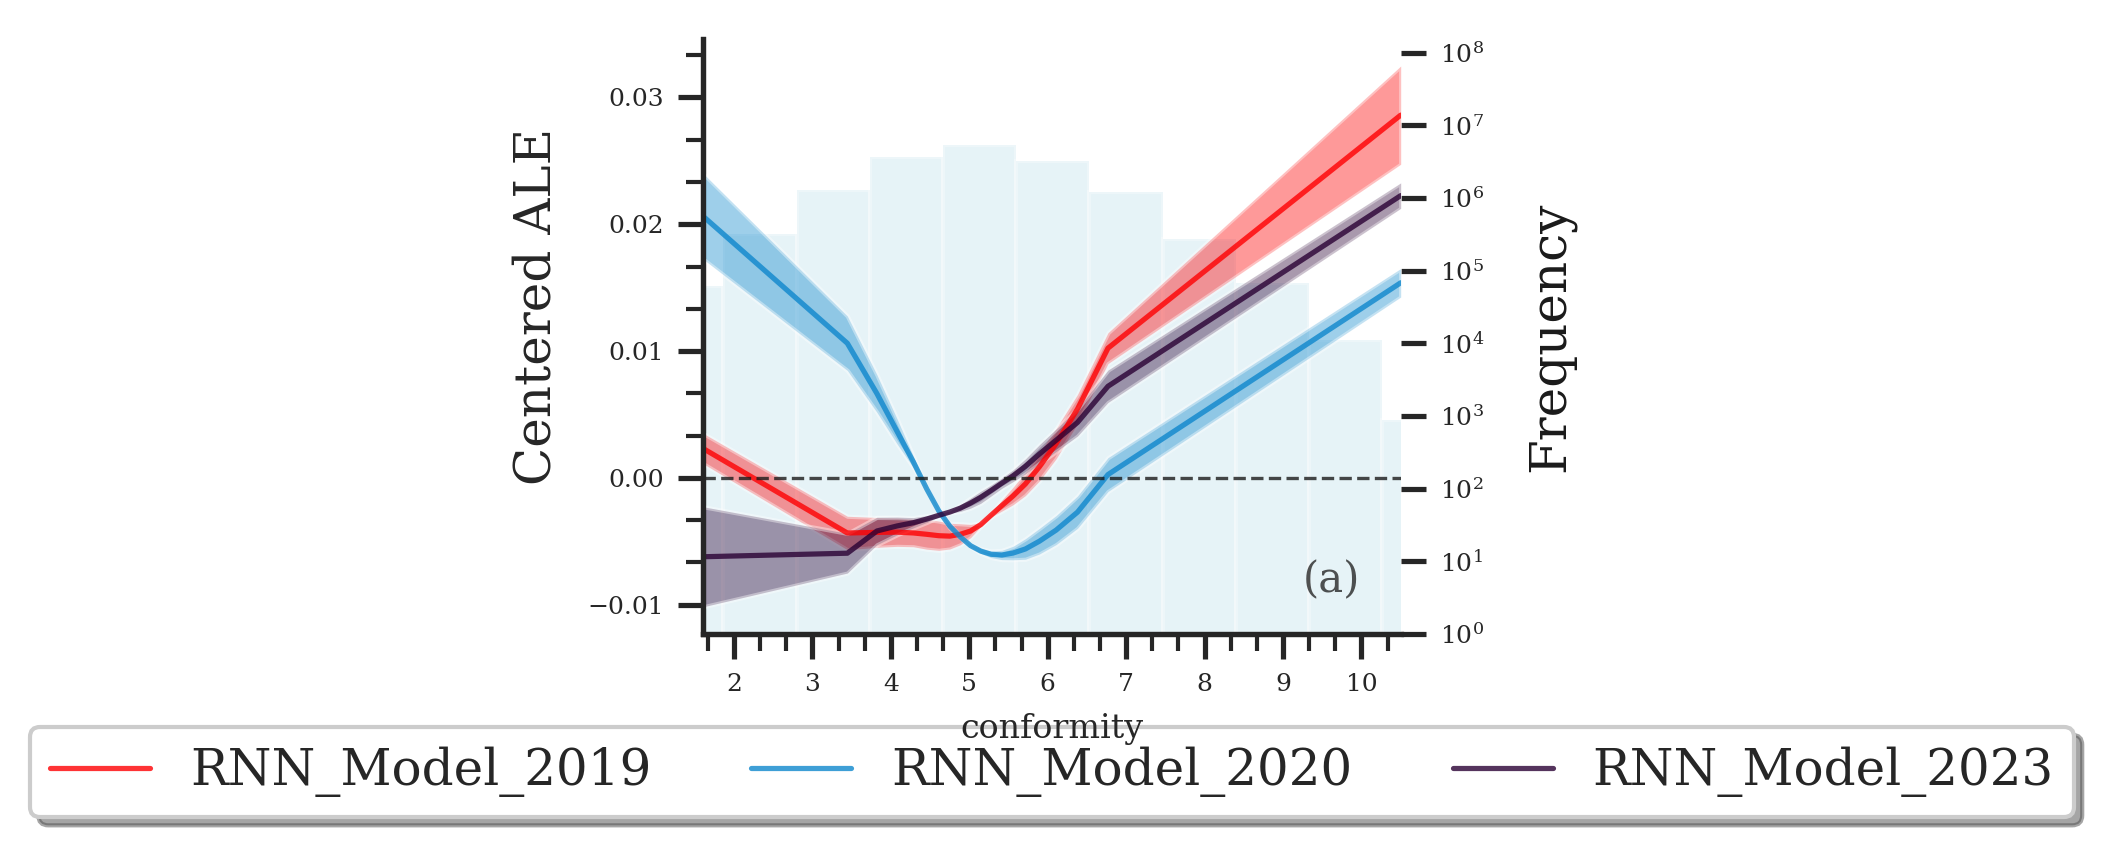

In [8]:
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

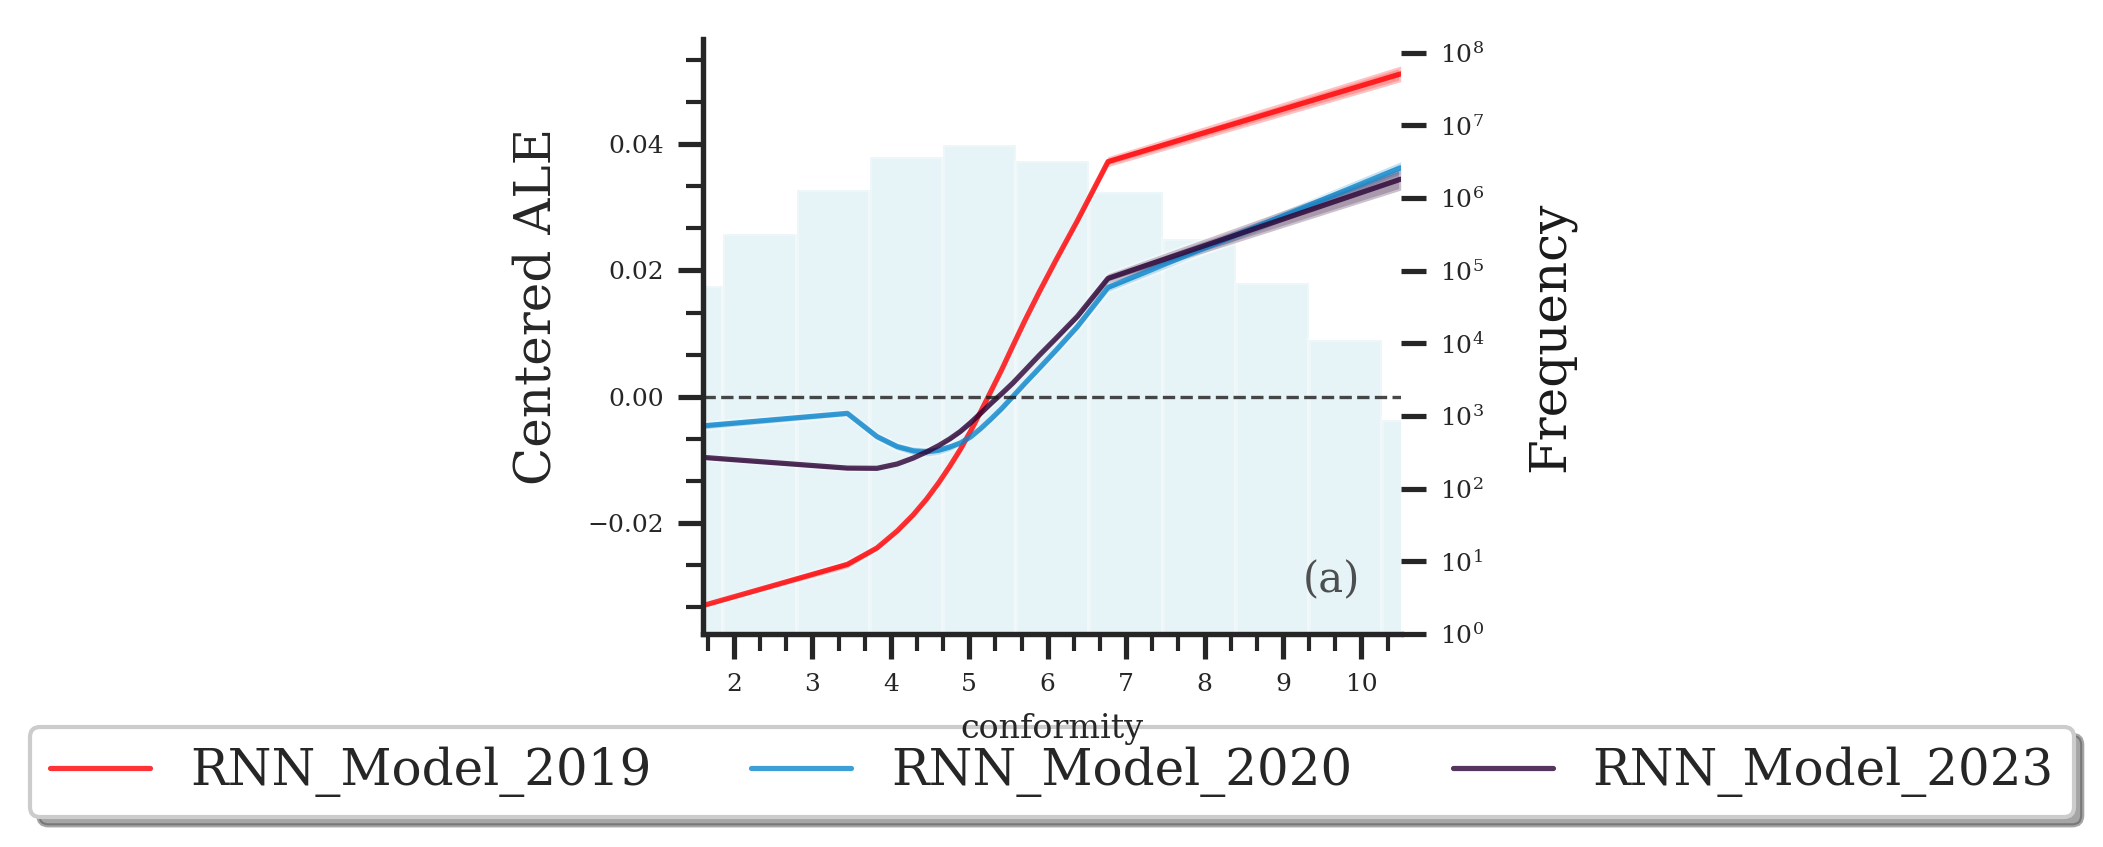

In [9]:
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

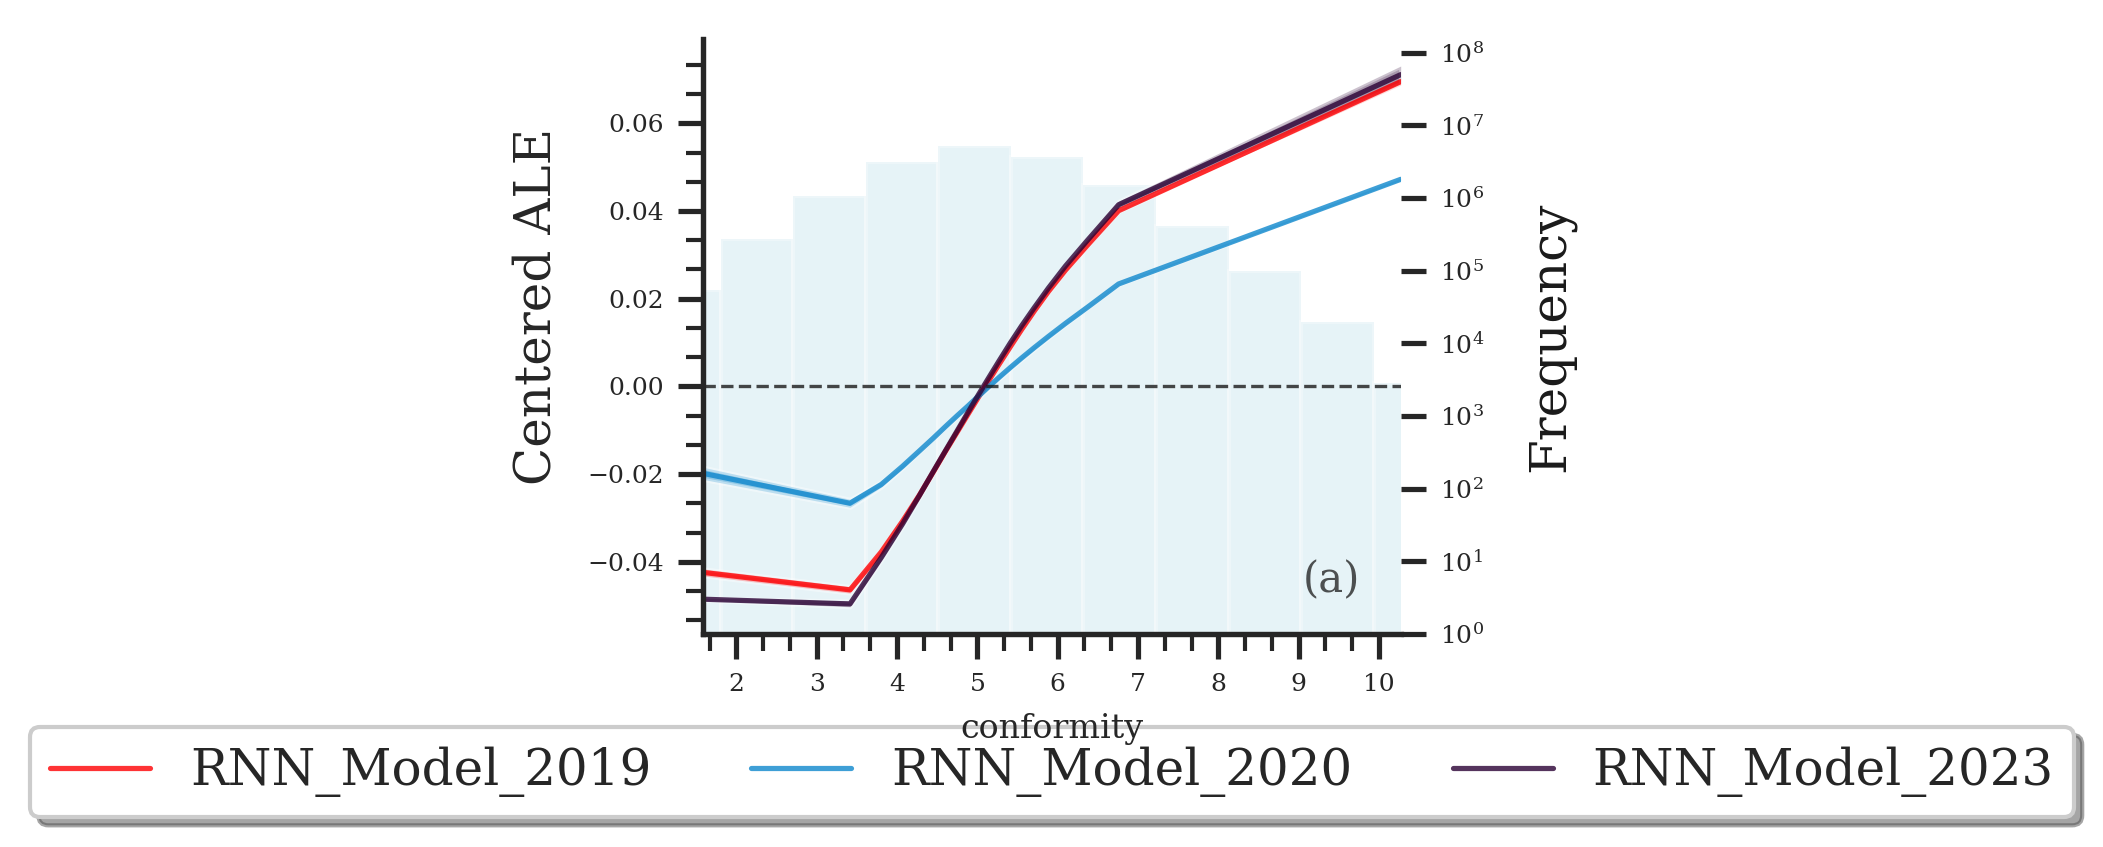

In [19]:
# sampling v5
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

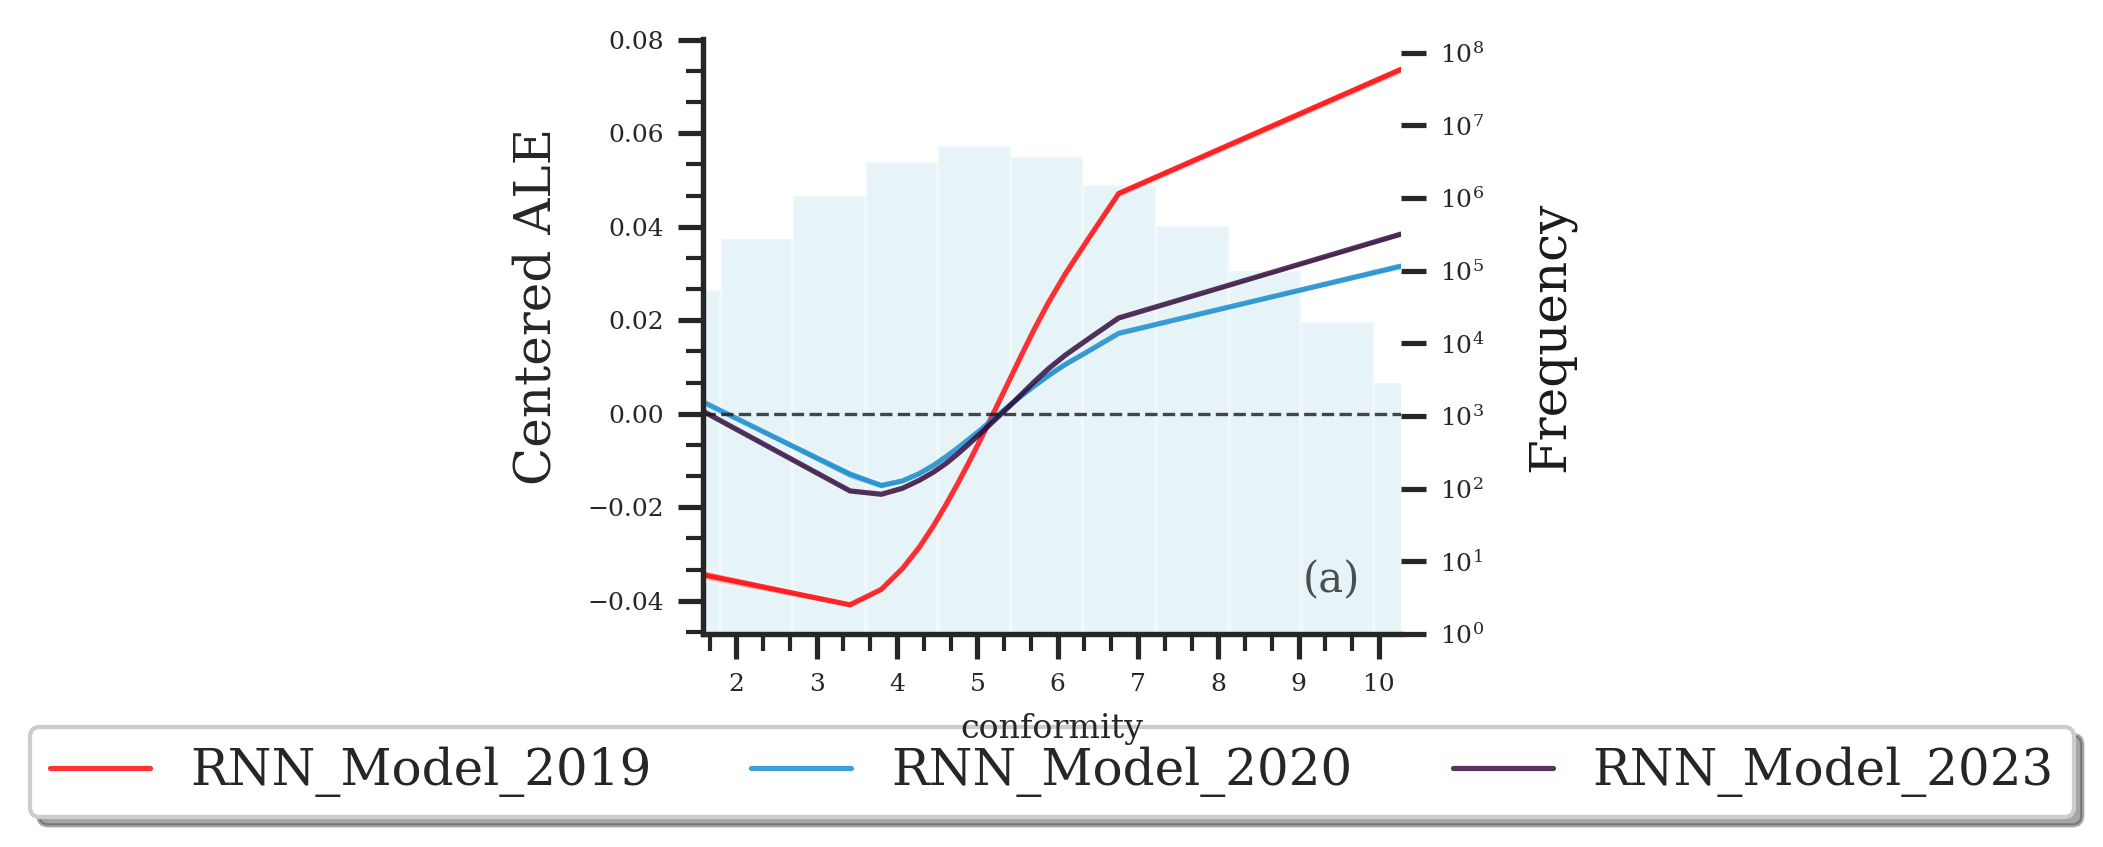

In [8]:
# sampling v6
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

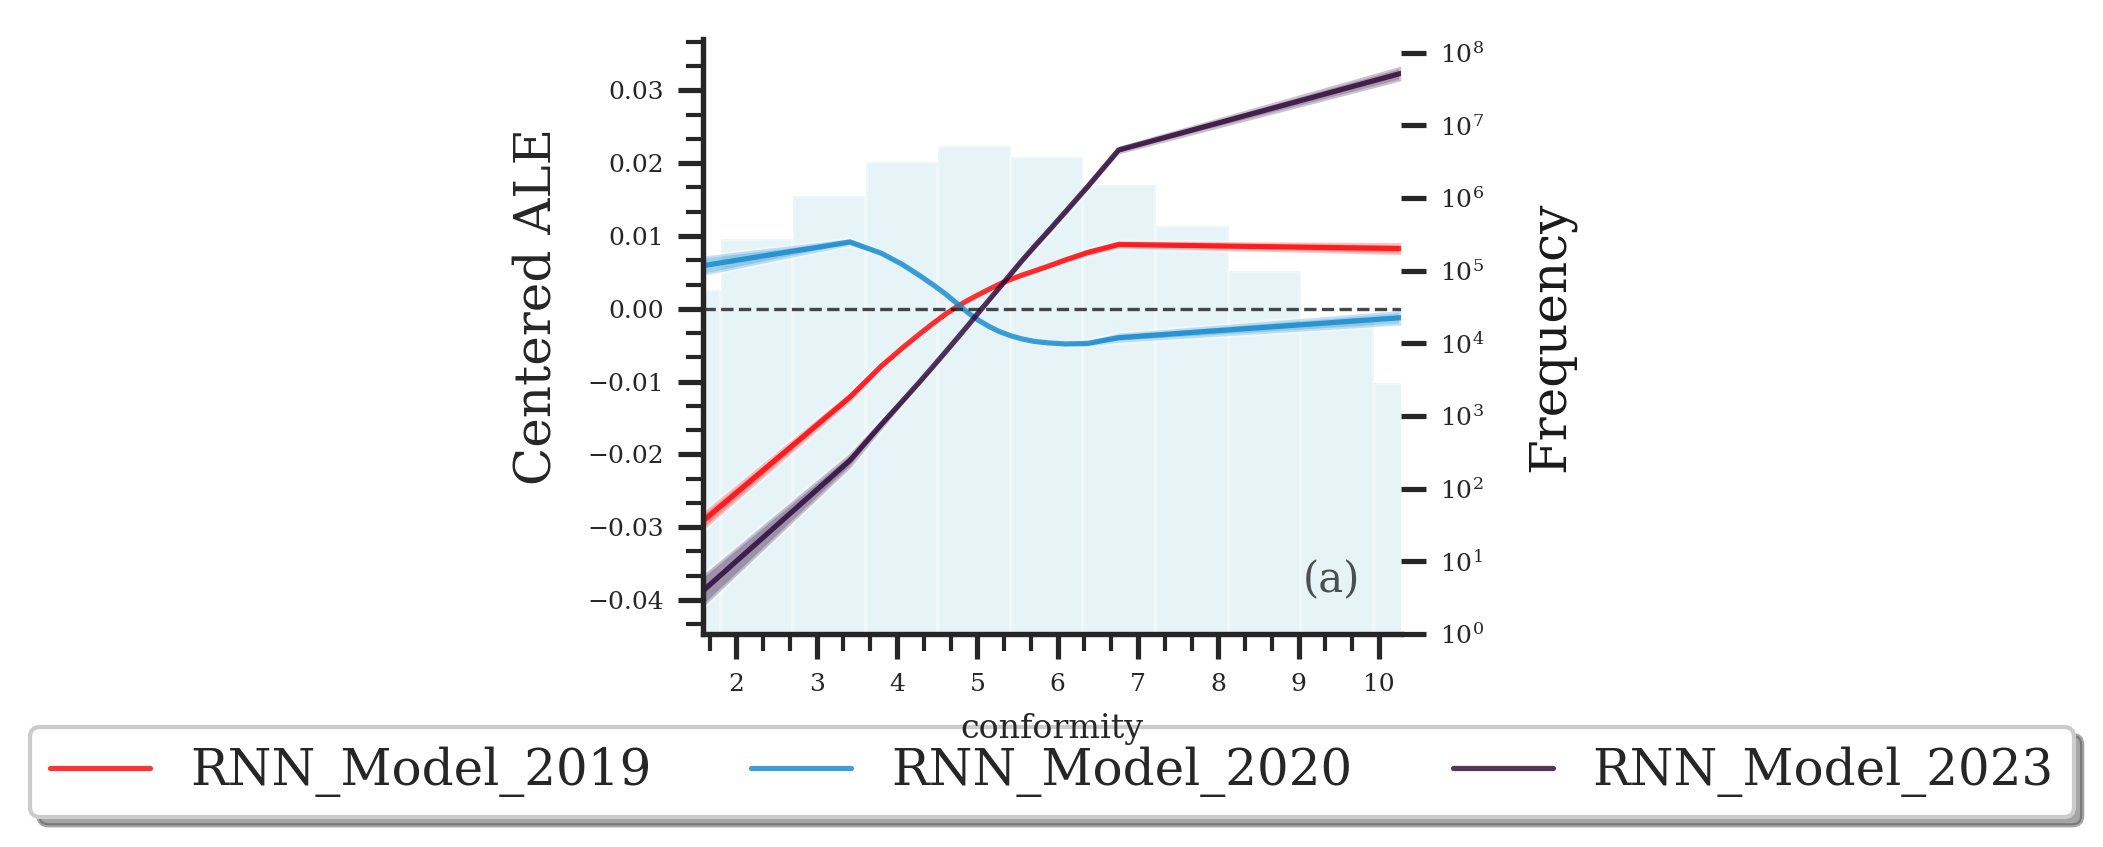

In [8]:
# sampling v7
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

### time+sci250

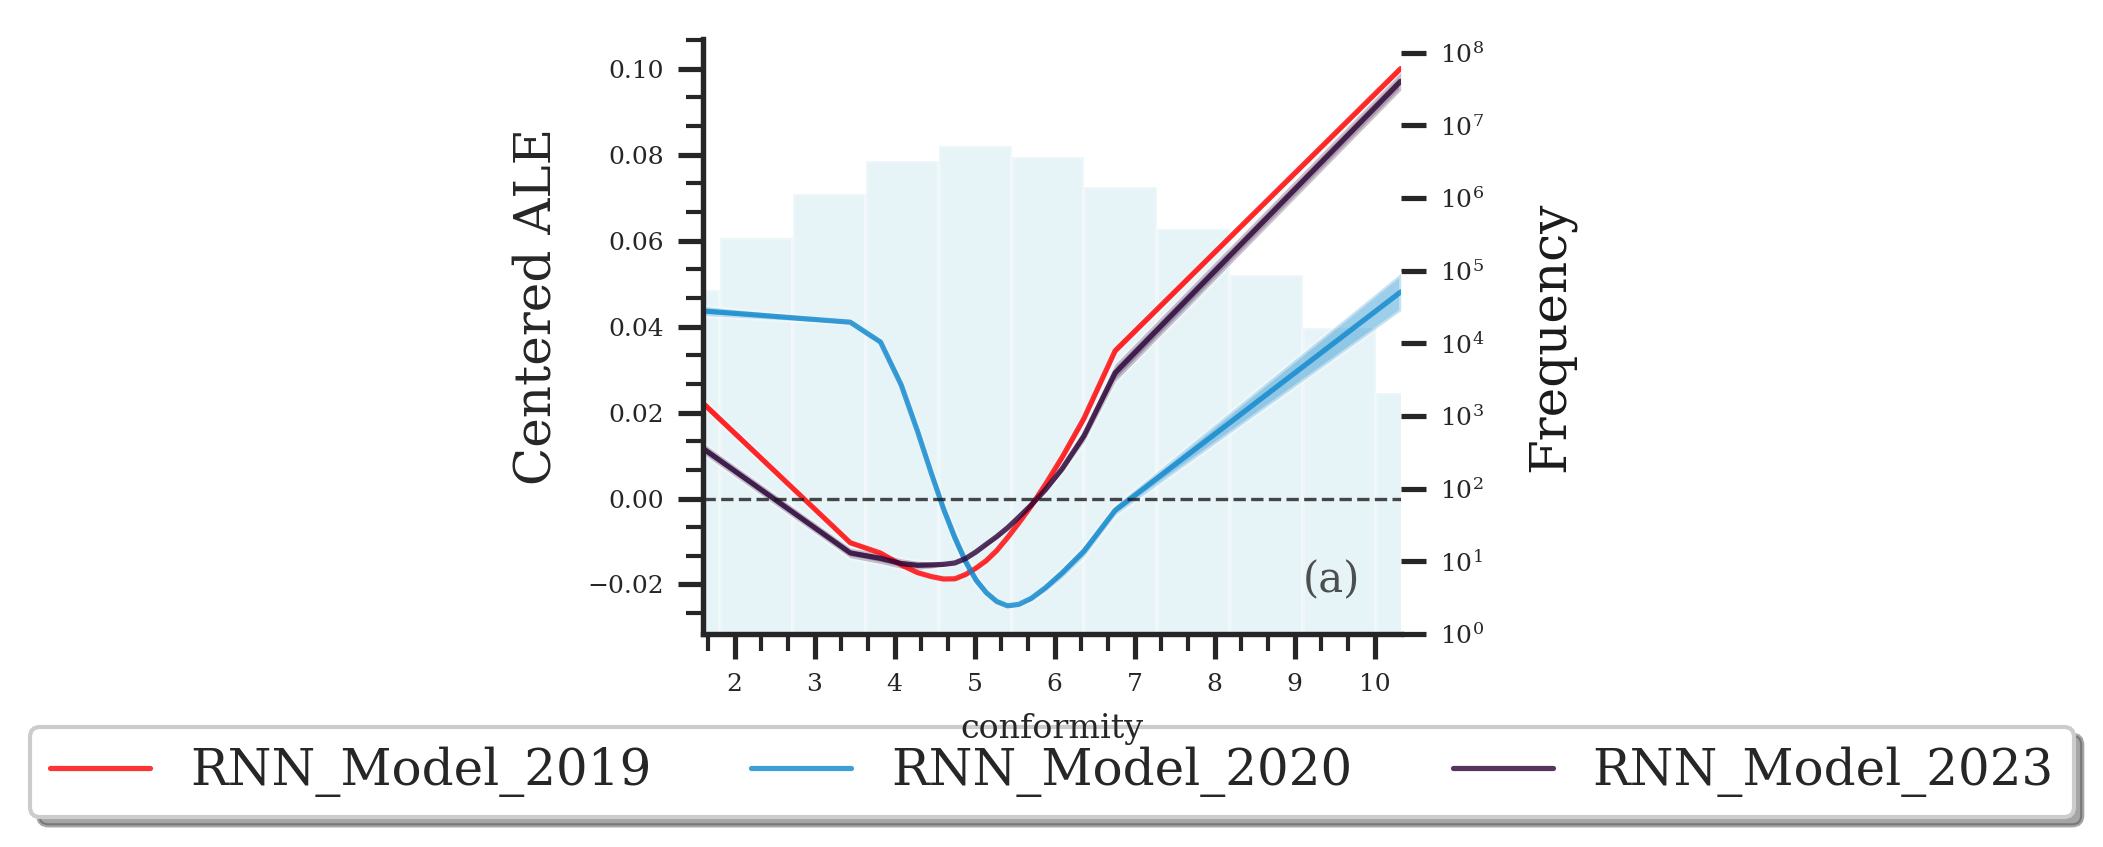

In [11]:
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

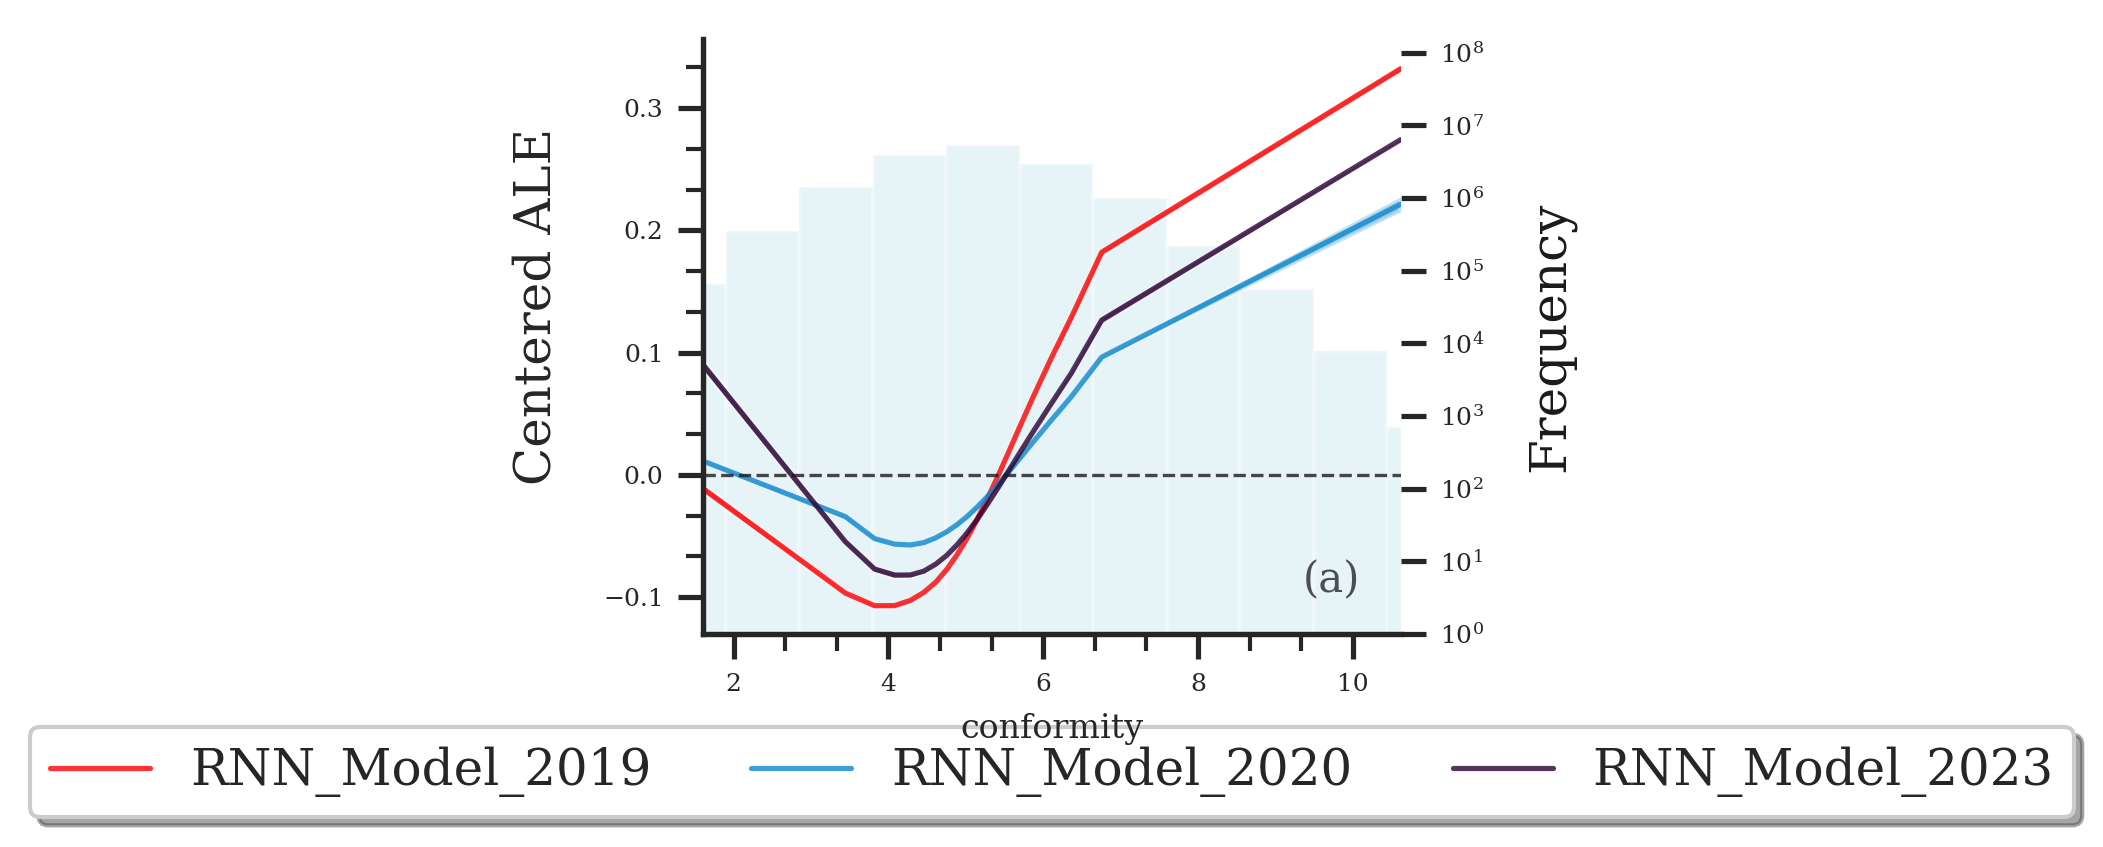

In [13]:
# sampling
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

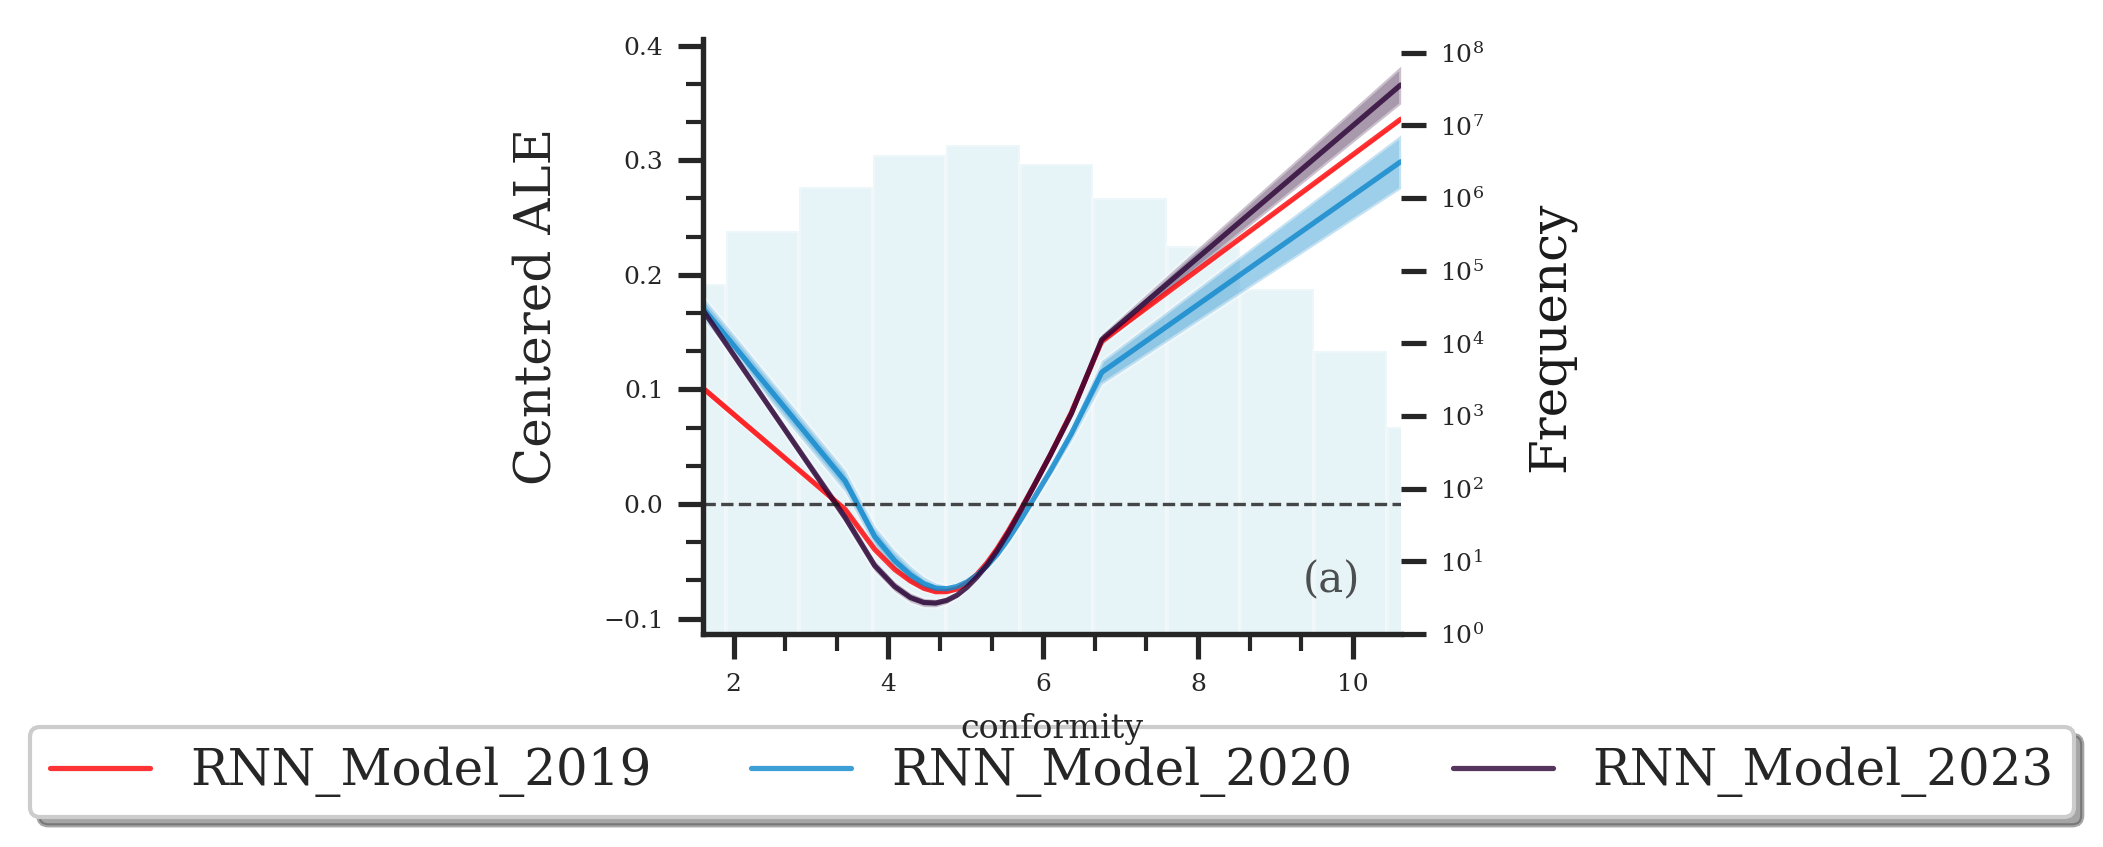

In [8]:
# v2
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

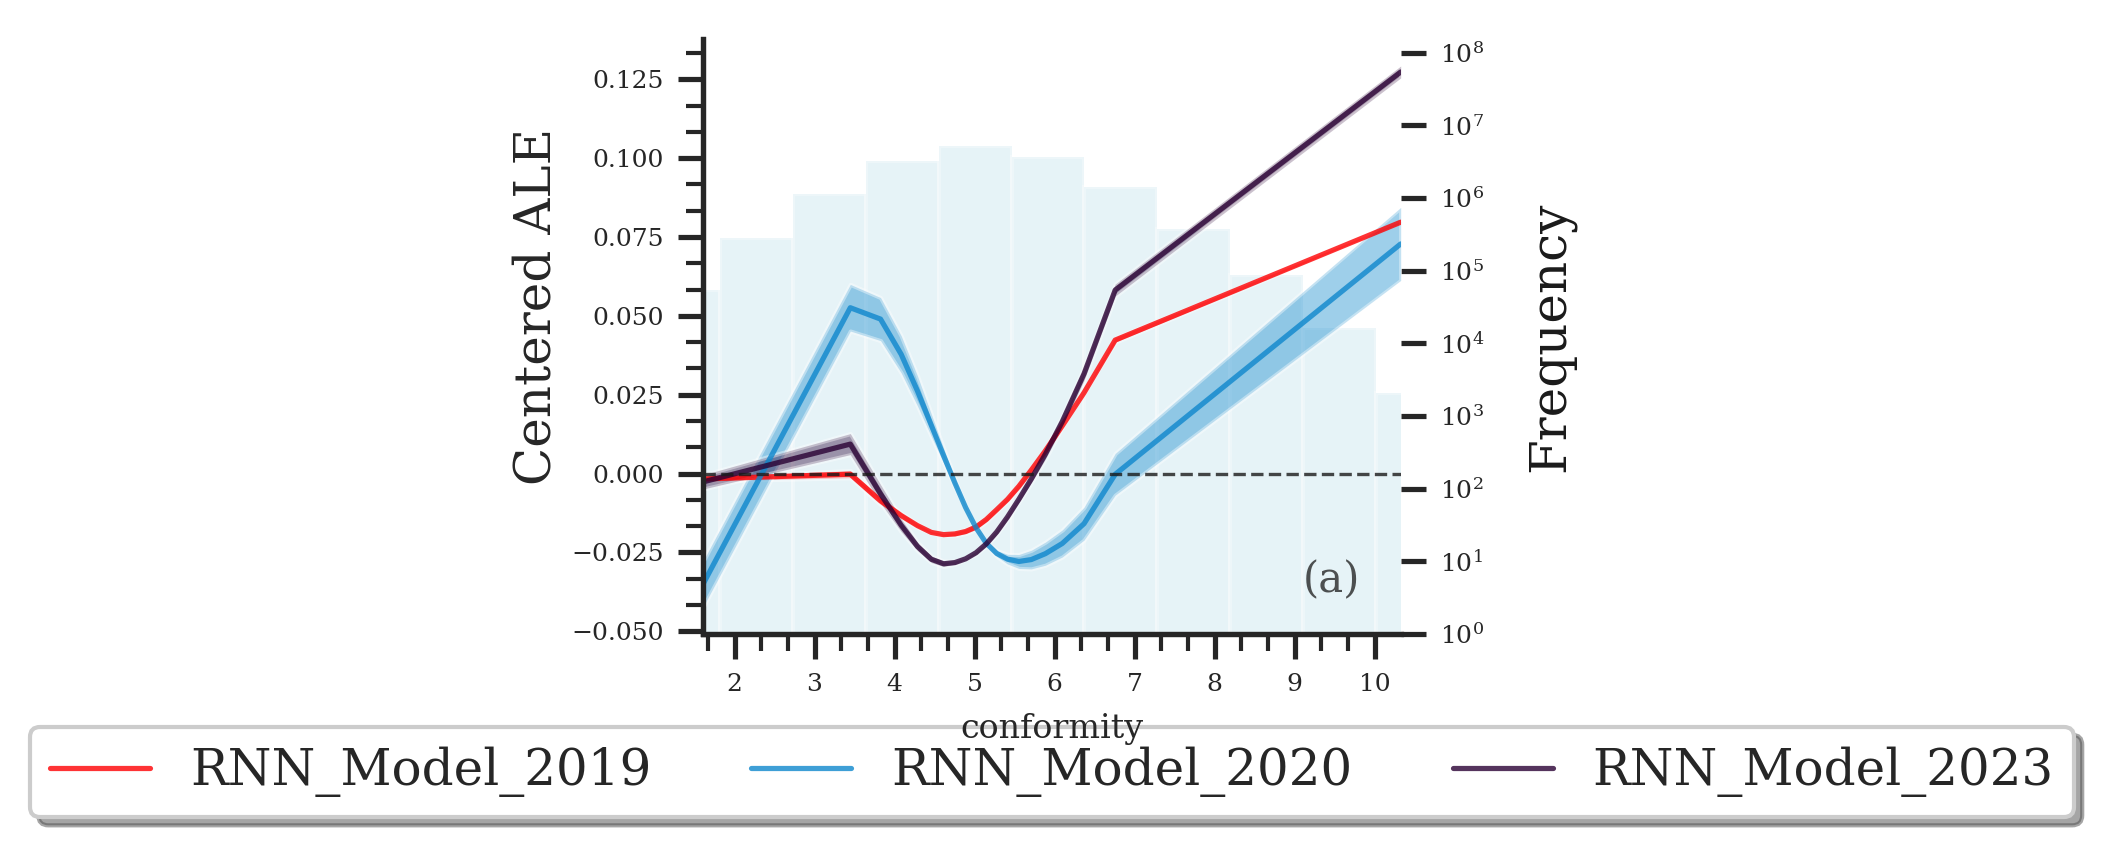

In [8]:
# v3
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

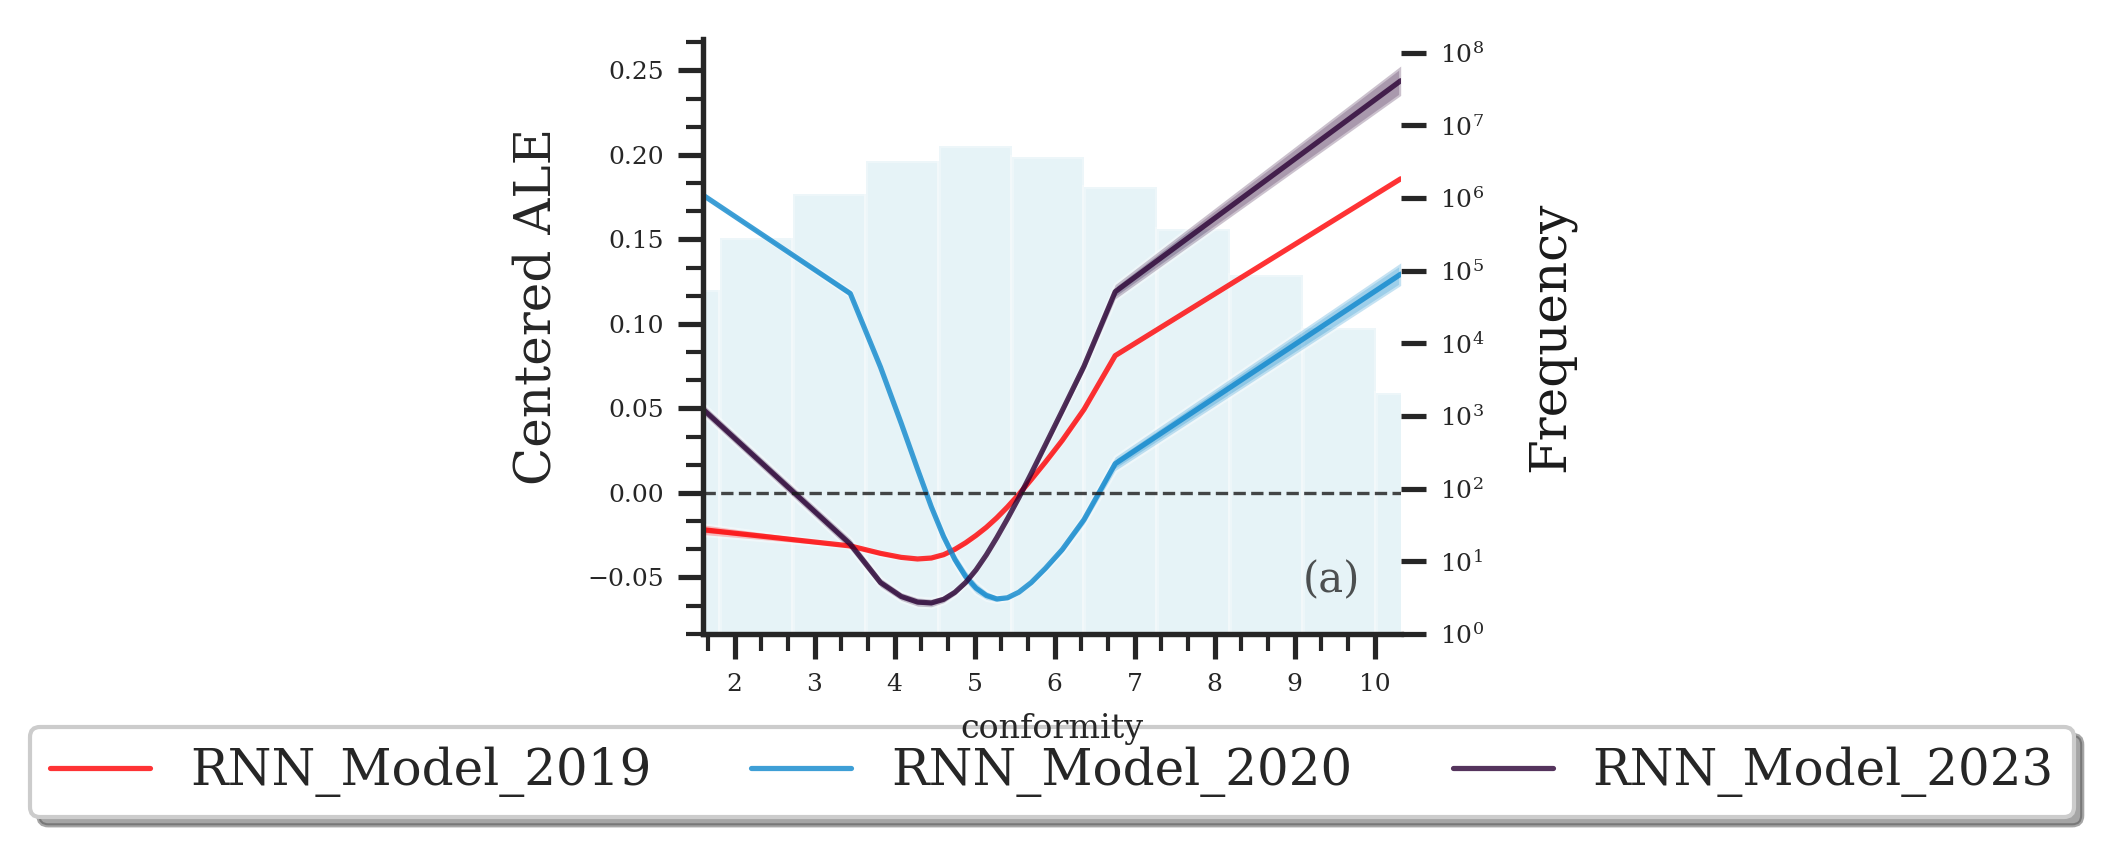

In [8]:
# v4
fig, ax = explainer.plot_ale(
                                   ale = ale_dataset,
                                   features='conformity',
                                   display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )